Make sure when implementing the code, the Netlogo model is ran first.
In similar vein, ensure filenames are correct to avoid errors.

In [ ]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import scipy.stats as stats
plt.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 20
pd.options.display.max_columns = 100
from pandas.core.computation.check import NUMEXPR_INSTALLED

In [2]:
df_csp_off = pd.read_csv('Model final experiment_csp_false-table.csv', skiprows = 6)
df_csp_on = pd.read_csv('Model final experiment_csp_true_intv1_false-table.csv', skiprows = 6)
df_csp_on2 = pd.read_csv('Model final experiment_csp_true_intv1_true-table.csv', skiprows = 6)

In [3]:
df_csp_off

[run number]  intv1  intv2  intv3 region  #-developers  #-households  \
0                   6  False   True   True  ConEd             0          2000   
1                   5  False   True   True  ConEd             0          2000   
2                   3  False   True   True  ConEd             0          2000   
3                   1  False   True   True  ConEd             0          2000   
4                   6  False   True   True  ConEd             0          2000   
...               ...    ...    ...    ...    ...           ...           ...   
1250395          2400  False  False  False  ConEd             0          2000   
1250396          2400  False  False  False  ConEd             0          2000   
1250397          2400  False  False  False  ConEd             0          2000   
1250398          2400  False  False  False  ConEd             0          2000   
1250399          2400  False  False  False  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True     False   
1                         150                   120            True     False   
2                         150                   120            True     False   
3                         150                   120            True     False   
4                         150                   120            True     False   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False     False   
1250396                   150                   120           False     False   
1250397                   150                   120           False     False   
1250398                   150                   120           False     False   
1250399                   150                   120           False     False   

         VDER-exp-rate  strat-intv1  [step]  \
0                  0.6         0.33       0   
1                  0.6         0.33       0   
2                  0.6         0.33       0   
3                  0.6         0.33       0   
4                  0.6         0.33       1   
...                ...          ...     ...   
1250395            0.9         1.00     516   
1250396            0.9         1.00     517   
1250397            0.9         1.00     518   
1250398            0.9         1.00     519   
1250399            0.9         1.00     520   

         sum [electricity-bill] of households  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000000   
3                                    0.000000   
4                               100864.169973   
...                                       ...   
1250395                          93240.413045   
1250396                          93240.413045   
1250397                          93240.413045   
1250398                          93240.413045   
1250399                          93240.413045   

         sum [project-costs-2] of households  sum [own-usage] of households  \
0                                        0.0                  450286.473094   
1                                        0.0                  447390.509836   
2                                        0.0                  448602.791535   
3                                        0.0                  448614.970836   
4                                        0.0                  450286.473094   
...                                      ...                            ...   
1250395                                  0.0                  432106.728568   
1250396                                  0.0                  432106.728568   
1250397                                  0.0                  432106.728568   
1250398                                  0.0                  432106.728568   
1250399                                 

In [4]:
df_csp_on

[run number]  intv1  intv2  intv3 region  #-developers  #-households  \
0                   2  False   True   True  ConEd             0          2000   
1                   6  False   True   True  ConEd             0          2000   
2                   1  False   True   True  ConEd             0          2000   
3                   5  False   True   True  ConEd             0          2000   
4                   2  False   True   True  ConEd             0          2000   
...               ...    ...    ...    ...    ...           ...           ...   
1250395          2400  False  False  False  ConEd             0          2000   
1250396          2400  False  False  False  ConEd             0          2000   
1250397          2400  False  False  False  ConEd             0          2000   
1250398          2400  False  False  False  ConEd             0          2000   
1250399          2400  False  False  False  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True      True   
1                         150                   120            True      True   
2                         150                   120            True      True   
3                         150                   120            True      True   
4                         150                   120            True      True   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False      True   
1250396                   150                   120           False      True   
1250397                   150                   120           False      True   
1250398                   150                   120           False      True   
1250399                   150                   120           False      True   

         VDER-exp-rate  strat-intv1  [step]  \
0                  0.6         0.33       0   
1                  0.6         0.33       0   
2                  0.6         0.33       0   
3                  0.6         0.33       0   
4                  0.6         0.33       1   
...                ...          ...     ...   
1250395            0.9         1.00     516   
1250396            0.9         1.00     517   
1250397            0.9         1.00     518   
1250398            0.9         1.00     519   
1250399            0.9         1.00     520   

         sum [electricity-bill] of households  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000000   
3                                    0.000000   
4                               100685.386532   
...                                       ...   
1250395                          92097.623261   
1250396                          92097.623261   
1250397                          92097.623261   
1250398                          92097.623261   
1250399                          92056.026366   

         sum [project-costs-2] of households  sum [own-usage] of households  \
0                                        0.0                  449488.332734   
1                                        0.0                  448097.568534   
2                                        0.0                  448892.378000   
3                                        0.0                  451031.663304   
4                                        0.0                  449488.332734   
...                                      ...                            ...   
1250395                                  0.0                  349335.984867   
1250396                                  0.0                  349335.984867   
1250397                                  0.0                  349335.984867   
1250398                                  0.0                  347478.980605   
1250399                                 

In [5]:
df_csp_on2

[run number]  intv1  intv2  intv3 region  #-developers  #-households  \
0                   1   True   True   True  ConEd             0          2000   
1                   2   True   True   True  ConEd             0          2000   
2                   4   True   True   True  ConEd             0          2000   
3                   3   True   True   True  ConEd             0          2000   
4                   2   True   True   True  ConEd             0          2000   
...               ...    ...    ...    ...    ...           ...           ...   
1250395          2400   True  False  False  ConEd             0          2000   
1250396          2400   True  False  False  ConEd             0          2000   
1250397          2400   True  False  False  ConEd             0          2000   
1250398          2400   True  False  False  ConEd             0          2000   
1250399          2400   True  False  False  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True      True   
1                         150                   120            True      True   
2                         150                   120            True      True   
3                         150                   120            True      True   
4                         150                   120            True      True   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False      True   
1250396                   150                   120           False      True   
1250397                   150                   120           False      True   
1250398                   150                   120           False      True   
1250399                   150                   120           False      True   

         VDER-exp-rate  strat-intv1  [step]  \
0                  0.6         0.33       0   
1                  0.6         0.33       0   
2                  0.6         0.33       0   
3                  0.6         0.33       0   
4                  0.6         0.33       1   
...                ...          ...     ...   
1250395            0.9         1.00     516   
1250396            0.9         1.00     517   
1250397            0.9         1.00     518   
1250398            0.9         1.00     519   
1250399            0.9         1.00     520   

         sum [electricity-bill] of households  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000000   
3                                    0.000000   
4                                99862.211182   
...                                       ...   
1250395                          93361.850505   
1250396                          93361.850505   
1250397                          93361.850505   
1250398                          93361.850505   
1250399                          93361.850505   

         sum [project-costs-2] of households  sum [own-usage] of households  \
0                                        0.0                  448826.279256   
1                                        0.0                  445813.442775   
2                                        0.0                  449479.303952   
3                                        0.0                  446873.732455   
4                                        0.0                  445813.442775   
...                                      ...                            ...   
1250395                                  0.0                  350371.955110   
1250396                                  0.0                  350371.955110   
1250397                                  0.0                  350371.955110   
1250398                                  0.0                  350371.955110   
1250399                                 

In [6]:
frames = [df_csp_off, df_csp_on, df_csp_on2]
df = pd.concat(frames)

In [7]:
#https://www.statology.org/pandas-data-cast-to-numpy-dtype-of-object-check-input-data-with-np-asarraydata/
df = pd.get_dummies(df, columns=['intv1'], drop_first=True)
df = pd.get_dummies(df, columns=['intv2'], drop_first=True)
df = pd.get_dummies(df, columns=['intv3'], drop_first=True)

In [8]:
df

[run number] region  #-developers  #-households  \
0                   6  ConEd             0          2000   
1                   5  ConEd             0          2000   
2                   3  ConEd             0          2000   
3                   1  ConEd             0          2000   
4                   6  ConEd             0          2000   
...               ...    ...           ...           ...   
1250395          2400  ConEd             0          2000   
1250396          2400  ConEd             0          2000   
1250397          2400  ConEd             0          2000   
1250398          2400  ConEd             0          2000   
1250399          2400  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True     False   
1                         150                   120            True     False   
2                         150                   120            True     False   
3                         150                   120            True     False   
4                         150                   120            True     False   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False      True   
1250396                   150                   120           False      True   
1250397                   150                   120           False      True   
1250398                   150                   120           False      True   
1250399                   150                   120           False      True   

         VDER-exp-rate  strat-intv1  [step]  \
0                  0.6         0.33       0   
1                  0.6         0.33       0   
2                  0.6         0.33       0   
3                  0.6         0.33       0   
4                  0.6         0.33       1   
...                ...          ...     ...   
1250395            0.9         1.00     516   
1250396            0.9         1.00     517   
1250397            0.9         1.00     518   
1250398            0.9         1.00     519   
1250399            0.9         1.00     520   

         sum [electricity-bill] of households  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000000   
3                                    0.000000   
4                               100864.169973   
...                                       ...   
1250395                          93361.850505   
1250396                          93361.850505   
1250397                          93361.850505   
1250398                          93361.850505   
1250399                          93361.850505   

         sum [project-costs-2] of households  sum [own-usage] of households  \
0                                        0.0                  450286.473094   
1                                        0.0                  447390.509836   
2                                        0.0                  448602.791535   
3                                        0.0                  448614.970836   
4                                        0.0                  450286.473094   
...                                      ...                            ...   
1250395                                  0.0                  350371.955110   
1250396                                  0.0                  350371.955110   
1250397                                  0.0                  350371.955110   
1250398                                  0.0                  350371.955110   
1250399                                  0.0                  350371.955110   

         sum [own-prod] of households  sum [prod-csp] of households  \
0                            0.000000                      0.000000   
1                            0.000000                      0.000000   

In [9]:
list(df.columns) 

['[run number]',
 'region',
 '#-developers',
 '#-households',
 'MW-block-init-kW-res',
 'MW-block-init-kW-com',
 'e-price-effect',
 'csp-true',
 'VDER-exp-rate',
 'strat-intv1',
 '[step]',
 'sum [electricity-bill] of households',
 'sum [project-costs-2] of households',
 'sum [own-usage] of households',
 'sum [own-prod] of households',
 'sum [prod-csp] of households',
 'sum [emissions] of households',
 'count households with [switched-pv = true]',
 'count households with [signed-to-csp = true]',
 'count households with [able-to-cs = true]',
 'count households with [NPV > 0] with [has-rooftop? = true]',
 'count households with [savings > project-costs] with [has-rooftop? = true]',
 'mean [age] of households',
 'mean [income] of households',
 'mean [education] of households',
 'mean [savings] of households',
 'count developers',
 'pot-profit',
 'intv1_True',
 'intv2_True',
 'intv3_True']

In [10]:
rename_list = ['[run number]', 'region', '#-developers', '#-households', 
               'MW-block-init-kW-res', 'MW-block-init-kW-com',
               'e-price-effect' , 'csp-true','VDER-effect','strategy-intv1', #'MW-mult'
                'tick', 'total-elec-bill', 'total-proj-cost', 'elect-usage', 
               'prod-hh','csp-prod', 'emissions-hh', '#-hh-rpv', '#-hh-csp' , 'able-to-cs' ,
              'pos-npv' , 'pos-savings', 'avg-age', 'avg-income' , 'avg-education', 'avg-savings','developers',
               'estimated profit developers','intv1_True', 'intv2_True', 'intv3_True'
              ]
len(rename_list)

31

In [11]:
df.columns  = rename_list

In [12]:
df[:-20]

[run number] region  #-developers  #-households  \
0                   6  ConEd             0          2000   
1                   5  ConEd             0          2000   
2                   3  ConEd             0          2000   
3                   1  ConEd             0          2000   
4                   6  ConEd             0          2000   
...               ...    ...           ...           ...   
1250375          2399  ConEd             0          2000   
1250376          2400  ConEd             0          2000   
1250377          2400  ConEd             0          2000   
1250378          2400  ConEd             0          2000   
1250379          2400  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True     False   
1                         150                   120            True     False   
2                         150                   120            True     False   
3                         150                   120            True     False   
4                         150                   120            True     False   
...                       ...                   ...             ...       ...   
1250375                   150                   120           False      True   
1250376                   150                   120           False      True   
1250377                   150                   120           False      True   
1250378                   150                   120           False      True   
1250379                   150                   120           False      True   

         VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0                0.6            0.33     0         0.000000              0.0   
1                0.6            0.33     0         0.000000              0.0   
2                0.6            0.33     0         0.000000              0.0   
3                0.6            0.33     0         0.000000              0.0   
4                0.6            0.33     1    100864.169973              0.0   
...              ...             ...   ...              ...              ...   
1250375          0.9            1.00   520     92115.393006              0.0   
1250376          0.9            1.00   497     93540.668219              0.0   
1250377          0.9            1.00   498     93540.668219              0.0   
1250378          0.9            1.00   499     93497.817436              0.0   
1250379          0.9            1.00   500     93497.817436              0.0   

           elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0        450286.473094      0.000000      0.000000  1.239963e+08         0   
1        447390.509836      0.000000      0.000000  1.231988e+08         0   
2        448602.791535      0.000000      0.000000  1.235326e+08         0   
3        448614.970836      0.000000      0.000000  1.235360e+08         0   
4        450286.473094      0.000000      0.000000  1.239963e+08         0   
...                ...           ...           ...           ...       ...   
1250375  347578.989517  14500.730769  86834.638126  1.004761e+08       185   
1250376  355138.773393  12488.307692  83268.670148  1.023042e+08       169   
1250377  353225.792013  12488.307692  85181.651529  1.018692e+08       169   
1250378  353225.792013  12488.307692  85181.651529  1.018692e+08       169   
1250379  353056.522782  12657.576923  85181.651529  1.018692e+08       170   

         #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0               0           0        0            0  0.032913   -0.033577   
1               0           0        0            0 -0.028123   -0.030581   
2               0           0        0            0  0.031183   -0.003792   
3               0           0        0            0 -0.022322   -0.040673   
4               0           0   

In [13]:
list(df.columns)

['[run number]',
 'region',
 '#-developers',
 '#-households',
 'MW-block-init-kW-res',
 'MW-block-init-kW-com',
 'e-price-effect',
 'csp-true',
 'VDER-effect',
 'strategy-intv1',
 'tick',
 'total-elec-bill',
 'total-proj-cost',
 'elect-usage',
 'prod-hh',
 'csp-prod',
 'emissions-hh',
 '#-hh-rpv',
 '#-hh-csp',
 'able-to-cs',
 'pos-npv',
 'pos-savings',
 'avg-age',
 'avg-income',
 'avg-education',
 'avg-savings',
 'developers',
 'estimated profit developers',
 'intv1_True',
 'intv2_True',
 'intv3_True']

In [14]:
df['csp-prod'].mean()

23521.421160990194

In [15]:
#Availability total
def fkpi1 (number):
    total_elec = number['elect-usage'].sum() + number['prod-hh'].sum() + number['csp-prod'].sum()
    total_re = number['prod-hh'].sum() + number['csp-prod'].sum()
    kpi1 = total_re / total_elec * 100  
    return kpi1

In [16]:
#Availability per step
def fkpi11 (df):
    total_elec = df['elect-usage'] + df['prod-hh'] + df['csp-prod']
    total_re = df['prod-hh'] + df['csp-prod']
    kpi1 = total_re / total_elec * 100 
    return kpi1

In [17]:
df['Availability'] = df.apply(fkpi11, axis=1)
df['Availability'].mean()
df

7.673082736757313

[run number] region  #-developers  #-households  \
0                   6  ConEd             0          2000   
1                   5  ConEd             0          2000   
2                   3  ConEd             0          2000   
3                   1  ConEd             0          2000   
4                   6  ConEd             0          2000   
...               ...    ...           ...           ...   
1250395          2400  ConEd             0          2000   
1250396          2400  ConEd             0          2000   
1250397          2400  ConEd             0          2000   
1250398          2400  ConEd             0          2000   
1250399          2400  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True     False   
1                         150                   120            True     False   
2                         150                   120            True     False   
3                         150                   120            True     False   
4                         150                   120            True     False   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False      True   
1250396                   150                   120           False      True   
1250397                   150                   120           False      True   
1250398                   150                   120           False      True   
1250399                   150                   120           False      True   

         VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0                0.6            0.33     0         0.000000              0.0   
1                0.6            0.33     0         0.000000              0.0   
2                0.6            0.33     0         0.000000              0.0   
3                0.6            0.33     0         0.000000              0.0   
4                0.6            0.33     1    100864.169973              0.0   
...              ...             ...   ...              ...              ...   
1250395          0.9            1.00   516     93361.850505              0.0   
1250396          0.9            1.00   517     93361.850505              0.0   
1250397          0.9            1.00   518     93361.850505              0.0   
1250398          0.9            1.00   519     93361.850505              0.0   
1250399          0.9            1.00   520     93361.850505              0.0   

           elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0        450286.473094      0.000000      0.000000  1.239963e+08         0   
1        447390.509836      0.000000      0.000000  1.231988e+08         0   
2        448602.791535      0.000000      0.000000  1.235326e+08         0   
3        448614.970836      0.000000      0.000000  1.235360e+08         0   
4        450286.473094      0.000000      0.000000  1.239963e+08         0   
...                ...           ...           ...           ...       ...   
1250395  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250396  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250397  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250398  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250399  350371.955110  12657.576923  87866.219201  1.012192e+08       170   

         #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0               0           0        0            0  0.032913   -0.033577   
1               0           0        0            0 -0.028123   -0.030581   
2               0           0        0            0  0.031183   -0.003792   
3               0           0        0            0 -0.022322   -0.040673   
4               0           0   

In [18]:
#Affordability total
def fkpi2 (number):
    total_inv = number['total-proj-cost'].sum()
    total_elec_bill = number['total-elec-bill'].sum()
    avg_cost = (total_inv + total_elec_bill) / 2000
    return avg_cost

In [19]:
#Affordability per step
def fkpi21 (df):
    total_inv = df['total-proj-cost']
    total_elec_bill = df['total-elec-bill']
    avg_cost = (total_inv + total_elec_bill) / 2000
    return avg_cost

In [20]:
df['Affordability'] = df.apply(fkpi21, axis=1)
df['Affordability'].mean()

48.467046256809674

In [21]:
#Accessibility total
def fkpi3 (number):
    total_elec = number['elect-usage'].sum() + number['prod-hh'].sum() + number['csp-prod'].sum()
    total_clas = number['elect-usage'].sum()
    total_rpv = number['prod-hh'].sum()
    total_csp = number['csp-prod'].sum()
    perc_clas = total_clas / total_elec
    perc_rpv = total_rpv / total_elec
    perc_csp = total_csp / total_elec
    if total_csp != 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_rpv * np.log(perc_rpv)) + (perc_csp * np.log(perc_csp)))
    if total_csp <= 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_rpv * np.log(perc_rpv)))
   
    return div          

In [22]:
#Accessibility per step
def fkpi31 (df):
    total_elec = df['elect-usage'] + df['prod-hh'] + df['csp-prod']
    total_clas = df['elect-usage']
    total_rpv = df['prod-hh']
    total_csp = df['csp-prod']
    perc_clas = total_clas / total_elec
    perc_rpv = total_rpv / total_elec
    perc_csp = total_csp / total_elec
    if total_csp != 0 and total_rpv != 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_rpv * np.log(perc_rpv)) + (perc_csp * np.log(perc_csp)))
    if total_csp <= 0 and total_rpv > 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_rpv * np.log(perc_rpv)))
    if total_rpv <= 0 and total_csp > 0:
        div = -1 * ((perc_clas * np.log(perc_clas)) + (perc_csp * np.log(perc_csp)))
    if total_rpv <= 0 and total_csp <= 0 :
        div = 0
    
    return div      

In [23]:
df['Accessibility'] = df.apply(fkpi31, axis=1)
df['Accessibility'].mean()
df

0.2783775033258343

[run number] region  #-developers  #-households  \
0                   6  ConEd             0          2000   
1                   5  ConEd             0          2000   
2                   3  ConEd             0          2000   
3                   1  ConEd             0          2000   
4                   6  ConEd             0          2000   
...               ...    ...           ...           ...   
1250395          2400  ConEd             0          2000   
1250396          2400  ConEd             0          2000   
1250397          2400  ConEd             0          2000   
1250398          2400  ConEd             0          2000   
1250399          2400  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True     False   
1                         150                   120            True     False   
2                         150                   120            True     False   
3                         150                   120            True     False   
4                         150                   120            True     False   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False      True   
1250396                   150                   120           False      True   
1250397                   150                   120           False      True   
1250398                   150                   120           False      True   
1250399                   150                   120           False      True   

         VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0                0.6            0.33     0         0.000000              0.0   
1                0.6            0.33     0         0.000000              0.0   
2                0.6            0.33     0         0.000000              0.0   
3                0.6            0.33     0         0.000000              0.0   
4                0.6            0.33     1    100864.169973              0.0   
...              ...             ...   ...              ...              ...   
1250395          0.9            1.00   516     93361.850505              0.0   
1250396          0.9            1.00   517     93361.850505              0.0   
1250397          0.9            1.00   518     93361.850505              0.0   
1250398          0.9            1.00   519     93361.850505              0.0   
1250399          0.9            1.00   520     93361.850505              0.0   

           elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0        450286.473094      0.000000      0.000000  1.239963e+08         0   
1        447390.509836      0.000000      0.000000  1.231988e+08         0   
2        448602.791535      0.000000      0.000000  1.235326e+08         0   
3        448614.970836      0.000000      0.000000  1.235360e+08         0   
4        450286.473094      0.000000      0.000000  1.239963e+08         0   
...                ...           ...           ...           ...       ...   
1250395  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250396  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250397  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250398  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250399  350371.955110  12657.576923  87866.219201  1.012192e+08       170   

         #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0               0           0        0            0  0.032913   -0.033577   
1               0           0        0            0 -0.028123   -0.030581   
2               0           0        0            0  0.031183   -0.003792   
3               0           0        0            0 -0.022322   -0.040673   
4               0           0   

In [24]:
df.sort_values(by = 'Accessibility')

[run number] region  #-developers  #-households  \
0                   6  ConEd             0          2000   
668494           1288  ConEd             0          2000   
111878            218  ConEd             0          2000   
111876            218  ConEd             0          2000   
1150446          2211  ConEd             0          2000   
...               ...    ...           ...           ...   
438061            839  ConEd             0          2000   
438041            839  ConEd             0          2000   
991236           1900  ConEd             0          2000   
991229           1900  ConEd             0          2000   
991241           1900  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True     False   
668494                    150                   120            True      True   
111878                    150                   120            True     False   
111876                    150                   120            True     False   
1150446                   150                   120           False     False   
...                       ...                   ...             ...       ...   
438061                    150                   120            True      True   
438041                    150                   120            True      True   
991236                    150                   120            True      True   
991229                    150                   120            True      True   
991241                    150                   120            True      True   

         VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0                0.6            0.33     0         0.000000              0.0   
668494           0.6            0.67     1    101331.996317              0.0   
111878           0.9            0.67     1    100747.449076              0.0   
111876           0.9            0.67     0         0.000000              0.0   
1150446          0.6            1.00     1    100470.104606              0.0   
...              ...             ...   ...              ...              ...   
438061           0.9            0.67   519     87894.980262              0.0   
438041           0.9            0.67   514     87894.980262              0.0   
991236           0.6            0.67   519     86277.746901              0.0   
991229           0.6            0.67   518     86324.012749              0.0   
991241           0.6            0.67   520     86277.746901              0.0   

           elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0        450286.473094      0.000000      0.000000  1.239963e+08         0   
668494   452374.983560      0.000000      0.000000  1.245714e+08         0   
111878   449765.397660      0.000000      0.000000  1.238528e+08         0   
111876   449765.397660      0.000000      0.000000  1.238528e+08         0   
1150446  448527.252704      0.000000      0.000000  1.235118e+08         0   
...                ...           ...           ...           ...       ...   
438061   330204.990196  25070.653846  91377.597358  9.634323e+07       307   
438041   330204.990196  25070.653846  91377.597358  9.634323e+07       307   
991236   333380.056945  27684.923077  88303.754535  9.717720e+07       342   
991229   333380.056945  27684.923077  88303.754535  9.717720e+07       342   
991241   333380.056945  27684.923077  88303.754535  9.717720e+07       342   

         #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0               0           0        0            0  0.032913   -0.033577   
668494          0           0        0          599 -0.000403    0.006685   
111878          0           0        0          588  0.004162    0.037233   
111876          0           0        0            0  0.004162    0.037233   
1150446         0           0   

In [25]:
#Acceptability total
def fkpi4 (number):
    total_em = number['emissions-hh'].sum() / 2000
    return total_em

In [26]:
#Acceptability per step
def fkpi41 (df):
    total_em = df['emissions-hh'] / 2000
    return total_em

In [27]:
df['Acceptability'] = df.apply(fkpi41, axis=1)
df['Acceptability'].mean()

57881.21579738518

In [28]:
#New affordability total
def fkpi5 (number):
    total_aff = number['#-hh-csp'].sum() + number['pos-savings'].sum()
    return total_aff

In [29]:
#New affordability per step
def fkpi51 (df):
    total_aff = df['#-hh-csp'] + df['pos-savings']
    return total_aff

In [30]:
df['Ability'] = df.apply(fkpi51, axis=1)
df['Ability'].mean()

479.12307314992535

In [31]:
#New acceptability total
def fkpi6 (number):
    total_acc = number['pos-npv'].sum() + number['#-hh-csp'].sum()
    return total_acc

In [32]:
#New acceptability per step
def fkpi61 (df):
    total_acc = df['pos-npv'] + df['#-hh-csp']
    return total_acc

In [33]:
df['Appeal'] = df.apply(fkpi61, axis=1)
df['Appeal'].mean()
df

488.8830686180422

[run number] region  #-developers  #-households  \
0                   6  ConEd             0          2000   
1                   5  ConEd             0          2000   
2                   3  ConEd             0          2000   
3                   1  ConEd             0          2000   
4                   6  ConEd             0          2000   
...               ...    ...           ...           ...   
1250395          2400  ConEd             0          2000   
1250396          2400  ConEd             0          2000   
1250397          2400  ConEd             0          2000   
1250398          2400  ConEd             0          2000   
1250399          2400  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                         150                   120            True     False   
1                         150                   120            True     False   
2                         150                   120            True     False   
3                         150                   120            True     False   
4                         150                   120            True     False   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False      True   
1250396                   150                   120           False      True   
1250397                   150                   120           False      True   
1250398                   150                   120           False      True   
1250399                   150                   120           False      True   

         VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0                0.6            0.33     0         0.000000              0.0   
1                0.6            0.33     0         0.000000              0.0   
2                0.6            0.33     0         0.000000              0.0   
3                0.6            0.33     0         0.000000              0.0   
4                0.6            0.33     1    100864.169973              0.0   
...              ...             ...   ...              ...              ...   
1250395          0.9            1.00   516     93361.850505              0.0   
1250396          0.9            1.00   517     93361.850505              0.0   
1250397          0.9            1.00   518     93361.850505              0.0   
1250398          0.9            1.00   519     93361.850505              0.0   
1250399          0.9            1.00   520     93361.850505              0.0   

           elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0        450286.473094      0.000000      0.000000  1.239963e+08         0   
1        447390.509836      0.000000      0.000000  1.231988e+08         0   
2        448602.791535      0.000000      0.000000  1.235326e+08         0   
3        448614.970836      0.000000      0.000000  1.235360e+08         0   
4        450286.473094      0.000000      0.000000  1.239963e+08         0   
...                ...           ...           ...           ...       ...   
1250395  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250396  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250397  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250398  350371.955110  12657.576923  87866.219201  1.012192e+08       170   
1250399  350371.955110  12657.576923  87866.219201  1.012192e+08       170   

         #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0               0           0        0            0  0.032913   -0.033577   
1               0           0        0            0 -0.028123   -0.030581   
2               0           0        0            0  0.031183   -0.003792   
3               0           0        0            0 -0.022322   -0.040673   
4               0           0   

In [34]:
#Create subsets for further analyses
# baseline with and without csp
ss1 = df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df ['e-price-effect'] == False)]
ss11 = df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 0)& (df ['e-price-effect'] == False)]

#scenario 1
ss2 =  df[(df['intv1_True'] == 1) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df ['e-price-effect'] == False)]
ss21 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 0) & (df ['e-price-effect'] == False)]
ss22 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 0.33) & (df ['e-price-effect'] == False)]
ss23 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 0.67) & (df ['e-price-effect'] == False)]
ss24 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 1) & (df ['e-price-effect'] == False)]
#scenario 2
ss3 =  df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df ['e-price-effect'] == False)]
ss31 =  df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 0) & (df ['e-price-effect'] == False)]
ss32 =  df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df['VDER-effect']== 0.6) & (df ['e-price-effect'] == False)]
ss33 =  df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 0) & (df ['csp-true'] == 1) & (df['VDER-effect']== 0.9) & (df ['e-price-effect'] == False)]
#scenario 3 
ss4 =  df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df ['e-price-effect'] == False)]
ss41 =  df[(df['intv1_True'] == 0 ) & (df ['intv2_True'] == 0)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 0) & (df ['e-price-effect'] == False)]
#combined scenario
ss5 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df ['e-price-effect'] == False)]
ss51 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 0) & (df ['e-price-effect'] == False)]
ss52 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 0.33) & (df['VDER-effect']== 0.6) & (df ['e-price-effect'] == False)]
ss53 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 0.33) & (df['VDER-effect']== 0.9) & (df ['e-price-effect'] == False)]
ss54 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 0.67) & (df['VDER-effect']== 0.6) & (df ['e-price-effect'] == False)]
ss55 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 0.67) & (df['VDER-effect']== 0.9) & (df ['e-price-effect'] == False)]
ss56 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 1) & (df['VDER-effect']== 0.6) & (df ['e-price-effect'] == False)]
ss57 =  df[(df['intv1_True'] == 1 ) & (df ['intv2_True'] == 1)  & (df ['intv3_True'] == 1) & (df ['csp-true'] == 1) & (df['strategy-intv1']== 1) & (df['VDER-effect']== 0.9) & (df ['e-price-effect'] == False)]

data_list1 = [ss2, ss3, ss4, ss5]
data_list2 = [ss21, ss31, ss41, ss51]



In [35]:
ss53

[run number] region  #-developers  #-households  MW-block-init-kW-res  \
233068           451  ConEd             0          2000                   150   
233070           451  ConEd             0          2000                   150   
233075           451  ConEd             0          2000                   150   
233078           451  ConEd             0          2000                   150   
233083           451  ConEd             0          2000                   150   
...              ...    ...           ...           ...                   ...   
261840           500  ConEd             0          2000                   150   
261843           500  ConEd             0          2000                   150   
261847           500  ConEd             0          2000                   150   
261852           500  ConEd             0          2000                   150   
261858           500  ConEd             0          2000                   150   

        MW-block-init-kW-com  e-price-effect  csp-true  VDER-effect  \
233068                   120           False      True          0.9   
233070                   120           False      True          0.9   
233075                   120           False      True          0.9   
233078                   120           False      True          0.9   
233083                   120           False      True          0.9   
...                      ...             ...       ...          ...   
261840                   120           False      True          0.9   
261843                   120           False      True          0.9   
261847                   120           False      True          0.9   
261852                   120           False      True          0.9   
261858                   120           False      True          0.9   

        strategy-intv1  tick  total-elec-bill  total-proj-cost    elect-usage  \
233068            0.33     0         0.000000         0.000000  447033.165605   
233070            0.33     1    100135.429096         0.000000  447033.165605   
233075            0.33     2    100135.429096         0.000000  446732.242528   
233078            0.33     3    100016.109219     13299.564140  446675.819451   
233083            0.33     4     99993.736742      4231.639945  446600.588682   
...                ...   ...              ...              ...            ...   
261840            0.33   516     93748.495642         0.000000  398001.952479   
261843            0.33   517     93748.495642         0.000000  398001.952479   
261847            0.33   518     93748.495642         0.000000  398001.952479   
261852            0.33   519     93748.495642         0.000000  398001.952479   
261858            0.33   520     93748.495642         0.000000  398001.952479   

             prod-hh      csp-prod  emissions-hh  #-hh-rpv  #-hh-csp  \
233068      0.000000      0.000000  1.231004e+08         0         0   
233070      0.000000      0.000000  1.231004e+08         0         0   
233075    300.923077      0.000000  1.231004e+08         6         0   
233078    357.346154      0.000000  1.230299e+08         8         0   
233083    432.576923      0.000000  1.230167e+08        10         0   
...              ...           ...           ...       ...       ...   
261840  15215.423077  35818.029737  1.119417e+08       183       163   
261843  15215.423077  35818.029737  1.119417e+08       183       163   
261847  15215.423077  35818.029737  1.119417e+08       183       163   
261852  15215.423077  35818.029737  1.119417e+08       183       163   
261858  15215.423077  35818.029737  1.119417e+08       183       163   

        able-to-cs  pos-npv  pos-savings   avg-age  avg-income  avg-education  \
233068           0        0            0  0.003155   -0.010001      -0.014058   
233070           0        0          608  0.003155   -0.010001      -0.014058   
233075           0       14          599  0.003155   -0.010001      -0.014058   
233078           0  

In [36]:
kpis_names = ['fkpi1' , 'fkpi2' , 'fkpi3' , 'fkpi4' , 'fkpi5' , 'fkpi6']
names = ['ss2', 'ss3', 'ss4','ss5']
df2 = pd.DataFrame(columns = names)

In [37]:
lst1 = []
for i in data_list1:
    kpi1_res = ((fkpi1(i) - fkpi1(ss1)) / fkpi1(ss1) ) * 100
    lst1.append(kpi1_res)
df2.loc[len(df2)] = lst1

In [38]:
lst2 = []
for i in data_list1:
    kpi2_res = ((fkpi2(i) - fkpi2(ss1)) / fkpi2(ss1) ) * 100
    lst2.append(kpi2_res)
df2.loc[len(df2)] = lst2

In [39]:
lst3 = []
for i in data_list1:
    kpi3_res = ((fkpi3(i) - fkpi3(ss1)) / fkpi3(ss1) ) * 100
    lst3.append(kpi3_res)
df2.loc[len(df2)] = lst3

In [40]:
lst4 = []
for i in data_list1:
    kpi4_res = ((fkpi4(i) - fkpi4(ss1)) / fkpi4(ss1) ) * 100
    lst4.append(kpi4_res)
df2.loc[len(df2)] = lst4

In [41]:
lst5 = []
for i in data_list1:
    kpi5_res = ((fkpi5(i) - fkpi5(ss1)) / fkpi5(ss1) ) * 100
    lst5.append(kpi5_res)
df2.loc[len(df2)] = lst5

In [42]:
lst6 = []
for i in data_list1:
    kpi6_res = ((fkpi6(i) - fkpi6(ss1)) / fkpi6(ss1) ) * 100
    lst6.append(kpi6_res)
df2.loc[len(df2)] = lst6
df2.rename(index ={0: 'availability', 1: 'affordability1' , 2: 'accesability', 3: 'acceptability1' 
                   ,4: 'affordability2' , 5: 'acceptability2'} , inplace=True)
df2

ss2       ss3       ss4       ss5
availability   -5.758666  3.549732  3.081817 -5.668835
affordability1  0.047860  0.377194  0.066215  0.574976
accesability   -3.717877  2.266478  1.950958 -3.811086
acceptability1  0.515277 -0.286301 -0.295148  0.545756
affordability2 -2.047758  1.601144  1.080893 -1.288233
acceptability2 -2.686302  0.097353  0.774462 -5.137488

In [43]:
names2 = ['ss21', 'ss31', 'ss41','ss51']
df3 = pd.DataFrame(columns = names2)
lst11 = []
for i in data_list2:
    kpi1_res = ((fkpi1(i) - fkpi1(ss11)) / fkpi1(ss11) ) * 100
    lst11.append(kpi1_res)
df3.loc[len(df3)] = lst11

/var/folders/ql/w63wxz_17xnd0ryv6kshxn380000gn/T/ipykernel_6527/3967565451.py:5: RuntimeWarning: invalid value encountered in double_scalars
  kpi1 = total_re / total_elec * 100


In [44]:
lst21 = []
for i in data_list2:
    kpi2_res = ((fkpi2(i) - fkpi2(ss11)) / fkpi2(ss11) ) * 100
    lst21.append(kpi2_res)
df3.loc[len(df3)] = lst21


In [45]:
lst31 = []
for i in data_list2:
    kpi3_res = ((fkpi3(i) - fkpi3(ss11)) / fkpi1(ss11) ) * 100
    lst31.append(kpi3_res)
df3.loc[len(df3)] = lst31

/var/folders/ql/w63wxz_17xnd0ryv6kshxn380000gn/T/ipykernel_6527/1144916173.py:7: RuntimeWarning: invalid value encountered in double_scalars
  perc_clas = total_clas / total_elec
/var/folders/ql/w63wxz_17xnd0ryv6kshxn380000gn/T/ipykernel_6527/1144916173.py:8: RuntimeWarning: invalid value encountered in double_scalars
  perc_rpv = total_rpv / total_elec
/var/folders/ql/w63wxz_17xnd0ryv6kshxn380000gn/T/ipykernel_6527/1144916173.py:9: RuntimeWarning: invalid value encountered in double_scalars
  perc_csp = total_csp / total_elec


In [46]:
lst41 = []
for i in data_list2:
    kpi4_res = ((fkpi4(i) - fkpi4(ss11)) / fkpi4(ss11) ) * 100
    lst41.append(kpi4_res)
df3.loc[len(df3)] = lst41

In [47]:
lst51 = []
for i in data_list2:
    kpi5_res = ((fkpi5(i) - fkpi5(ss11)) / fkpi5(ss11) ) * 100
    lst51.append(kpi5_res)
df3.loc[len(df3)] = lst51

In [48]:
lst61 = []
for i in data_list2:
    kpi6_res = ((fkpi6(i) - fkpi6(ss11)) / fkpi6(ss11) ) * 100
    lst61.append(kpi6_res)
df3.loc[len(df3)] = lst61
df3.rename(index ={0: 'availability', 1: 'affordability1' , 2: 'accesability', 3: 'acceptability1' 
                   ,4: 'affordability2' , 5: 'acceptability2'} , inplace=True)
df3

ss21      ss31      ss41   ss51
availability      NaN -0.439874 -0.435943    NaN
affordability1 -100.0  0.448272  0.082621 -100.0
accesability      NaN -0.017114 -0.016961    NaN
acceptability1 -100.0  0.032696 -0.040827 -100.0
affordability2 -100.0  0.386783  0.320753 -100.0
acceptability2 -100.0 -1.635731 -0.759450 -100.0

In [49]:
df4 = pd.DataFrame(columns = kpis_names)
kpis = [fkpi1, fkpi2, fkpi3 , fkpi4 , fkpi5, fkpi6]
sd = []
for i in kpis:
    x = ((i(ss5) - i(ss11)) / i(ss11)) * 100
    sd.append(x)
df4.loc[len(df4)] = sd
df4

fkpi1     fkpi2       fkpi3     fkpi4      fkpi5      fkpi6
0  362.19665 -0.146049  261.207322 -6.082098  35.484832  45.889596

In [50]:
avg_cost = ss11['total-proj-cost'].sum()
pp_signed = ss11['#-hh-rpv'].sum()
print (pp_signed)
print (avg_cost)

20279613
213916944.965512


In [51]:
avg_cost2 = ss5['total-proj-cost'].sum()
pp_signed2 = ss5['#-hh-rpv'].sum()
print (pp_signed2)
print (avg_cost2)


18961035
186656812.31263515


In [52]:
ss1_1 = ss1[(ss1['tick'] == 520)]

<AxesSubplot:xlabel='#-hh-rpv', ylabel='total-elec-bill'>

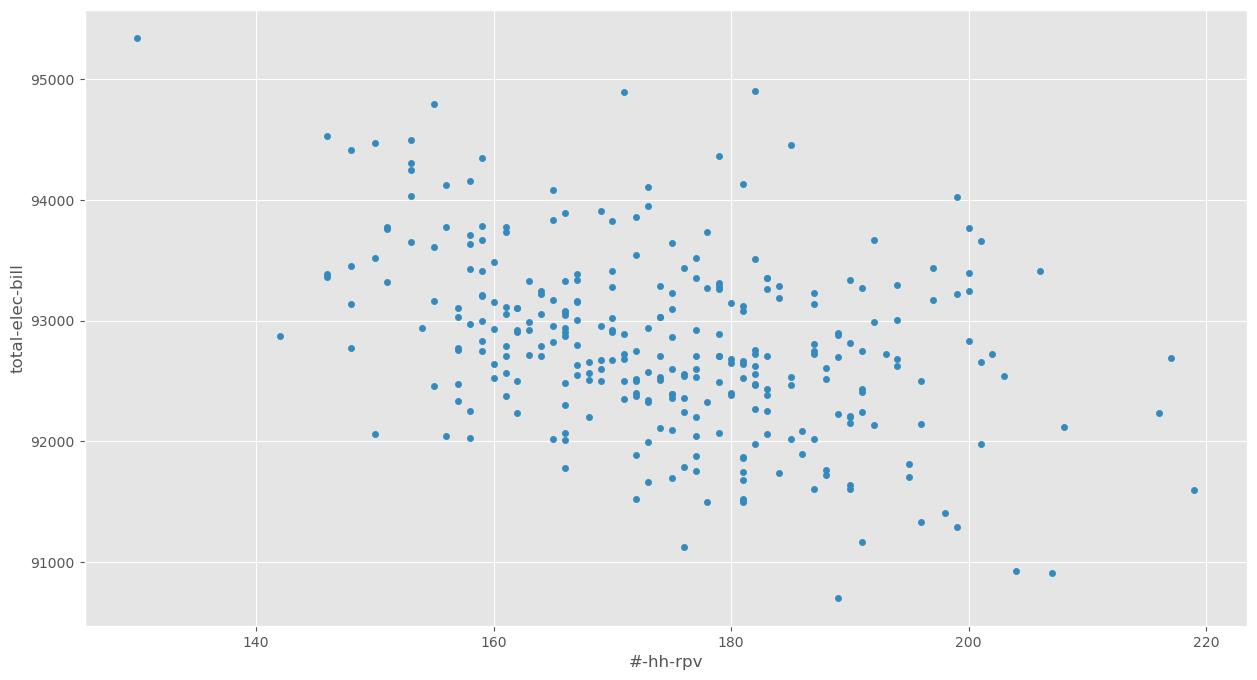

In [53]:
ss1_1.plot.scatter(x= '#-hh-rpv',y='total-elec-bill',figsize=(15,8))

<AxesSubplot:xlabel='#-hh-csp', ylabel='total-elec-bill'>

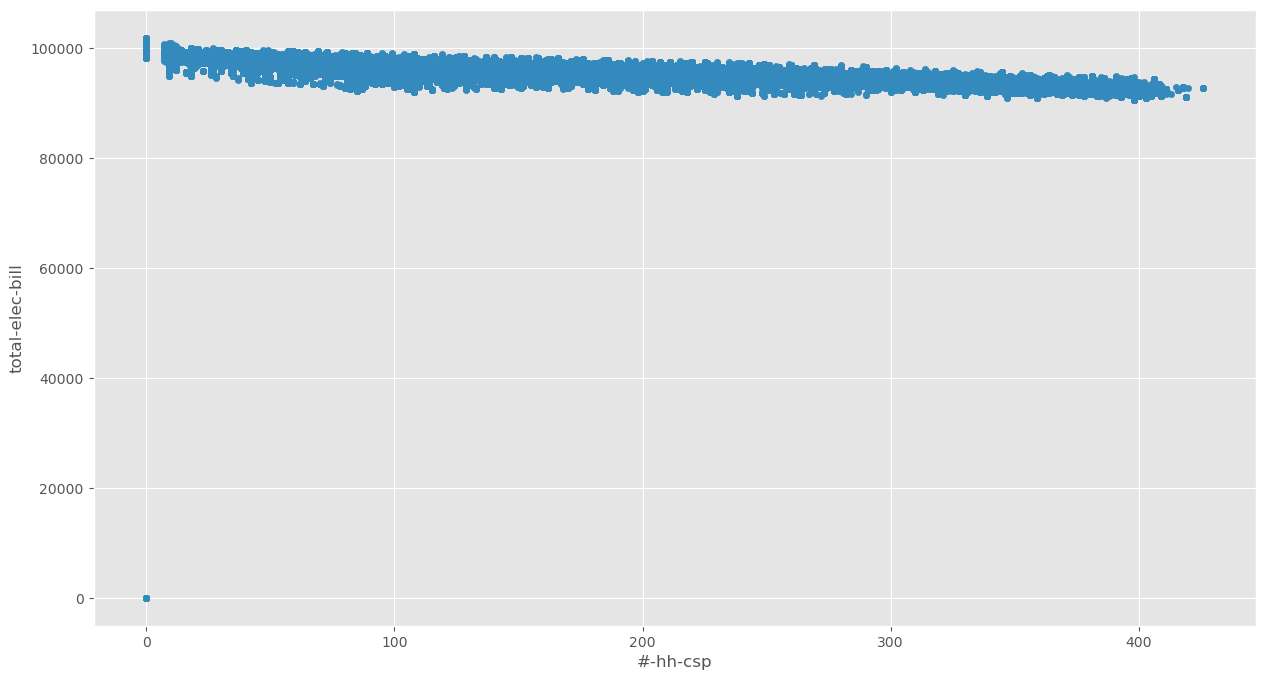

In [54]:
ss1.plot.scatter(x= '#-hh-csp',y='total-elec-bill',figsize=(15,8))

In [55]:
ss2_1 = ss2[(ss2['tick'] == 520)]

<AxesSubplot:xlabel='#-hh-csp', ylabel='total-elec-bill'>

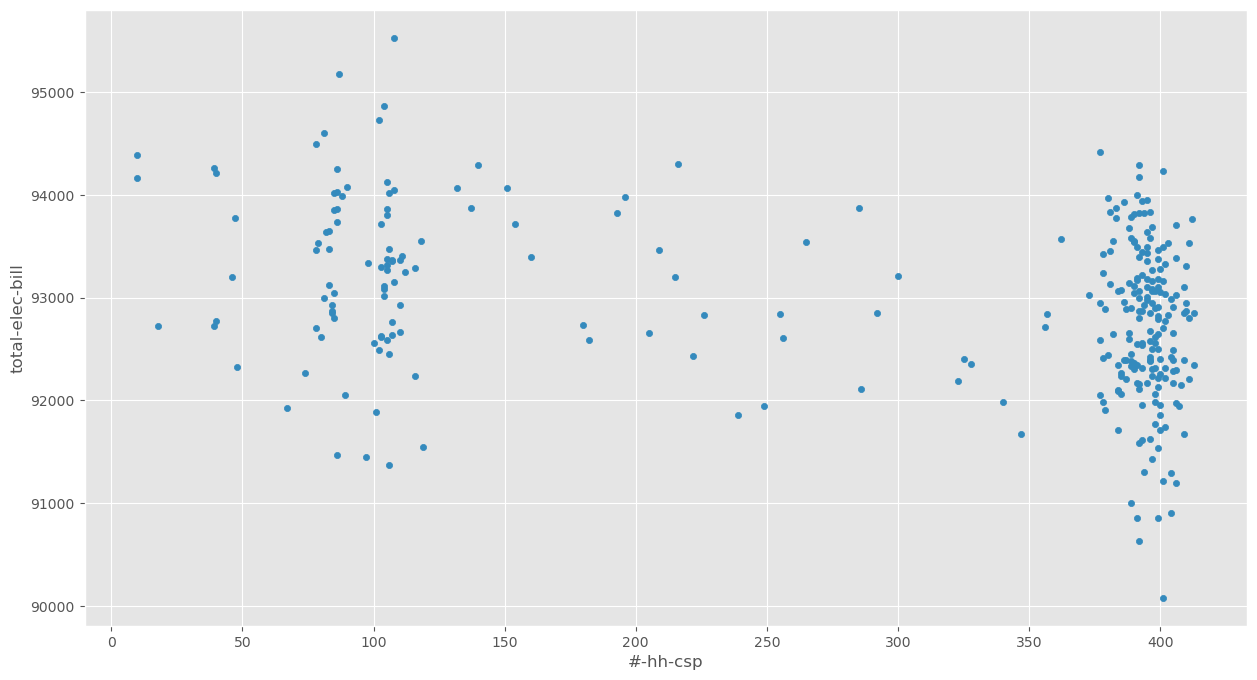

In [56]:
ss2_1.plot.scatter(x= '#-hh-csp',y='total-elec-bill',figsize=(15,8))

In [57]:
ss3_1 = ss3[(ss3['tick'] == 520)]

<AxesSubplot:xlabel='#-hh-csp', ylabel='total-elec-bill'>

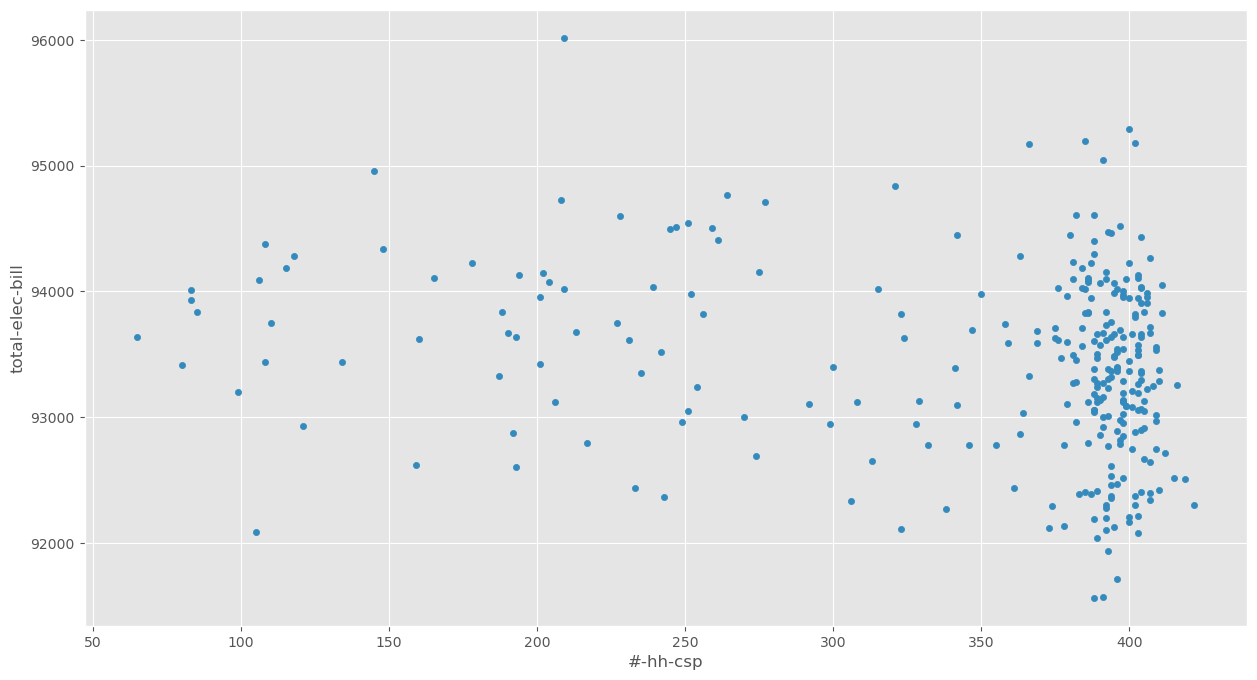

In [58]:
ss3_1.plot.scatter(x= '#-hh-csp',y='total-elec-bill',figsize=(15,8))

In [59]:
ss5_1 = ss5[(ss5['tick'] == 520)]

In [60]:
ss5_1[:]

[run number] region  #-developers  #-households  MW-block-init-kW-res  \
158208           302  ConEd             0          2000                   150   
158228           301  ConEd             0          2000                   150   
158564           303  ConEd             0          2000                   150   
160341           304  ConEd             0          2000                   150   
160411           306  ConEd             0          2000                   150   
...              ...    ...           ...           ...                   ...   
311097           596  ConEd             0          2000                   150   
312704           597  ConEd             0          2000                   150   
313482           599  ConEd             0          2000                   150   
313579           598  ConEd             0          2000                   150   
313622           600  ConEd             0          2000                   150   

        MW-block-init-kW-com  e-price-effect  csp-true  VDER-effect  \
158208                   120           False      True          0.6   
158228                   120           False      True          0.6   
158564                   120           False      True          0.6   
160341                   120           False      True          0.6   
160411                   120           False      True          0.6   
...                      ...             ...       ...          ...   
311097                   120           False      True          0.9   
312704                   120           False      True          0.9   
313482                   120           False      True          0.9   
313579                   120           False      True          0.9   
313622                   120           False      True          0.9   

        strategy-intv1  tick  total-elec-bill  total-proj-cost    elect-usage  \
158208            0.33   520     93833.602977         0.000000  349949.993121   
158228            0.33   520     93867.076310         0.000000  413762.435378   
158564            0.33   520     94415.418086         0.000000  411813.181436   
160341            0.33   520     93816.434463         0.000000  345787.513751   
160411            0.33   520     93669.150076      3273.120519  350137.697376   
...                ...   ...              ...              ...            ...   
311097            1.00   520     93135.771228         0.000000  406895.581206   
312704            1.00   520     93813.307319         0.000000  351575.658198   
313482            1.00   520     94117.024855         0.000000  349536.083148   
313579            1.00   520     94354.557175         0.000000  410319.457538   
313622            1.00   520     94861.086188         0.000000  352774.260501   

             prod-hh      csp-prod  emissions-hh  #-hh-rpv  #-hh-csp  \
158208  13767.230769  88371.562224  1.011727e+08       167       398   
158228  14181.000000  18009.404690  1.153845e+08       181        88   
158564  14632.384615  23281.449930  1.151193e+08       174       105   
160341  11134.153846  90678.652614  1.000293e+08       148       405   
160411  11942.884615  85806.583955  1.010265e+08       145       397   
...              ...           ...           ...       ...       ...   
311097  15516.346154  23154.417923  1.137952e+08       194       102   
312704  12864.461538  85712.525976  1.014557e+08       178       389   
313482  11792.423077  88567.892547  1.009872e+08       162       397   
313579  14952.115385  24912.853297  1.147993e+08       177       114   
313622  12808.038462  89529.779177  1.019667e+08       154       400   

        able-to-cs  pos-npv  pos-savings   avg-age  avg-income  avg-education  \
158208           0      309          476  0.005531   -0.013072      -0.022322   
158228           0      299          467 -0.005618   -0.005009       0.044484   
158564           0      301          442 -0.026230   -0.010935       0.003777   
160341           0  

<AxesSubplot:xlabel='#-hh-csp', ylabel='total-elec-bill'>

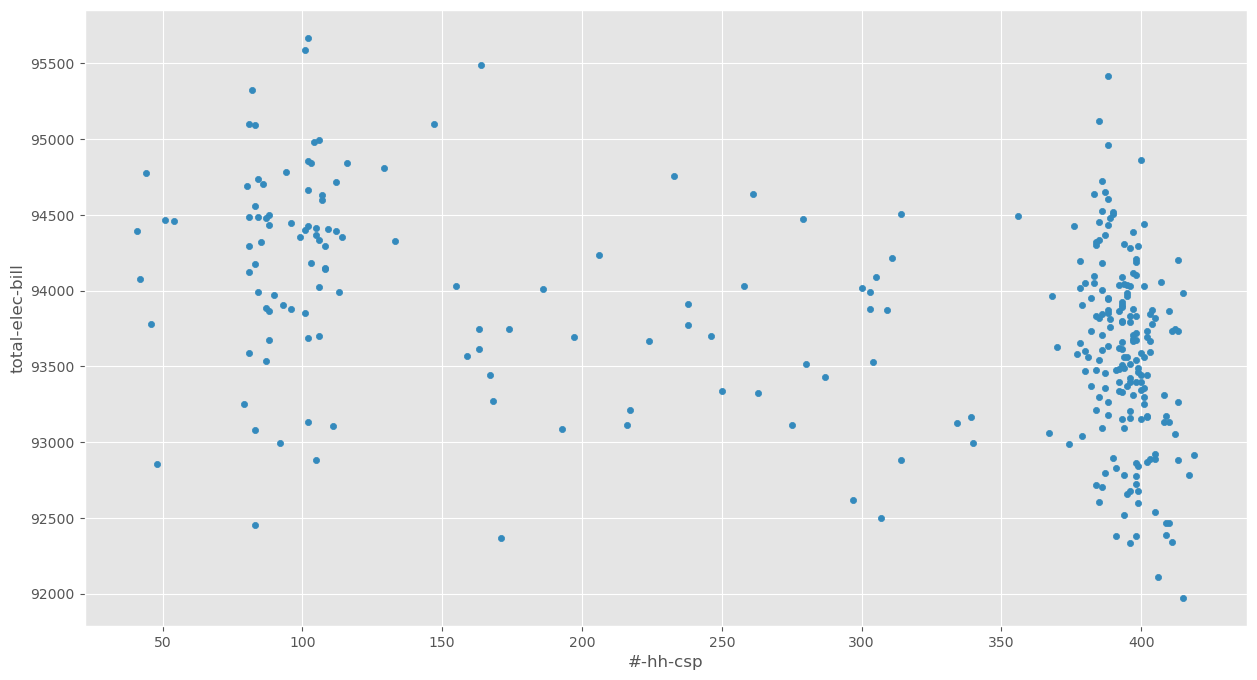

In [61]:
ss5_1.plot.scatter(x= '#-hh-csp',y='total-elec-bill',figsize=(15,8))

In [62]:
column_names = [ 'total-elec-bill',
 'total-proj-cost',
 'elect-usage',
 'prod-hh',
 'emissions-hh',
 '#-hh-rpv',
 '#-hh-csp']

In [63]:
stats.ttest_rel(ss1 ['#-hh-csp'], ss5['#-hh-csp'])

Ttest_relResult(statistic=27.068328828515316, pvalue=5.483866888161502e-161)

In [64]:
stats.ttest_rel(ss1 ['#-hh-rpv'], ss5['#-hh-rpv'])

Ttest_relResult(statistic=12.33324244886981, pvalue=6.227363655608846e-35)

In [65]:
stats.ttest_rel(ss11 ['total-proj-cost'], ss5['total-proj-cost'])

Ttest_relResult(statistic=11.825393412140393, pvalue=2.9784283773612916e-32)

In [66]:
stats.ttest_rel(ss1 ['total-proj-cost'], ss5['total-proj-cost'])

Ttest_relResult(statistic=0.6403530138898721, pvalue=0.5219440610461219)

In [67]:
names_df_t = ['Variable', 'Statistic', 'p-value']
df_t2 =pd.DataFrame(columns = names_df_t)
t2 = []
for i in column_names:
    statis = stats.ttest_rel(ss1 [i], ss5[i] )
    #t2.append (f'{i}, statistic= {round(statis[0], 3)} , p-value= {round(statis[1], 3)}')
    df_dictio = pd.DataFrame([{'Variable': i, 'Statistic': statis[0],'p-value':statis[1]}])
    df_t2 = pd.concat([df_t2, df_dictio], ignore_index=True)
    
df_t2

Variable  Statistic        p-value
0  total-elec-bill -34.555020  1.162996e-260
1  total-proj-cost   0.640353   5.219441e-01
2      elect-usage -27.043190  1.080174e-160
3          prod-hh   9.151329   5.688695e-20
4     emissions-hh -27.376504  1.282272e-164
5         #-hh-rpv  12.333242   6.227364e-35
6         #-hh-csp  27.068329  5.483867e-161

In [68]:
df_t3 =pd.DataFrame(columns = names_df_t)
t3 = []
for i in column_names:
    statis = stats.ttest_rel(ss11 [i], ss5[i] )
    #t3.append(f'{i}, statistic= {round(statis[0], 3)} , p-value= {round(statis[1], 3)}')
    df_dictio = pd.DataFrame([{'Variable': i, 'Statistic': statis[0],'p-value':statis[1]}])
    df_t3 = pd.concat([df_t3, df_dictio], ignore_index=True)
df_t3

Variable   Statistic       p-value
0  total-elec-bill   -1.940303  5.234462e-02
1  total-proj-cost   11.825393  2.978428e-32
2      elect-usage  474.842853  0.000000e+00
3          prod-hh   60.664281  0.000000e+00
4     emissions-hh  471.638703  0.000000e+00
5         #-hh-rpv   61.960425  0.000000e+00
6         #-hh-csp -539.934956  0.000000e+00

In [69]:
ss1

[run number] region  #-developers  #-households  \
1092882          2101  ConEd             0          2000   
1092884          2101  ConEd             0          2000   
1092889          2101  ConEd             0          2000   
1092894          2101  ConEd             0          2000   
1092896          2101  ConEd             0          2000   
...               ...    ...           ...           ...   
1250395          2400  ConEd             0          2000   
1250396          2400  ConEd             0          2000   
1250397          2400  ConEd             0          2000   
1250398          2400  ConEd             0          2000   
1250399          2400  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
1092882                   150                   120           False      True   
1092884                   150                   120           False      True   
1092889                   150                   120           False      True   
1092894                   150                   120           False      True   
1092896                   150                   120           False      True   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False      True   
1250396                   150                   120           False      True   
1250397                   150                   120           False      True   
1250398                   150                   120           False      True   
1250399                   150                   120           False      True   

         VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
1092882          0.6            0.33     0         0.000000         0.000000   
1092884          0.6            0.33     1    100876.945526         0.000000   
1092889          0.6            0.33     2    100876.945526         0.000000   
1092894          0.6            0.33     3    100784.261219     12122.072046   
1092896          0.6            0.33     4    100784.261219         0.000000   
...              ...             ...   ...              ...              ...   
1250395          0.9            1.00   516     92097.623261         0.000000   
1250396          0.9            1.00   517     92097.623261         0.000000   
1250397          0.9            1.00   518     92097.623261         0.000000   
1250398          0.9            1.00   519     92097.623261         0.000000   
1250399          0.9            1.00   520     92056.026366         0.000000   

           elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
1092882  450343.506813      0.000000      0.000000  1.240120e+08         0   
1092884  450343.506813      0.000000      0.000000  1.240120e+08         0   
1092889  450136.622198    206.884615      0.000000  1.240120e+08         4   
1092894  450136.622198    206.884615      0.000000  1.239635e+08         4   
1092896  449892.122198    451.384615      0.000000  1.239635e+08         8   
...                ...           ...           ...           ...       ...   
1250395  349335.984867  15347.076923  85734.662111  1.009418e+08       183   
1250396  349335.984867  15347.076923  85734.662111  1.009418e+08       183   
1250397  349335.984867  15347.076923  85734.662111  1.009418e+08       183   
1250398  347478.980605  15347.076923  87591.666373  1.005196e+08       183   
1250399  347478.980605  15347.076923  87591.666373  1.005196e+08       183   

         #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
1092882         0           0        0            0 -0.020244    0.015814   
1092884         0           0        0          606 -0.020244    0.015814   
1092889         0           0       11          599 -0.020244    0.015814   
1092894         0           0       19          591 -0.020244    0.015814   
1092896         0           0   

In [70]:
x = ss1['elect-usage'].sum() + ss1['prod-hh'].sum() + ss1['csp-prod'].sum()
y = ss1['prod-hh'].sum() + ss1['csp-prod'].sum()
print (x/y)

10.169654723045847


In [71]:
y = ss1['emissions-hh']
x = ss1['tick']
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()
result.params

const    1.229664e+08
tick    -3.617749e+04
dtype: float64

In [72]:
#for i in column_names:
#    for r in data_list1:
#        sns.regplot(x='[step]', y=i, data=r, x_bins = 25)

<AxesSubplot:xlabel='tick', ylabel='emissions-hh'>

<AxesSubplot:xlabel='tick', ylabel='emissions-hh'>

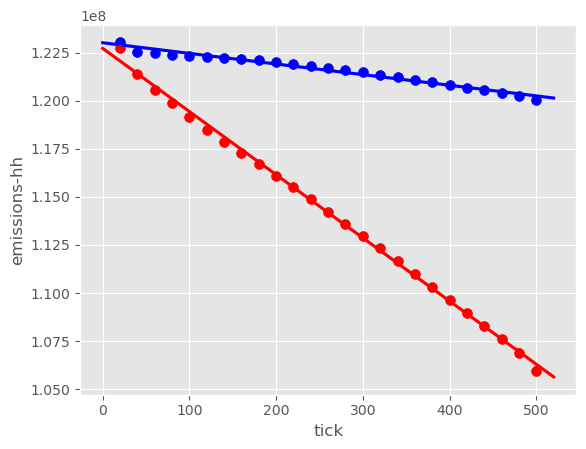

In [73]:
sns.regplot(x='tick', y="emissions-hh", data=ss11, x_bins = 25, color = 'blue')
sns.regplot(x='tick', y="emissions-hh", data=ss5, x_bins = 25, color = 'red')

<AxesSubplot:xlabel='tick', ylabel='emissions-hh'>

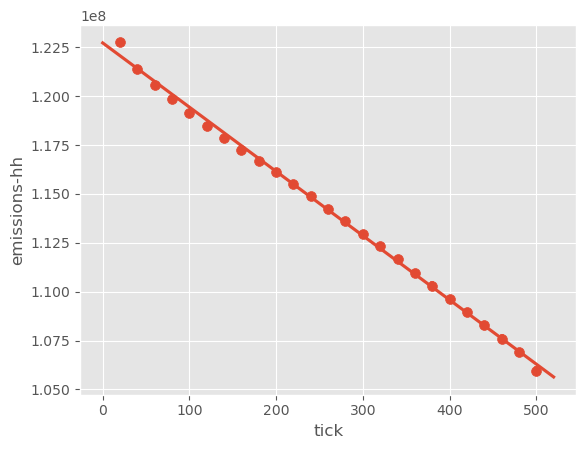

In [74]:
sns.regplot(x='tick', y="emissions-hh", data=ss5, x_bins = 25)

In [75]:
fkpi4(ss11)

9501033947.345373

In [76]:
fkpi3(ss11)

0.09830689234300138

In [77]:
fkpi3(ss5)

0.3550916933872915

In [78]:
fkpi5(ss5)

89679692

In [79]:
fkpi5(ss11)

66191684

In [80]:
ss11['#-hh-csp'].sum()

0

In [81]:
ss5['#-hh-csp'].sum()

23749825

In [82]:
ss11_non0 = ss11.loc[ss11['tick']!=0]
ss11_non0

[run number] region  #-developers  #-households  \
1092834          2101  ConEd             0          2000   
1092840          2101  ConEd             0          2000   
1092843          2101  ConEd             0          2000   
1092846          2101  ConEd             0          2000   
1092850          2101  ConEd             0          2000   
...               ...    ...           ...           ...   
1250395          2400  ConEd             0          2000   
1250396          2400  ConEd             0          2000   
1250397          2400  ConEd             0          2000   
1250398          2400  ConEd             0          2000   
1250399          2400  ConEd             0          2000   

         MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
1092834                   150                   120           False     False   
1092840                   150                   120           False     False   
1092843                   150                   120           False     False   
1092846                   150                   120           False     False   
1092850                   150                   120           False     False   
...                       ...                   ...             ...       ...   
1250395                   150                   120           False     False   
1250396                   150                   120           False     False   
1250397                   150                   120           False     False   
1250398                   150                   120           False     False   
1250399                   150                   120           False     False   

         VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
1092834          0.6            0.33     1    100234.918756         0.000000   
1092840          0.6            0.33     2    100234.918756         0.000000   
1092843          0.6            0.33     3    100184.363679      3412.990512   
1092846          0.6            0.33     4    100066.401832     14608.142762   
1092850          0.6            0.33     5     99973.717525     16847.240057   
...              ...             ...   ...              ...              ...   
1250395          0.9            1.00   516     93240.413045         0.000000   
1250396          0.9            1.00   517     93240.413045         0.000000   
1250397          0.9            1.00   518     93240.413045         0.000000   
1250398          0.9            1.00   519     93240.413045         0.000000   
1250399          0.9            1.00   520     93240.413045         0.000000   

           elect-usage       prod-hh  csp-prod  emissions-hh  #-hh-rpv  \
1092834  447477.315873      0.000000       0.0  1.232227e+08         0   
1092840  447364.469719    112.846154       0.0  1.232227e+08         2   
1092843  447101.162027    376.153846       0.0  1.231963e+08         6   
1092846  446894.277411    583.038462       0.0  1.231346e+08         7   
1092850  446781.431258    695.884615       0.0  1.230861e+08         9   
...                ...           ...       ...           ...       ...   
1250395  432106.728568  15854.884615       0.0  1.196401e+08       182   
1250396  432106.728568  15854.884615       0.0  1.196401e+08       182   
1250397  432106.728568  15854.884615       0.0  1.196401e+08       182   
1250398  432106.728568  15854.884615       0.0  1.196401e+08       182   
1250399  432106.728568  15854.884615       0.0  1.196401e+08       182   

         #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
1092834         0           0        0          611 -0.065301   -0.020996   
1092840         0           0       13          600 -0.065301   -0.020996   
1092843         0           0       27          590 -0.065301   -0.020996   
1092846         0           0       42          576 -0.065301   -0.020996   
1092850         0           0       55          565 -0.065301   -0.020996   
...

In [83]:
kpi_list = ['Availability', 'Affordability', 'Accessibility', 'Acceptability', 'Ability', 'Appeal' ]

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

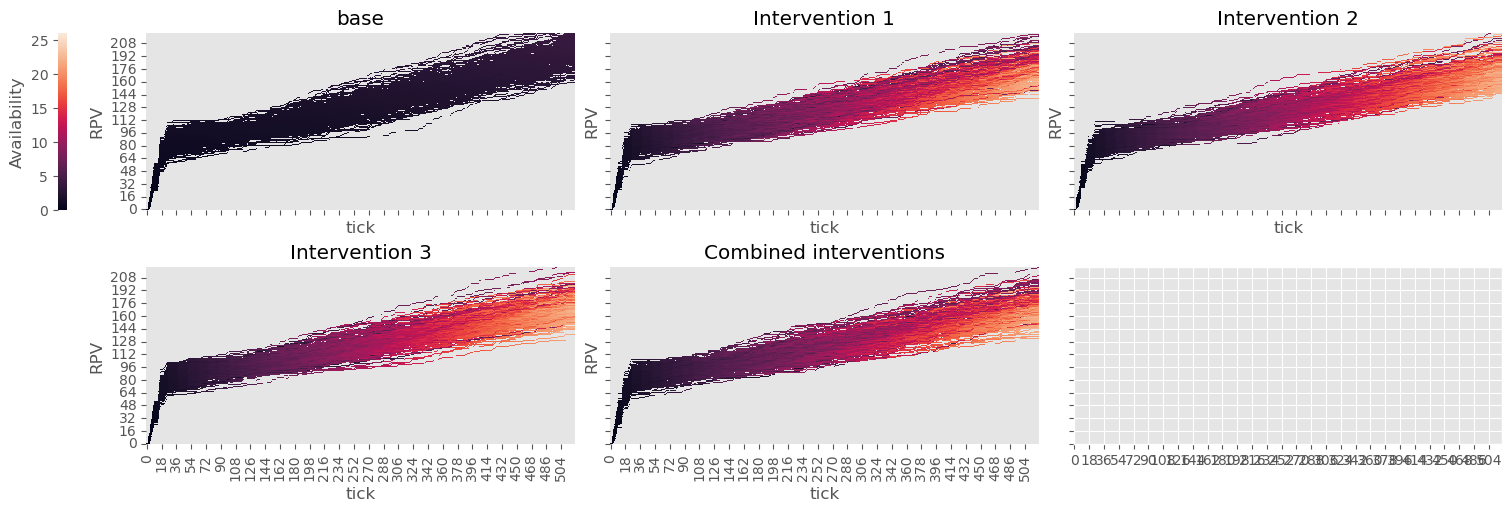

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

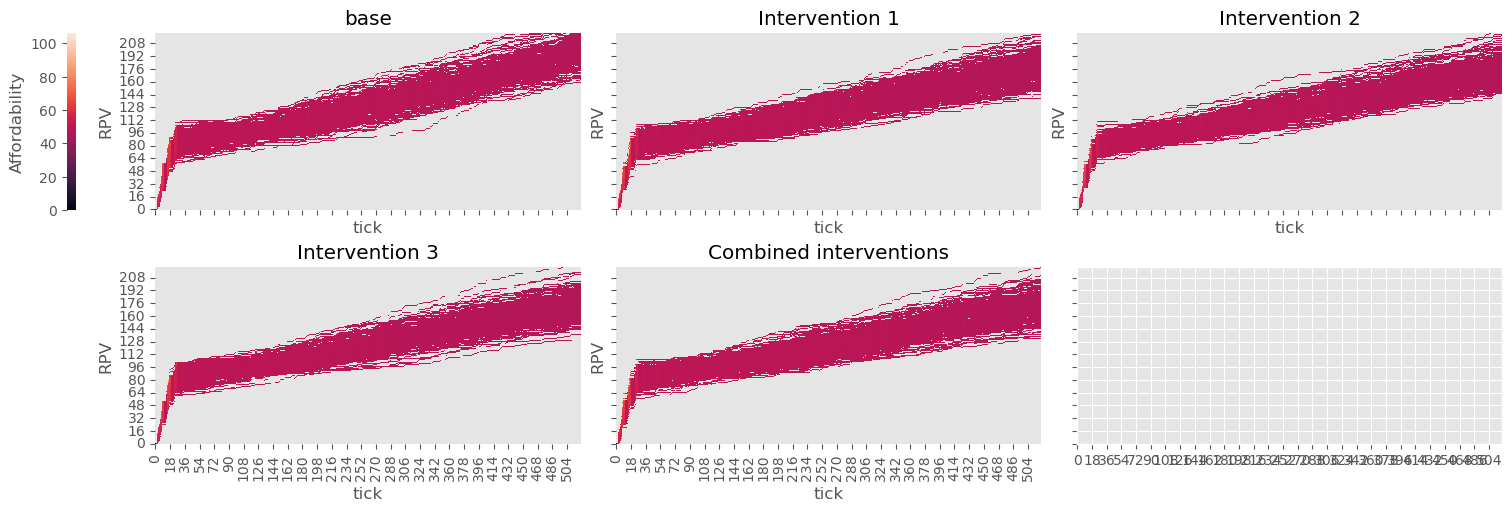

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

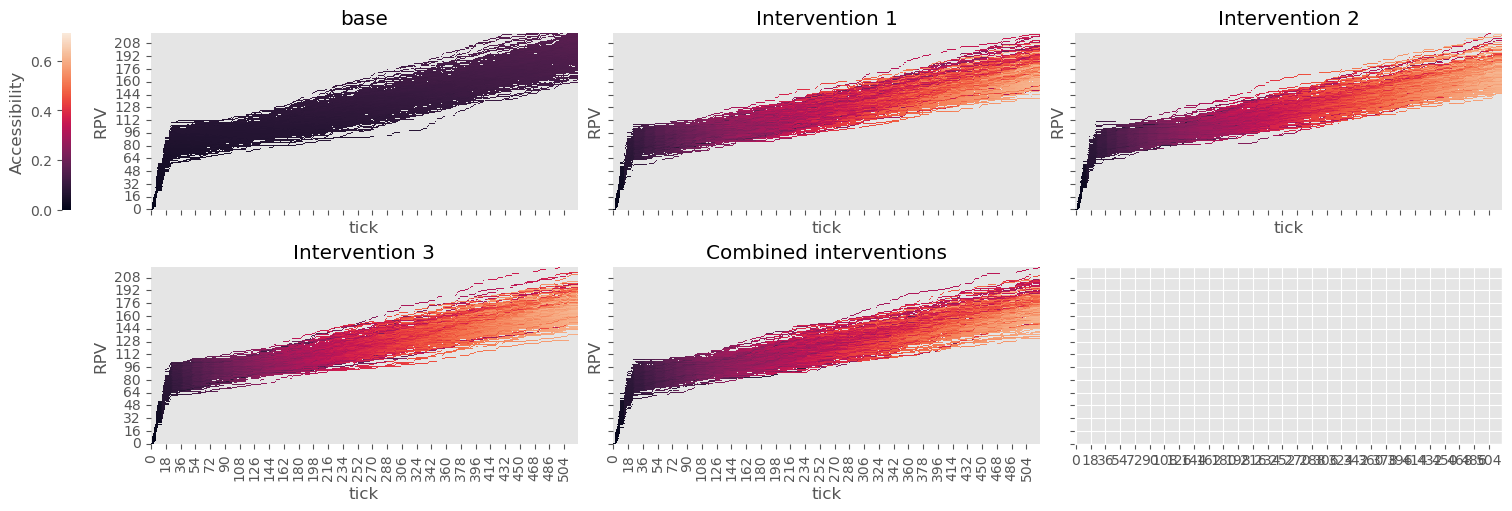

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

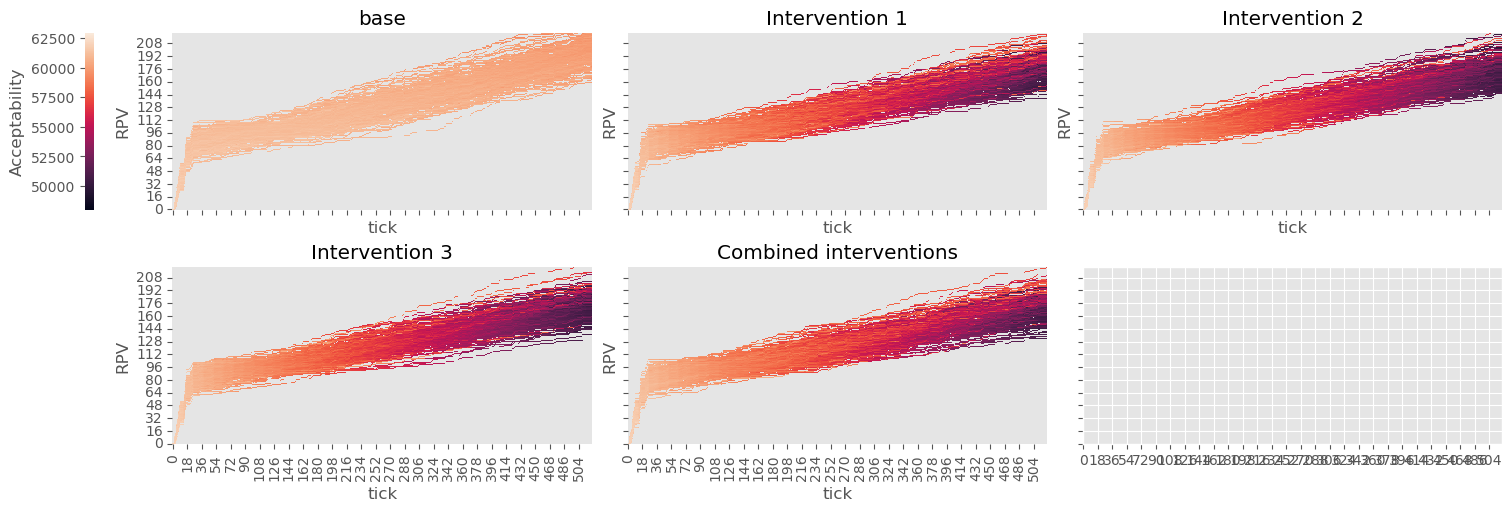

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

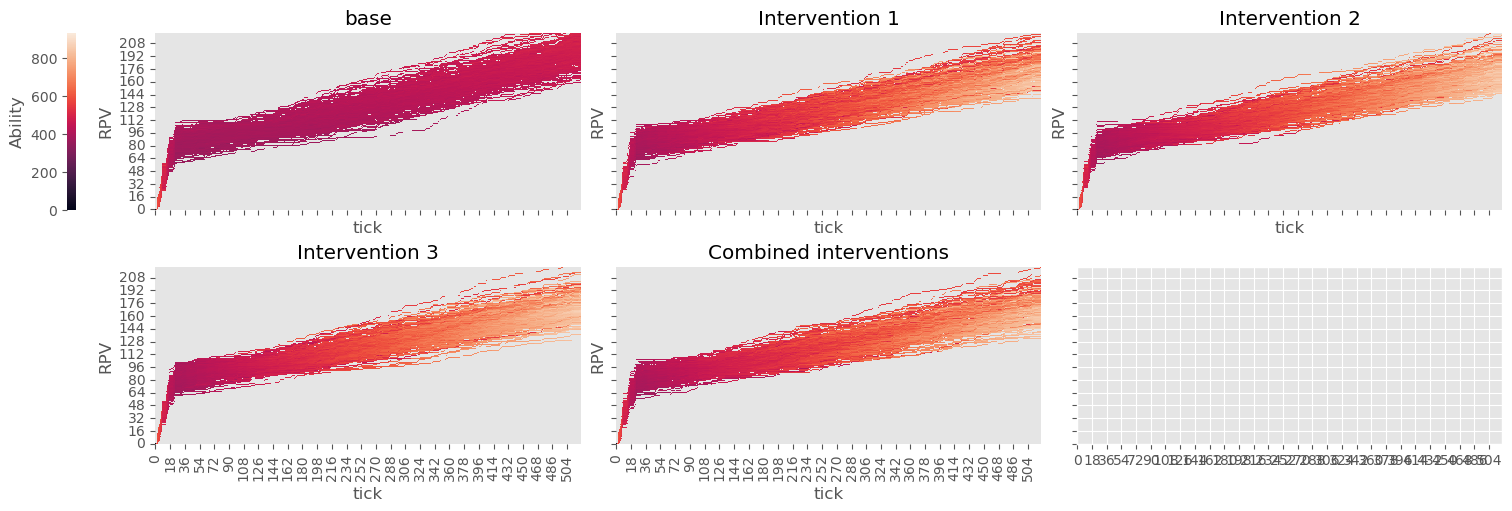

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

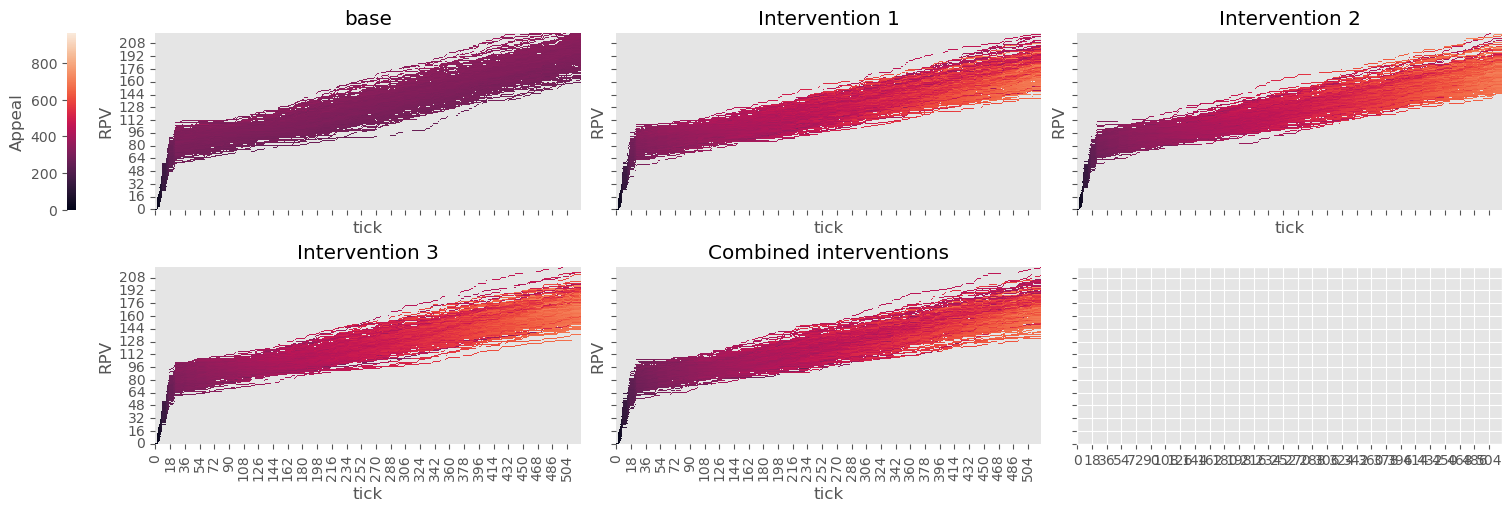

In [84]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

for i in kpi_list:
    ss11_data = pd.DataFrame({'tick' : ss11['tick'], 'RPV' : ss11['#-hh-rpv'], 'Z' :  ss11[i]}) 
    ss11_wide = ss11_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss2_data = pd.DataFrame({'tick' : ss2['tick'], 'RPV' : ss2['#-hh-rpv'], 'Z' :  ss2[i]}) 
    ss2_wide = ss2_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss3_data = pd.DataFrame({'tick' : ss3['tick'], 'RPV' : ss3['#-hh-rpv'], 'Z' :  ss3[i]}) 
    ss3_wide = ss3_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss4_data = pd.DataFrame({'tick' : ss4['tick'], 'RPV' : ss4['#-hh-rpv'], 'Z' :  ss4[i]}) 
    ss4_wide = ss4_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss5_data = pd.DataFrame({'tick' : ss5['tick'], 'RPV' : ss5['#-hh-rpv'], 'Z' :  ss5[i]}) 
    ss5_wide = ss5_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    fig, axes =  plt.subplots(2, 3, figsize=(15, 5), sharey=True, sharex = True, layout= 'constrained')
    sns.heatmap(ss11_wide, ax = axes[0,0], vmin = min(df[i]), vmax = max(df[i]), 
                cbar_kws ={'label': f'{i}', 'location': 'left'})
    axes[0,0].set_title('base')
    sns.heatmap(ss2_wide, ax = axes[0,1], vmin = min(df[i]), vmax = max(df[i]), cbar=False)
    axes[0,1].set_title('Intervention 1')
    sns.heatmap(ss3_wide, ax = axes[0,2], vmin = min(df[i]), vmax = max(df[i]), cbar=False)
    axes[0,2].set_title('Intervention 2')
    sns.heatmap(ss4_wide, ax = axes[1,0], vmin = min(df[i]), vmax = max(df[i]), cbar=False)
    axes[1,0].set_title('Intervention 3')
    sns.heatmap(ss5_wide, ax = axes[1,1], vmin = min(df[i]), vmax = max(df[i]), cbar =False)
    axes[1,1].set_title('Combined interventions')

    axes[0,0].invert_yaxis()
    axes[0,1].invert_yaxis()
    axes[0,2].invert_yaxis()
    axes[1,0].invert_yaxis()
    axes[1,1].invert_yaxis()

    plt.show()


<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

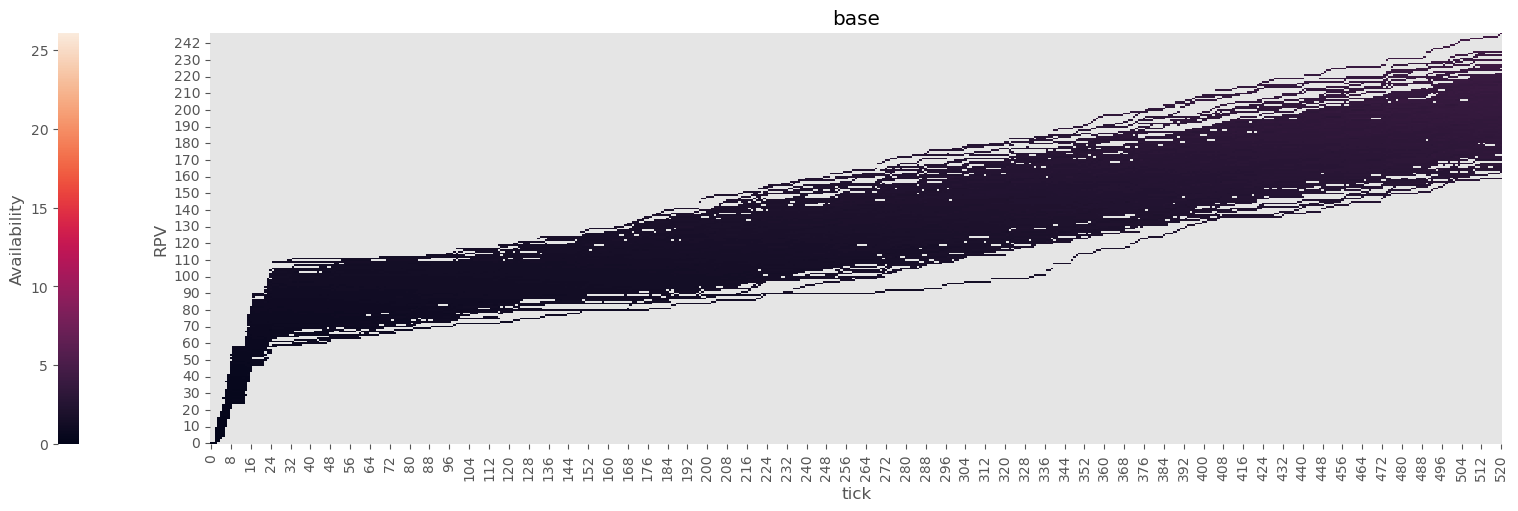

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

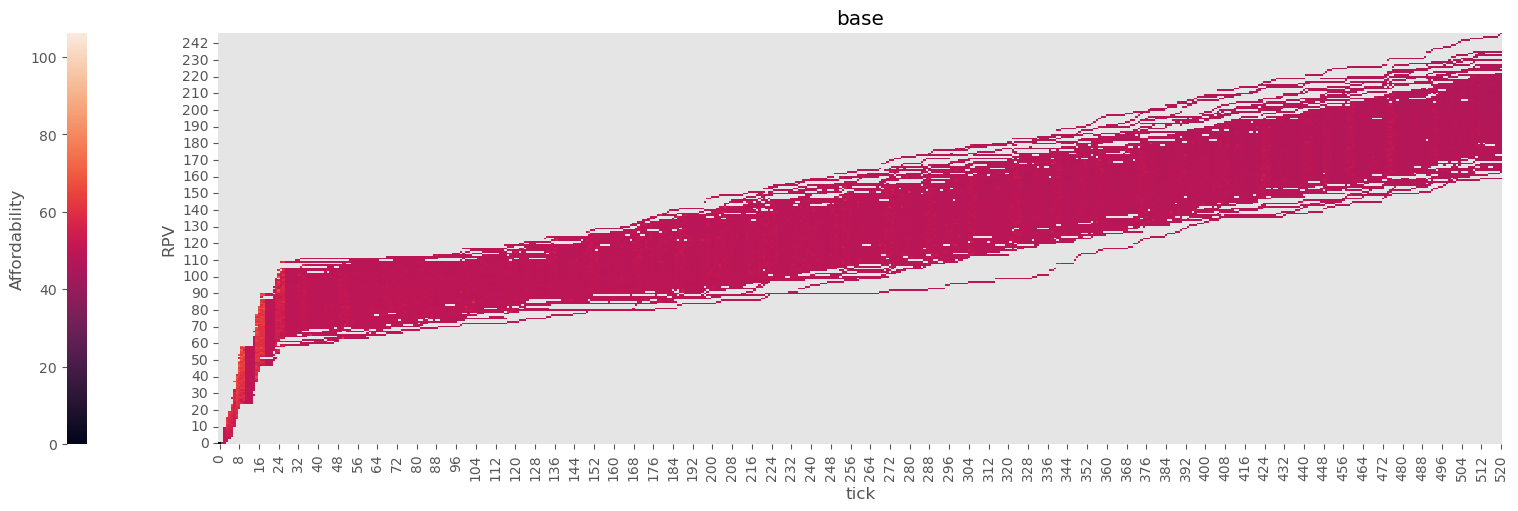

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

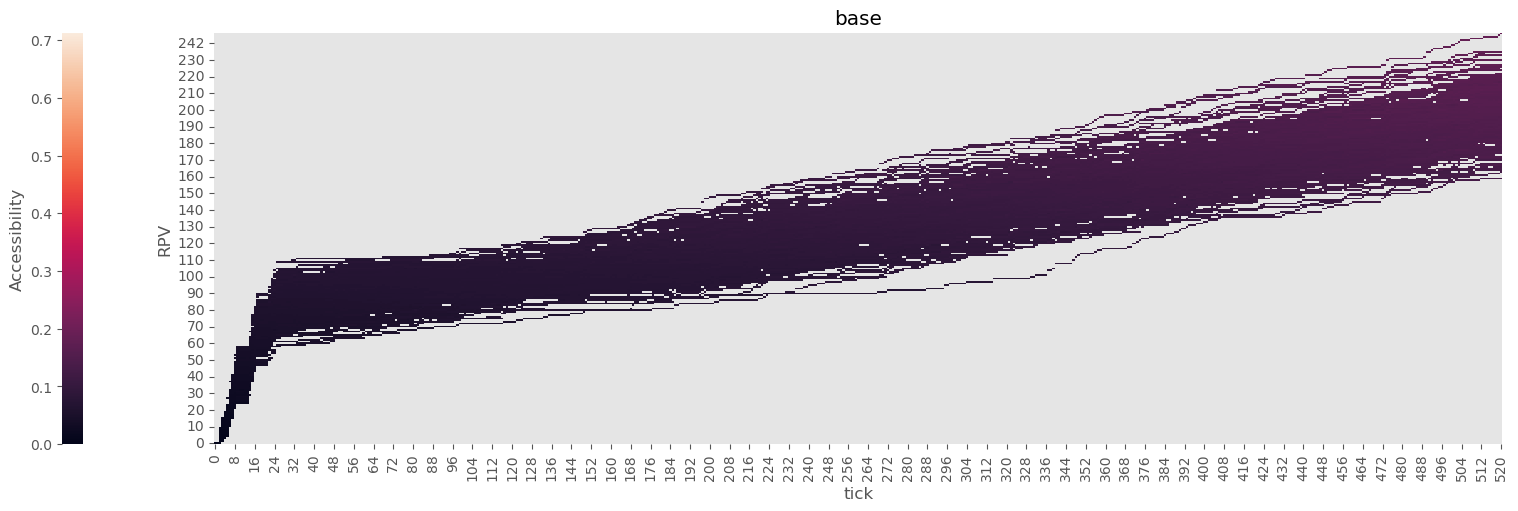

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

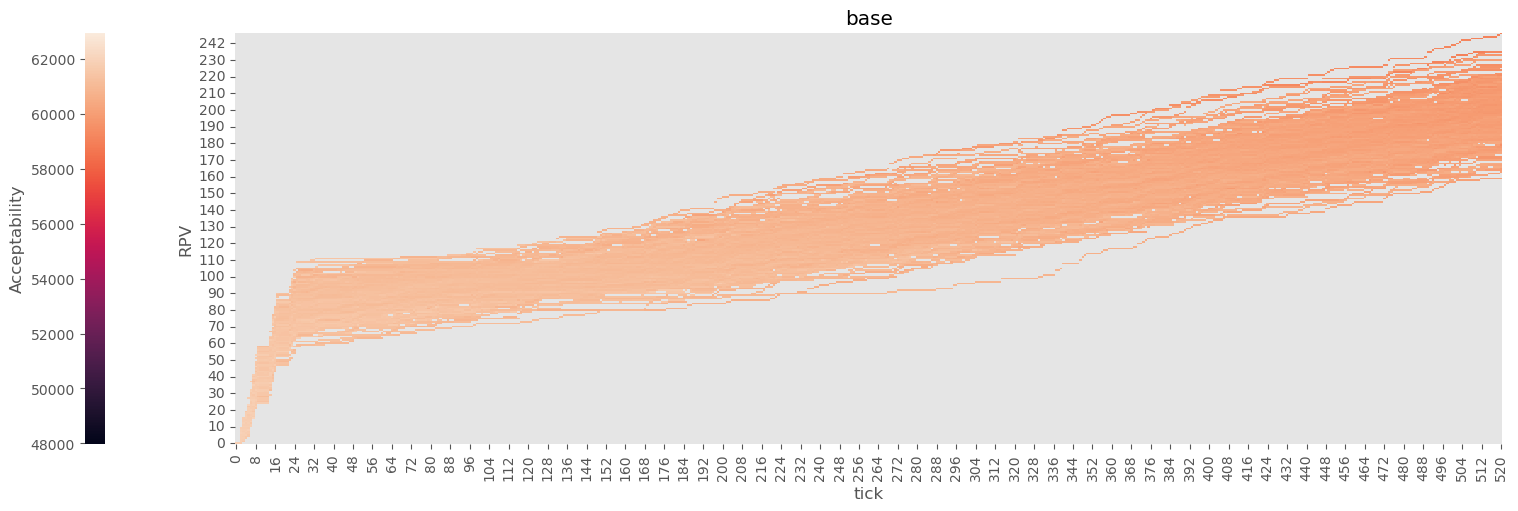

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

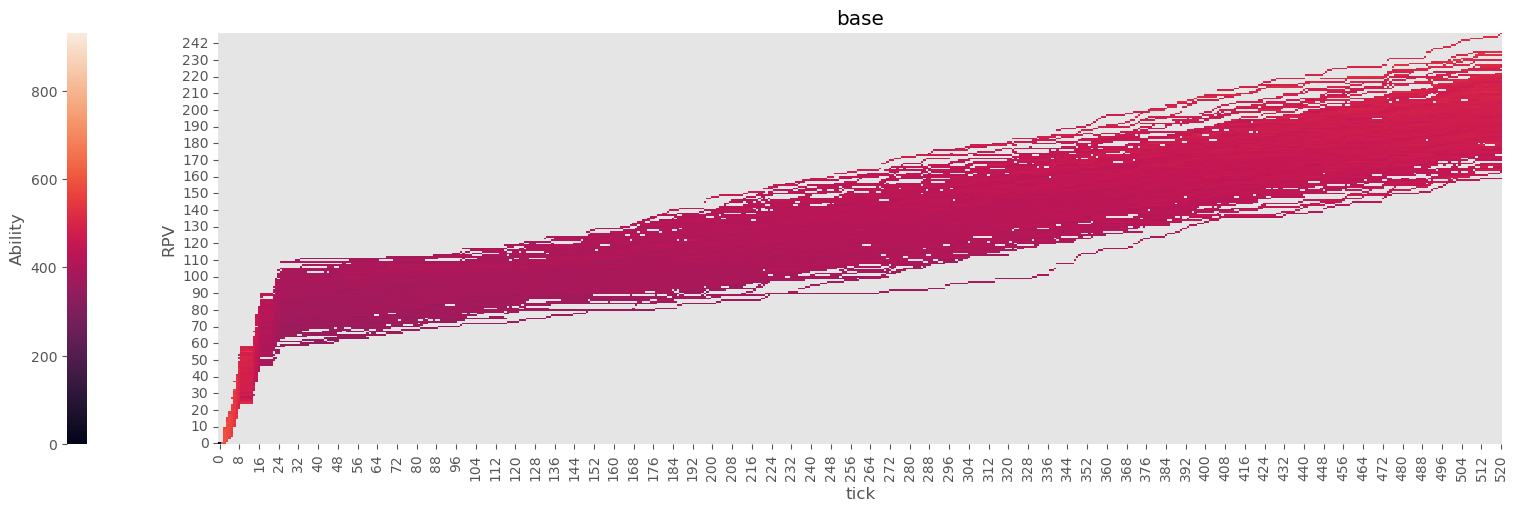

<AxesSubplot:xlabel='tick', ylabel='RPV'>

Text(0.5, 1.0, 'base')

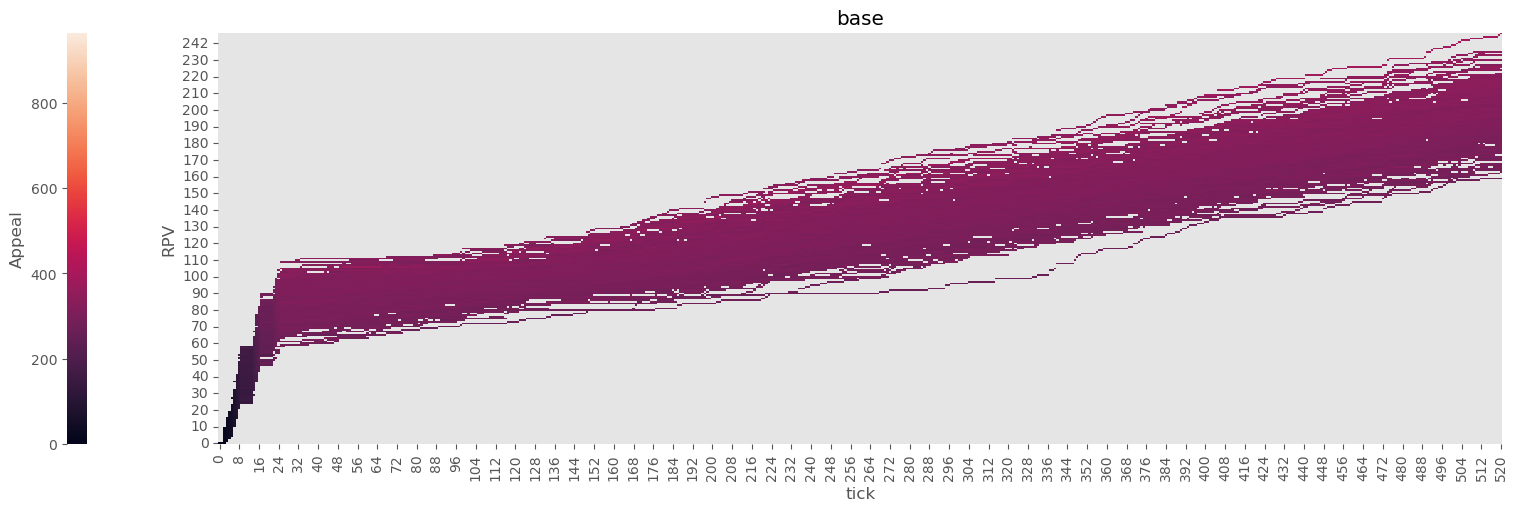

In [85]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

for i in kpi_list:
    ss11_data = pd.DataFrame({'tick' : ss11['tick'], 'RPV' : ss11['#-hh-rpv'], 'Z' :  ss11[i]}) 
    ss11_wide = ss11_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss2_data = pd.DataFrame({'tick' : ss2['tick'], 'RPV' : ss2['#-hh-rpv'], 'Z' :  ss2[i]}) 
    ss2_wide = ss2_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss3_data = pd.DataFrame({'tick' : ss3['tick'], 'RPV' : ss3['#-hh-rpv'], 'Z' :  ss3[i]}) 
    ss3_wide = ss3_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss4_data = pd.DataFrame({'tick' : ss4['tick'], 'RPV' : ss4['#-hh-rpv'], 'Z' :  ss4[i]}) 
    ss4_wide = ss4_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    ss5_data = pd.DataFrame({'tick' : ss5['tick'], 'RPV' : ss5['#-hh-rpv'], 'Z' :  ss5[i]}) 
    ss5_wide = ss5_data.pivot_table(index = 'RPV', columns = 'tick', values = 'Z')

    fig, axes =  plt.subplots(1,1, figsize=(15, 5), sharey=True, sharex = True, layout= 'constrained')
    sns.heatmap(ss11_wide, vmin = min(df[i]), vmax = max(df[i]), 
                cbar_kws ={'label': f'{i}', 'location': 'left'})
    axes.set_title('base')
   
    axes.invert_yaxis()

    plt.show()



In [86]:
sns.set_theme()

In [87]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y=i, label = 'Base')
    fig.set_title(f'Base scenario: {i}')
    plt.legend()
    plt.savefig(f'base scenario {i}')
    plt.close()

Text(0.5, 1.0, 'Base scenario: Availability')

Text(0.5, 1.0, 'Base scenario: Affordability')

Text(0.5, 1.0, 'Base scenario: Accessibility')

Text(0.5, 1.0, 'Base scenario: Acceptability')

Text(0.5, 1.0, 'Base scenario: Ability')

Text(0.5, 1.0, 'Base scenario: Appeal')

In [88]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss1, x = 'tick', y=i, label = 'Base with CSP')
    fig.set_title(f'Base scenario with CSP: {i}')
    plt.legend()
    plt.savefig(f'base scenario with csp {i}')
    plt.close()

Text(0.5, 1.0, 'Base scenario with CSP: Availability')

Text(0.5, 1.0, 'Base scenario with CSP: Affordability')

Text(0.5, 1.0, 'Base scenario with CSP: Accessibility')

Text(0.5, 1.0, 'Base scenario with CSP: Acceptability')

Text(0.5, 1.0, 'Base scenario with CSP: Ability')

Text(0.5, 1.0, 'Base scenario with CSP: Appeal')

In [89]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss22 , x = 'tick', y = i, label = 'Intervention 1: 33% (Mild)')
    fig = sns.lineplot(data = ss23 , x = 'tick', y = i, label = 'Intervention 1: 67% (Moderate)')
    fig = sns.lineplot(data = ss24 , x = 'tick', y = i, label = 'Intervention 1: 100% (Aggressive)')
    fig.set_title(f'Intervention 1: {i}')
    plt.legend()
    plt.savefig(f'intv1 {i}')
    plt.close()

Text(0.5, 1.0, 'Intervention 1: Availability')

Text(0.5, 1.0, 'Intervention 1: Affordability')

Text(0.5, 1.0, 'Intervention 1: Accessibility')

Text(0.5, 1.0, 'Intervention 1: Acceptability')

Text(0.5, 1.0, 'Intervention 1: Ability')

Text(0.5, 1.0, 'Intervention 1: Appeal')

In [90]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss1, x = 'tick', y = i, label = 'Base with CSP')
    fig = sns.lineplot(data = ss22 , x = 'tick', y = i, label = 'Intervention 1: 33% (Mild)')
    fig = sns.lineplot(data = ss23 , x = 'tick', y = i, label = 'Intervention 1: 67% (Moderate)')
    fig = sns.lineplot(data = ss24 , x = 'tick', y = i, label = 'Intervention 1: 100% (Aggressive)')
    fig.set_title(f'Intervention 1 (base with CSP): {i}')
    plt.legend()
    plt.savefig(f'intv1 with csp {i}')
    plt.close()

Text(0.5, 1.0, 'Intervention 1 (base with CSP): Availability')

Text(0.5, 1.0, 'Intervention 1 (base with CSP): Affordability')

Text(0.5, 1.0, 'Intervention 1 (base with CSP): Accessibility')

Text(0.5, 1.0, 'Intervention 1 (base with CSP): Acceptability')

Text(0.5, 1.0, 'Intervention 1 (base with CSP): Ability')

Text(0.5, 1.0, 'Intervention 1 (base with CSP): Appeal')

In [91]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss32 , x = 'tick', y = i, label = 'Intervention 2: 60% (Low)')
    fig = sns.lineplot(data = ss33 , x = 'tick', y = i, label = 'Intervention 2: 90% (High)')
    fig.set_title(f'Intervention 2: {i}')
    plt.legend()
    plt.savefig(f'intv2 {i}')
    plt.close()

Text(0.5, 1.0, 'Intervention 2: Availability')

Text(0.5, 1.0, 'Intervention 2: Affordability')

Text(0.5, 1.0, 'Intervention 2: Accessibility')

Text(0.5, 1.0, 'Intervention 2: Acceptability')

Text(0.5, 1.0, 'Intervention 2: Ability')

Text(0.5, 1.0, 'Intervention 2: Appeal')

In [92]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss1, x = 'tick', y = i, label = 'Base with CSP')
    fig = sns.lineplot(data = ss32 , x = 'tick', y = i, label = 'Intervention 2: 60% (Low)')
    fig = sns.lineplot(data = ss33 , x = 'tick', y = i, label = 'Intervention 2: 90% (High)')
    fig.set_title(f'Intervention 2 (base with CSP): {i}')
    plt.legend()
    plt.savefig(f'intv2 with csp {i}')
    plt.close()

Text(0.5, 1.0, 'Intervention 2 (base with CSP): Availability')

Text(0.5, 1.0, 'Intervention 2 (base with CSP): Affordability')

Text(0.5, 1.0, 'Intervention 2 (base with CSP): Accessibility')

Text(0.5, 1.0, 'Intervention 2 (base with CSP): Acceptability')

Text(0.5, 1.0, 'Intervention 2 (base with CSP): Ability')

Text(0.5, 1.0, 'Intervention 2 (base with CSP): Appeal')

In [93]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss4 , x = 'tick', y = i, label = 'Intervention 3')
    fig.set_title(f'Intervention 3: {i}')
    plt.legend()
    plt.savefig(f'intv3 {i}')
    plt.close()

Text(0.5, 1.0, 'Intervention 3: Availability')

Text(0.5, 1.0, 'Intervention 3: Affordability')

Text(0.5, 1.0, 'Intervention 3: Accessibility')

Text(0.5, 1.0, 'Intervention 3: Acceptability')

Text(0.5, 1.0, 'Intervention 3: Ability')

Text(0.5, 1.0, 'Intervention 3: Appeal')

In [94]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss1, x = 'tick', y = i, label = 'Base with CSP')
    fig = sns.lineplot(data = ss4 , x = 'tick', y = i, label = 'Intervention 3')
    fig.set_title(f'Intervention 3 (base with csp): {i}')
    plt.legend()
    plt.savefig(f'intv3 base with csp{i}')
    plt.close()

Text(0.5, 1.0, 'Intervention 3 (base with csp): Availability')

Text(0.5, 1.0, 'Intervention 3 (base with csp): Affordability')

Text(0.5, 1.0, 'Intervention 3 (base with csp): Accessibility')

Text(0.5, 1.0, 'Intervention 3 (base with csp): Acceptability')

Text(0.5, 1.0, 'Intervention 3 (base with csp): Ability')

Text(0.5, 1.0, 'Intervention 3 (base with csp): Appeal')

In [95]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss5 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined: {i}')
    plt.legend()
    plt.savefig(f'Combined: {i}')
    plt.close()

Text(0.5, 1.0, 'Combined: Availability')

Text(0.5, 1.0, 'Combined: Affordability')

Text(0.5, 1.0, 'Combined: Accessibility')

Text(0.5, 1.0, 'Combined: Acceptability')

Text(0.5, 1.0, 'Combined: Ability')

Text(0.5, 1.0, 'Combined: Appeal')

In [96]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss52 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Mild, intv2: Low): {i}')
    plt.legend()
    plt.savefig(f'Combined (intv1: Mild, intv2: Low): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low): Availability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low): Ability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low): Appeal')

In [97]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss53 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Mild, intv2: High): {i}')
    plt.legend()
    plt.savefig(f'Combined (intv1: Mild, intv2: High): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High): Availability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High): Ability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High): Appeal')

In [98]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss54 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Moderate, intv2: Low): {i}')
    plt.legend()
    plt.savefig(f'Combined (intv1: Moderate, intv2: Low): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low): Availability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low): Ability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low): Appeal')

In [99]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss55 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Moderate, intv2: High): {i}')
    plt.legend()
    plt.savefig(f'Combined (intv1: Moderate, intv2: High): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High): Availability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High): Ability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High): Appeal')

In [100]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss56 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Aggressive, intv2: Low): {i}')
    plt.legend()
    plt.savefig(f'Combined (intv1: Aggressive, intv2: Low): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low): Availability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low): Ability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low): Appeal')

In [101]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss57 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Aggressive, intv2: High): {i}', fontsize = 10)
    plt.legend()
    plt.savefig(f'Combined (intv1: Aggressive, intv2: High): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: High): Availability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: High): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: High): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: High): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: High): Ability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: High): Appeal')

In [102]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss52 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Mild, intv2: Low, base with CSP): {i}', fontsize = 10)
    plt.legend()
    plt.savefig(f'Combined (intv1: Mild, intv2: Low, base with CSP): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low, base with CSP): Availability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low, base with CSP): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low, base with CSP): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low, base with CSP): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low, base with CSP): Ability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: Low, base with CSP): Appeal')

In [103]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss53 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Mild, intv2: High, base with CSP): {i}', fontsize = 10)
    plt.legend()
    plt.savefig(f'Combined (intv1: Mild, intv2: High, base with CSP): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High, base with CSP): Availability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High, base with CSP): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High, base with CSP): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High, base with CSP): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High, base with CSP): Ability')

Text(0.5, 1.0, 'Combined (intv1: Mild, intv2: High, base with CSP): Appeal')

In [104]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss54 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Moderate, intv2: Low, base with CSP): {i}', fontsize = 10)
    plt.legend()
    plt.savefig(f'Combined (intv1: Moderate, intv2: Low, base with CSP): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low, base with CSP): Availability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low, base with CSP): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low, base with CSP): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low, base with CSP): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low, base with CSP): Ability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: Low, base with CSP): Appeal')

In [105]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss55 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Moderate, intv2: High, base with CSP): {i}' ,fontsize = 10)
    plt.legend()
    plt.savefig(f'Combined (intv1: Moderate, intv2: High, base with CSP): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High, base with CSP): Availability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High, base with CSP): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High, base with CSP): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High, base with CSP): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High, base with CSP): Ability')

Text(0.5, 1.0, 'Combined (intv1: Moderate, intv2: High, base with CSP): Appeal')

In [106]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss56 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (intv1: Aggressive, intv2: Low, base with CSP): {i}', fontsize = 10)
    plt.legend()
    plt.savefig(f'Combined (intv1: Aggressive, intv2: Low, base with CSP): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low, base with CSP): Availability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low, base with CSP): Affordability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low, base with CSP): Accessibility')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low, base with CSP): Acceptability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low, base with CSP): Ability')

Text(0.5, 1.0, 'Combined (intv1: Aggressive, intv2: Low, base with CSP): Appeal')

In [107]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base')
    fig = sns.lineplot(data = ss57 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined(intv1: Aggressive, intv2: High, base with CSP): {i}', fontsize = 10)
    plt.legend()
    plt.savefig(f'Combined(intv1: Aggressive, intv2: High, base with CSP): {i}')
    plt.close()

Text(0.5, 1.0, 'Combined(intv1: Aggressive, intv2: High, base with CSP): Availability')

Text(0.5, 1.0, 'Combined(intv1: Aggressive, intv2: High, base with CSP): Affordability')

Text(0.5, 1.0, 'Combined(intv1: Aggressive, intv2: High, base with CSP): Accessibility')

Text(0.5, 1.0, 'Combined(intv1: Aggressive, intv2: High, base with CSP): Acceptability')

Text(0.5, 1.0, 'Combined(intv1: Aggressive, intv2: High, base with CSP): Ability')

Text(0.5, 1.0, 'Combined(intv1: Aggressive, intv2: High, base with CSP): Appeal')

In [108]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss1, x = 'tick', y = i, label = 'Base with CSP')
    fig = sns.lineplot(data = ss5 , x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined (base with CSP): {i}')
    plt.legend()
    plt.savefig(f'Combined with csp {i}')
    plt.close()

Text(0.5, 1.0, 'Combined (base with CSP): Availability')

Text(0.5, 1.0, 'Combined (base with CSP): Affordability')

Text(0.5, 1.0, 'Combined (base with CSP): Accessibility')

Text(0.5, 1.0, 'Combined (base with CSP): Acceptability')

Text(0.5, 1.0, 'Combined (base with CSP): Ability')

Text(0.5, 1.0, 'Combined (base with CSP): Appeal')

In [109]:
for i in (kpi_list):
    fig = sns.lineplot(data = ss11, x = 'tick', y = i, label = 'Base without CSP')
    fig = sns.lineplot(data = ss2, x = 'tick', y = i, label = 'Intervention 1')
    fig = sns.lineplot(data = ss3, x = 'tick', y = i, label = 'Intervention 2')
    fig = sns.lineplot(data = ss4, x = 'tick', y = i, label = 'Intervention 3')
    fig = sns.lineplot(data = ss5, x = 'tick', y = i, label = 'Combined interventions')
    fig.set_title(f'Combined interventions (base without CSP): {i}')
    plt.legend()
    plt.savefig(f'Combined all {i}')
    plt.close()

Text(0.5, 1.0, 'Combined interventions (base without CSP): Availability')

Text(0.5, 1.0, 'Combined interventions (base without CSP): Affordability')

Text(0.5, 1.0, 'Combined interventions (base without CSP): Accessibility')

Text(0.5, 1.0, 'Combined interventions (base without CSP): Acceptability')

Text(0.5, 1.0, 'Combined interventions (base without CSP): Ability')

Text(0.5, 1.0, 'Combined interventions (base without CSP): Appeal')

In [110]:
df_520 = df.loc[df['tick'] ==520]
df_520 = df_520.reset_index()

In [111]:
fig = sns.lineplot(data = ss11, x = 'tick', y = 'Availability', label = 'Base')
fig = sns.lineplot(data = ss52 , x = 'tick', y = 'Availability', label = 'Int1: Mild - Int2: Low')
fig = sns.lineplot(data = ss53 , x = 'tick', y = 'Availability', label = 'Int1: Mild - Int2: High')
fig = sns.lineplot(data = ss56 , x = 'tick', y = 'Availability', label = 'Int1: Aggressive - Int2: Low')
fig = sns.lineplot(data = ss57 , x = 'tick', y = 'Availability', label = 'Int1: Aggressive - Int2: High')
fig.set_title(f'Combined: Availability')
plt.legend()
plt.savefig(f'Combined: Availability')
plt.close()

Text(0.5, 1.0, 'Combined: Availability')

In [112]:
fig = sns.lineplot(data = ss11 , x = 'tick', y = 'Affordability', label = 'Base')
fig = sns.lineplot(data = ss52 , x = 'tick', y = 'Affordability', label = 'Int1: Mild - Int2: Low')
fig = sns.lineplot(data = ss53 , x = 'tick', y = 'Affordability', label = 'Int1: Mild - Int2: High')
fig = sns.lineplot(data = ss56 , x = 'tick', y = 'Affordability', label = 'Int1: Aggressive - Int2: Low')
fig = sns.lineplot(data = ss57 , x = 'tick', y = 'Affordability', label = 'Int1: Aggressive - Int2: High')
fig.set_title(f'Combined: Affordability')
plt.legend()
plt.savefig(f'Combined: Affordability')
plt.close()

Text(0.5, 1.0, 'Combined: Affordability')

In [113]:
fig = sns.lineplot(data = ss11 , x = 'tick', y = 'Accessibility', label = 'Base')
fig = sns.lineplot(data = ss52 , x = 'tick', y = 'Accessibility', label = 'Int1: Mild - Int2: Low')
fig = sns.lineplot(data = ss53 , x = 'tick', y = 'Accessibility', label = 'Int1: Mild - Int2: High')
fig = sns.lineplot(data = ss56 , x = 'tick', y = 'Accessibility', label = 'Int1: Aggressive - Int2: Low')
fig = sns.lineplot(data = ss57 , x = 'tick', y = 'Accessibility', label = 'Int1: Aggressive - Int2: High')
fig.set_title(f'Combined: Accessibility')
plt.legend()
plt.savefig(f'Combined: Accessibility')
plt.close()

Text(0.5, 1.0, 'Combined: Accessibility')

In [114]:
fig = sns.lineplot(data = ss11 , x = 'tick', y = 'Acceptability', label = 'Base')
fig = sns.lineplot(data = ss52 , x = 'tick', y = 'Acceptability', label = 'Int1: Mild - Int2: Low')
fig = sns.lineplot(data = ss53 , x = 'tick', y = 'Acceptability', label = 'Int1: Mild - Int2: High')
fig = sns.lineplot(data = ss56 , x = 'tick', y = 'Acceptability', label = 'Int1: Aggressive - Int2: Low')
fig = sns.lineplot(data = ss57 , x = 'tick', y = 'Acceptability', label = 'Int1: Aggressive - Int2: High')
fig.set_title(f'Combined: Acceptability')
plt.legend()
plt.savefig(f'Combined: Acceptability')
plt.close()

Text(0.5, 1.0, 'Combined: Acceptability')

In [115]:
fig = sns.lineplot(data = ss11 , x = 'tick', y = 'Ability', label = 'Base')
fig = sns.lineplot(data = ss52 , x = 'tick', y = 'Ability', label = 'Int1: Mild - Int2: Low')
fig = sns.lineplot(data = ss53 , x = 'tick', y = 'Ability', label = 'Int1: Mild - Int2: High')
fig = sns.lineplot(data = ss56 , x = 'tick', y = 'Ability', label = 'Int1: Aggressive - Int2: Low')
fig = sns.lineplot(data = ss57 , x = 'tick', y = 'Ability', label = 'Int1: Aggressive - Int2: High')
fig.set_title(f'Combined: Ability')
plt.legend()
plt.savefig(f'Combined: Ability')
plt.close()

Text(0.5, 1.0, 'Combined: Ability')

In [116]:
fig = sns.lineplot(data = ss11 , x = 'tick', y = 'Appeal', label = 'Base')
fig = sns.lineplot(data = ss52 , x = 'tick', y = 'Appeal', label = 'Int1: Mild - Int2: Low')
fig = sns.lineplot(data = ss53 , x = 'tick', y = 'Appeal', label = 'Int1: Mild - Int2: High')
fig = sns.lineplot(data = ss56 , x = 'tick', y = 'Appeal', label = 'Int1: Aggressive - Int2: Low')
fig = sns.lineplot(data = ss57 , x = 'tick', y = 'Appeal', label = 'Int1: Aggressive - Int2: High')
fig.set_title(f'Combined: Appeal')
plt.legend()
plt.savefig(f'Combined: Appeal')
plt.close()

Text(0.5, 1.0, 'Combined: Appeal')

In [117]:
fig = sns.lineplot(data = ss11 , x = 'tick', y = 'Affordability', label = 'Base')
fig = sns.lineplot(data = ss52 , x = 'tick', y = 'Affordability', label = 'Int1: Mild - Int2: Low')
fig = sns.lineplot(data = ss53 , x = 'tick', y = 'Affordability', label = 'Int1: Mild - Int2: High')
fig = sns.lineplot(data = ss56 , x = 'tick', y = 'Affordability', label = 'Int1: Aggressive - Int2: Low')
fig = sns.lineplot(data = ss57 , x = 'tick', y = 'Affordability', label = 'Int1: Aggressive - Int2: High')
fig.set_title(f'Combined: Affordability')
plt.legend()
plt.xlim([10, 530])
plt.savefig(f'Combined: Affordability alt range')
plt.close()


Text(0.5, 1.0, 'Combined: Affordability')

(10.0, 530.0)

In [119]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_to_scale = df_520.loc[:,'Availability':'Appeal']
array_scaled =  min_max_scaler.fit_transform(df_to_scale)
#for i in kpi_list:
 #   df_520[f'std{i}'] =  min_max_scaler.fit_transform(df_520[i])

In [120]:
scaled_df = pd.DataFrame(array_scaled)
rename_scale_list = ['kpi1_sc','kpi2_sc','kpi3_sc','kpi4_sc','kpi5_sc','kpi6_sc']
scaled_df.columns = rename_scale_list
scaled_df

kpi1_sc   kpi2_sc   kpi3_sc   kpi4_sc   kpi5_sc   kpi6_sc
0     0.137438  0.127244  0.172687  0.830703  0.141869  0.341394
1     0.123242  0.134865  0.156785  0.827469  0.062284  0.315789
2     0.143851  0.115121  0.179756  0.817646  0.124567  0.344239
3     0.108856  0.200082  0.140295  0.840831  0.058824  0.278805
4     0.113325  0.170583  0.145460  0.875858  0.098616  0.314367
...        ...       ...       ...       ...       ...       ...
7195  0.119227  0.189235  0.210348  0.799257  0.325260  0.146515
7196  0.295827  0.228674  0.430052  0.691355  0.423875  0.237553
7197  0.252157  0.209416  0.384683  0.716695  0.401384  0.251778
7198  0.850737  0.171455  0.855403  0.171091  0.873702  0.623044
7199  0.838904  0.208065  0.835700  0.199163  0.870242  0.633001

[7200 rows x 6 columns]

In [121]:
df_520 = df_520.join(scaled_df)

In [122]:
df_520

index  [run number] region  #-developers  #-households  \
0        2992             6  ConEd             0          2000   
1        3011             1  ConEd             0          2000   
2        3054             4  ConEd             0          2000   
3        3136             3  ConEd             0          2000   
4        3200             2  ConEd             0          2000   
...       ...           ...    ...           ...           ...   
7195  1249650          2396  ConEd             0          2000   
7196  1249674          2397  ConEd             0          2000   
7197  1249678          2398  ConEd             0          2000   
7198  1250375          2399  ConEd             0          2000   
7199  1250399          2400  ConEd             0          2000   

      MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                      150                   120            True     False   
1                      150                   120            True     False   
2                      150                   120            True     False   
3                      150                   120            True     False   
4                      150                   120            True     False   
...                    ...                   ...             ...       ...   
7195                   150                   120           False      True   
7196                   150                   120           False      True   
7197                   150                   120           False      True   
7198                   150                   120           False      True   
7199                   150                   120           False      True   

      VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0             0.6            0.33   520     90610.118050         0.000000   
1             0.6            0.33   520     90869.588390         0.000000   
2             0.6            0.33   520     90197.350955         0.000000   
3             0.6            0.33   520     91470.917104      1619.156858   
4             0.6            0.33   520     92085.682224         0.000000   
...           ...             ...   ...              ...              ...   
7195          0.9            1.00   520     92720.743805         0.000000   
7196          0.9            1.00   520     94063.557542         0.000000   
7197          0.9            1.00   520     93407.869624         0.000000   
7198          0.9            1.00   520     92115.393006         0.000000   
7199          0.9            1.00   520     93361.850505         0.000000   

        elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0     424425.896171  25860.576923      0.000000  1.179353e+08       324   
1     424353.047760  24261.923077      0.000000  1.178497e+08       293   
2     423075.665183  26500.038462      0.000000  1.175897e+08       314   
3     425864.291535  22738.500000      0.000000  1.182034e+08       282   
4     429130.227304  23415.576923      0.000000  1.191305e+08       291   
...             ...           ...           ...           ...       ...   
7195  421516.899248  15196.615385   8457.342358  1.171030e+08       188   
7196  407789.417586  13842.461538  28866.266802  1.142469e+08       168   
7197  411081.774640  14858.076923  23084.133608  1.149176e+08       189   
7198  347578.989517  14500.730769  86834.638126  1.004761e+08       185   
7199  350371.955110  12657.576923  87866.219201  1.012192e+08       170   

      #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0            0           0      501          435  0.032913   -0.033577   
1            0           0      483          389 -0.022322   -0.040673   
2            0           0      503          425  0.047924   -0.036961   
3            0           0      457          387  0.031183   -0.003792   
4            0           0      482          410 -0.022520   -0.004873   
...     

<AxesSubplot:xlabel='CSP', ylabel='RPV'>

Text(0.5, 1.0, 'df_520')

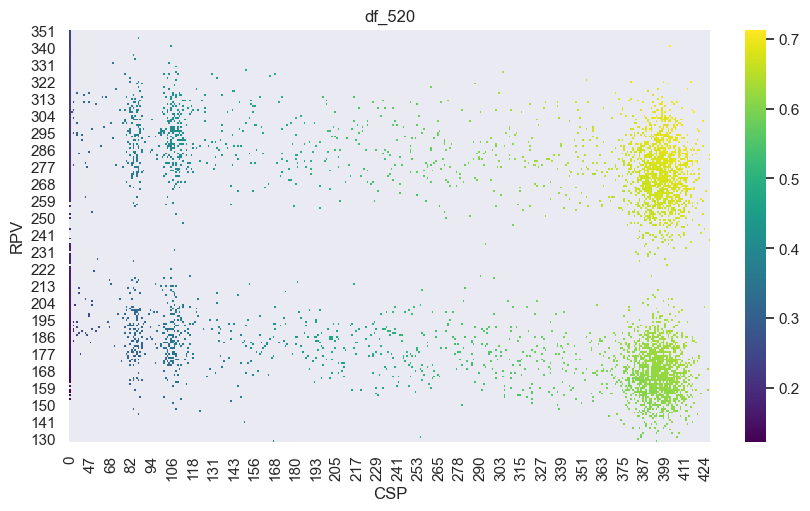

In [123]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
df_520_data = pd.DataFrame({'CSP' : df_520['#-hh-csp'], 'RPV' : df_520['#-hh-rpv'], 'KPI' :  df_520['Accessibility']}) 
df_520_wide = df_520_data.pivot_table(index = 'RPV', columns = 'CSP', values = 'KPI')

fig, axes =  plt.subplots(1 , figsize=(8,5), sharey=True, sharex = True, layout= 'constrained')
sns.heatmap(df_520_wide, cmap='viridis')
axes.set_title('df_520')

axes.invert_yaxis()

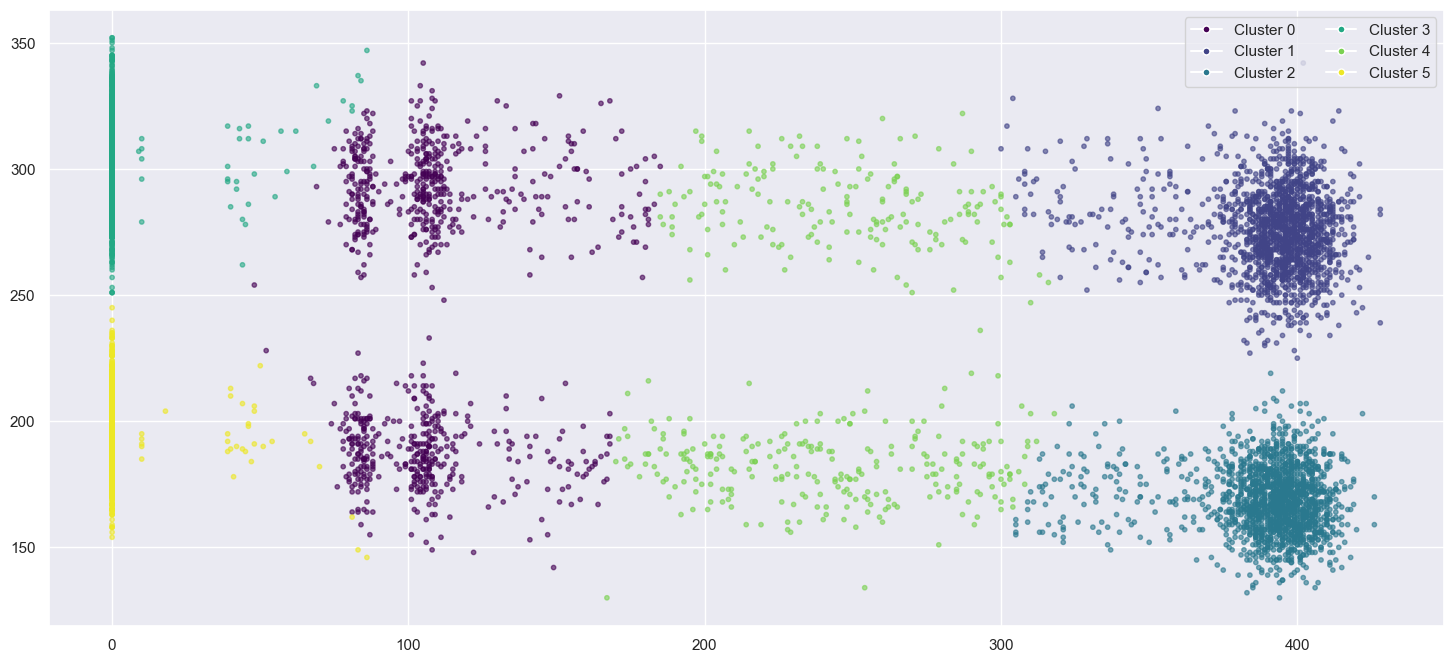

In [124]:
#create clusters based on csp and rpv as test
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
df_520['cluster'] = kmeans.fit_predict(df_520[['#-hh-csp', '#-hh-rpv']])

colors = ['#440154FF', '#414487FF', '#2A788EFF', '#22A884FF','#7AD151FF','#EDE725FF']
df_520['c'] = df_520['cluster'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4] , 5:colors[5]})

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df_520['cen_x'] = df_520['cluster'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_520['cen_y'] = df_520['cluster'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(18,8))
# plot data


plt.scatter(df_520['#-hh-csp'], df_520['#-hh-rpv'], c=df_520['c'], alpha = 0.6, s=10)

# create a list of legend elements
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

#cent_leg = [Line2D([0], [0], marker='^', color='w', label=f'Centroid {i}', 
            #markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# plot legend
#legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol =2)




Text(0.5, 0, 'kpi1')

Text(0, 0.5, 'kpi6')

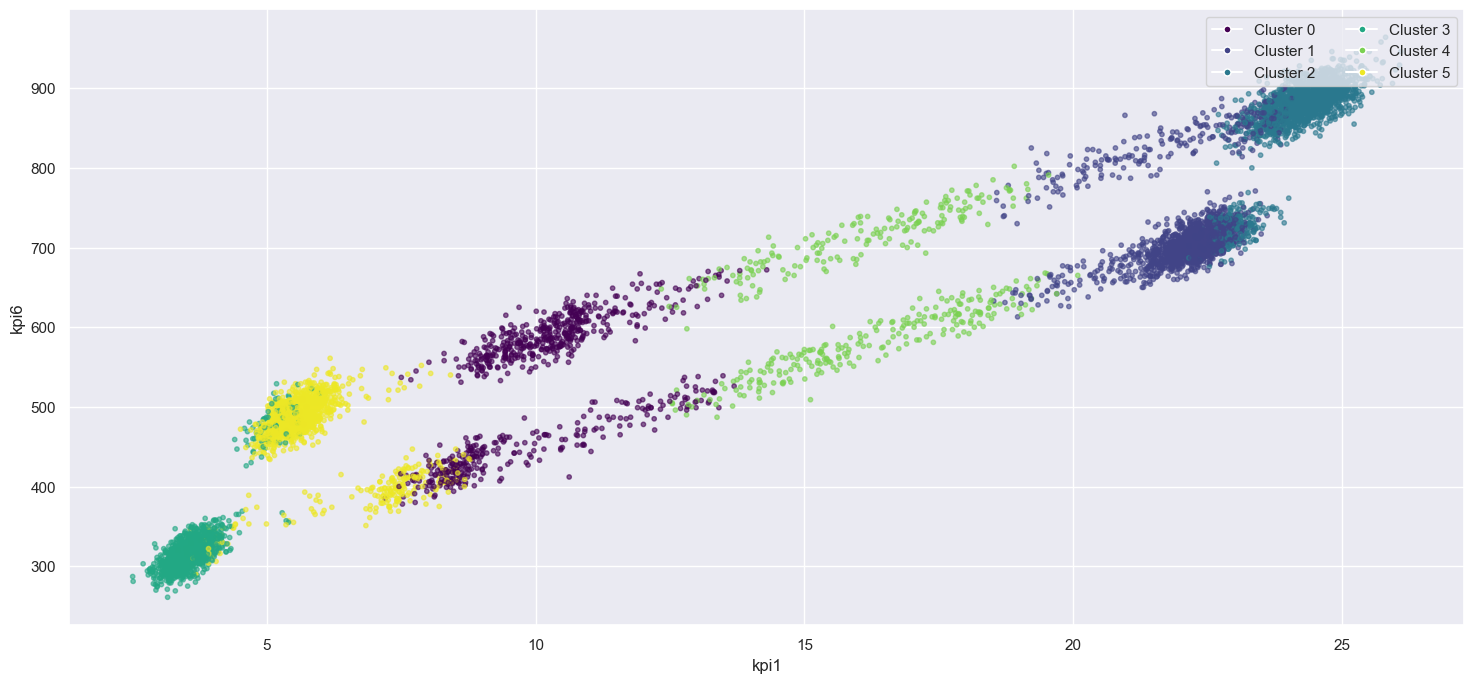

In [126]:
#make clusters based on kp performance
kmeans = KMeans(n_clusters=6, random_state=0)
df_520['cluster_kpi'] = kmeans.fit_predict(df_520[['Availability', 'Affordability', 'Accessibility', 'Acceptability', 'Ability', 'Appeal']])

colors_kpi = ['#440154FF', '#414487FF', '#2A788EFF', '#22A884FF','#7AD151FF','#EDE725FF']
df_520['c_kpi'] = df_520['cluster_kpi'].map({0:colors_kpi[0], 1:colors_kpi[1], 2:colors_kpi[2], 
                                             3:colors_kpi[3], 4:colors_kpi[4] , 5:colors_kpi[5]})

# get centroids
# centroids = kmeans.cluster_centers_
# cen_x = [i[0] for i in centroids] 
# cen_y = [i[1] for i in centroids]
# ## add to df
# df_520['cen_x'] = df_520['cluster'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
# df_520['cen_y'] = df_520['cluster'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(18,8))
# plot data


plt.scatter(df_520['Availability'], df_520['Appeal'], c=df_520['c_kpi'], alpha = 0.6, s=10)

# create a list of legend elements
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors_kpi)]

#cent_leg = [Line2D([0], [0], marker='^', color='w', label=f'Centroid {i}', 
            #markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# plot legend
#legend_elements.extend(cent_leg)
ax.set_xlabel('kpi1')
ax.set_ylabel('kpi6')
plt.legend(handles=legend_elements, loc='upper right', ncol =2)


Text(0.5, 0, 'csp')

Text(0, 0.5, 'rpv')

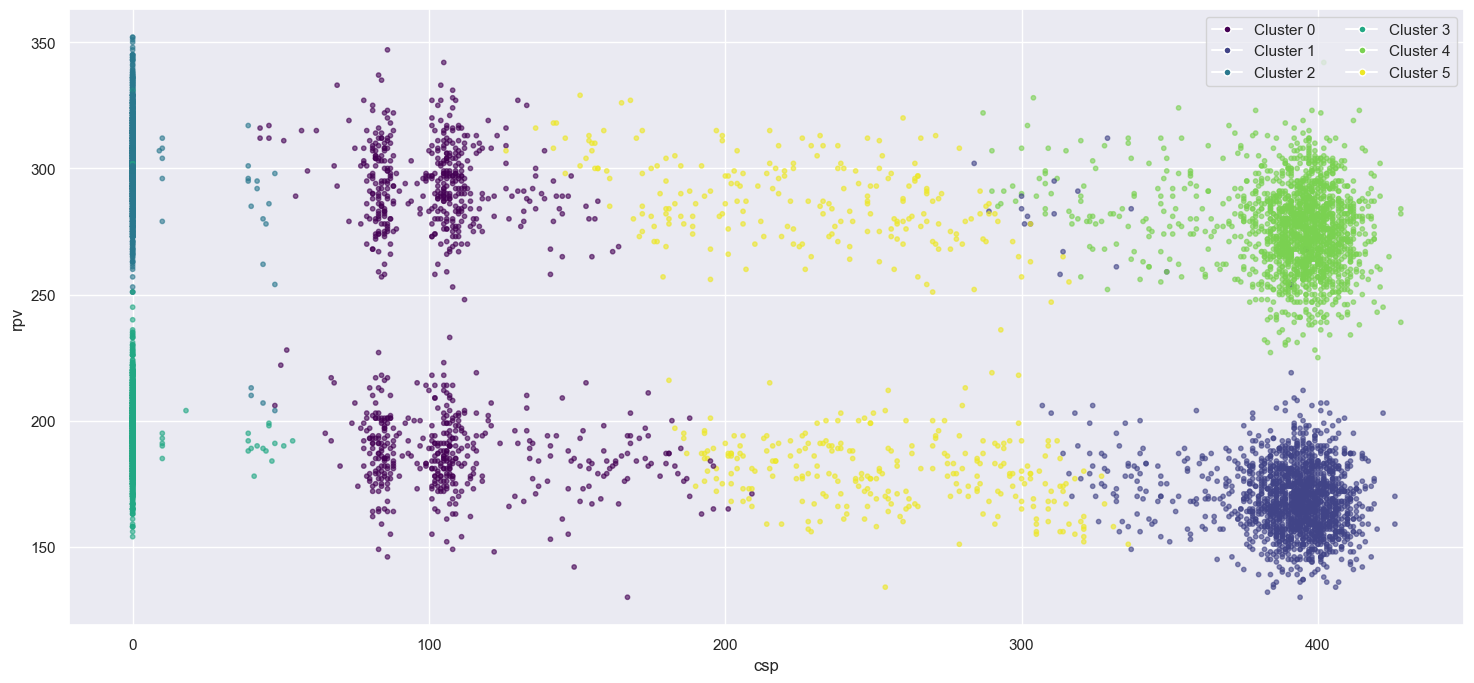

In [127]:
# create clusters based on scaled kpi results
kmeans = KMeans(n_clusters=6, random_state=0)
df_520['cluster_kpi_sc'] = kmeans.fit_predict(df_520[['kpi1_sc', 'kpi2_sc', 'kpi3_sc', 'kpi4_sc', 'kpi5_sc', 'kpi6_sc']])

colors_kpi_sc = ['#440154FF', '#414487FF', '#2A788EFF', '#22A884FF','#7AD151FF','#EDE725FF']
df_520['c_kpi_sc'] = df_520['cluster_kpi_sc'].map({0:colors_kpi_sc[0], 1:colors_kpi_sc[1], 2:colors_kpi_sc[2], 
                                             3:colors_kpi_sc[3], 4:colors_kpi_sc[4] , 5:colors_kpi_sc[5]})

fig, ax = plt.subplots(1, figsize=(18,8))
# plot data

plt.scatter(df_520['#-hh-csp'], df_520['#-hh-rpv'], c=df_520['c_kpi_sc'], alpha = 0.6, s=10)

# create a list of legend elements
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors_kpi_sc)]

#cent_leg = [Line2D([0], [0], marker='^', color='w', label=f'Centroid {i}', 
            #markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# plot legend
#legend_elements.extend(cent_leg)
ax.set_xlabel('csp')
ax.set_ylabel('rpv')
plt.legend(handles=legend_elements, loc='upper right', ncol =2)

In [128]:
df_520.loc[df_520['cluster_kpi']==1]

index  [run number] region  #-developers  #-households  \
2401     3069             1  ConEd             0          2000   
2413     9231            14  ConEd             0          2000   
2414     9240            15  ConEd             0          2000   
2416     9499            17  ConEd             0          2000   
2419    12230            21  ConEd             0          2000   
...       ...           ...    ...           ...           ...   
7189  1246474          2391  ConEd             0          2000   
7192  1248702          2394  ConEd             0          2000   
7194  1249288          2395  ConEd             0          2000   
7198  1250375          2399  ConEd             0          2000   
7199  1250399          2400  ConEd             0          2000   

      MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
2401                   150                   120            True      True   
2413                   150                   120            True      True   
2414                   150                   120            True      True   
2416                   150                   120            True      True   
2419                   150                   120            True      True   
...                    ...                   ...             ...       ...   
7189                   150                   120           False      True   
7192                   150                   120           False      True   
7194                   150                   120           False      True   
7198                   150                   120           False      True   
7199                   150                   120           False      True   

      VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
2401          0.6            0.33   520     90026.170937         0.000000   
2413          0.6            0.33   520     89822.220096         0.000000   
2414          0.6            0.33   520     90548.790042      9195.269776   
2416          0.6            0.33   520     90426.728674         0.000000   
2419          0.6            0.33   520     91508.037225         0.000000   
...           ...             ...   ...              ...              ...   
7189          0.9            1.00   520     92597.313502         0.000000   
7192          0.9            1.00   520     93817.483972         0.000000   
7194          0.9            1.00   520     92869.701739         0.000000   
7198          0.9            1.00   520     92115.393006         0.000000   
7199          0.9            1.00   520     93361.850505         0.000000   

        elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
2401  350988.977411  22381.153846  75522.246743  1.011952e+08       290   
2413  349255.379820  23377.961538  77218.111572  1.008401e+08       292   
2414  348771.230234  22174.269231  80602.091234  1.008199e+08       288   
2416  346774.798282  21910.961538  81989.568514  1.003259e+08       260   
2419  346602.974459  19334.307692  85006.303001  1.003574e+08       258   
...             ...           ...           ...           ...       ...   
7189  348108.898885  13221.807692  87215.302950  1.005879e+08       167   
7192  353499.033826  11754.807692  85648.697012  1.019368e+08       159   
7194  348493.235249  12450.692308  87282.599803  1.006653e+08       164   
7198  347578.989517  14500.730769  86834.638126  1.004761e+08       185   
7199  350371.955110  12657.576923  87866.219201  1.012192e+08       170   

      #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
2401       338           0      498          399  0.014327   -0.012735   
2413       346           0      494          412  0.007446   -0.013417   
2414       370           0      517          408 -0.014828   -0.009192   
2416       367           0      488          356 -0.016593   -0.005179   
2419       386           0      484          381 -0.008240    0.008644   
...     

In [129]:
df_520.loc[df_520['cluster_kpi']==5 ]

index  [run number] region  #-developers  #-households  \
0        2992             6  ConEd             0          2000   
1        3011             1  ConEd             0          2000   
2        3054             4  ConEd             0          2000   
3        3136             3  ConEd             0          2000   
5        3299             5  ConEd             0          2000   
...       ...           ...    ...           ...           ...   
7167  1234477          2368  ConEd             0          2000   
7169  1236473          2370  ConEd             0          2000   
7180  1242518          2381  ConEd             0          2000   
7190  1246582          2390  ConEd             0          2000   
7195  1249650          2396  ConEd             0          2000   

      MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                      150                   120            True     False   
1                      150                   120            True     False   
2                      150                   120            True     False   
3                      150                   120            True     False   
5                      150                   120            True     False   
...                    ...                   ...             ...       ...   
7167                   150                   120           False      True   
7169                   150                   120           False      True   
7180                   150                   120           False      True   
7190                   150                   120           False      True   
7195                   150                   120           False      True   

      VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0             0.6            0.33   520     90610.118050         0.000000   
1             0.6            0.33   520     90869.588390         0.000000   
2             0.6            0.33   520     90197.350955         0.000000   
3             0.6            0.33   520     91470.917104      1619.156858   
5             0.6            0.33   520     90192.604542         0.000000   
...           ...             ...   ...              ...              ...   
7167          0.9            1.00   520     93866.131943         0.000000   
7169          0.9            1.00   520     93533.436878      4454.994879   
7180          0.9            1.00   520     93780.914506         0.000000   
7190          0.9            1.00   520     93202.715560         0.000000   
7195          0.9            1.00   520     92720.743805         0.000000   

        elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0     424425.896171  25860.576923      0.000000  1.179353e+08       324   
1     424353.047760  24261.923077      0.000000  1.178497e+08       293   
2     423075.665183  26500.038462      0.000000  1.175897e+08       314   
3     425864.291535  22738.500000      0.000000  1.182034e+08       282   
5     422000.125221  25390.384615      0.000000  1.172745e+08       308   
...             ...           ...           ...           ...       ...   
7167  414474.462646  16437.923077  23342.991468  1.159291e+08       201   
7169  417954.002922  15873.692308  17199.639387  1.165692e+08       201   
7180  423548.845374  13917.692308  10037.382040  1.176859e+08       184   
7190  423967.096097  17133.807692   9860.121507  1.179685e+08       199   
7195  421516.899248  15196.615385   8457.342358  1.171030e+08       188   

      #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0            0           0      501          435  0.032913   -0.033577   
1            0           0      483          389 -0.022322   -0.040673   
2            0           0      503          425  0.047924   -0.036961   
3            0           0      457          387  0.031183   -0.003792   
5            0           0      498          406 -0.028123   -0.030581   
...     

In [130]:
df_520.columns

Index(['index', '[run number]', 'region', '#-developers', '#-households',
       'MW-block-init-kW-res', 'MW-block-init-kW-com', 'e-price-effect',
       'csp-true', 'VDER-effect', 'strategy-intv1', 'tick', 'total-elec-bill',
       'total-proj-cost', 'elect-usage', 'prod-hh', 'csp-prod', 'emissions-hh',
       '#-hh-rpv', '#-hh-csp', 'able-to-cs', 'pos-npv', 'pos-savings',
       'avg-age', 'avg-income', 'avg-education', 'avg-savings', 'developers',
       'estimated profit developers', 'intv1_True', 'intv2_True', 'intv3_True',
       'Availability', 'Affordability', 'Accessibility', 'Acceptability',
       'Ability', 'Appeal', 'kpi1_sc', 'kpi2_sc', 'kpi3_sc', 'kpi4_sc',
       'kpi5_sc', 'kpi6_sc', 'cluster', 'c', 'cen_x', 'cen_y', 'cluster_kpi',
       'c_kpi', 'cluster_kpi_sc', 'c_kpi_sc'],
      dtype='object')

In [131]:
number_list_clusters = [0,1,2,3,4,5]
names_df_clusters = ['Cluster','kpi','mean']
df_kpi_clusters =pd.DataFrame(columns = names_df_clusters)

for i in number_list_clusters:
    for a in (kpi_list):
        x = df_520.loc[df_520['cluster_kpi']== i ]
        y = format(x[a].mean(), '3g')
        df_kpis = pd.DataFrame([{'Cluster': i, 'kpi': a, 'mean':y}])
        df_kpi_clusters = pd.concat([df_kpi_clusters, df_kpis], ignore_index=True)
df_kpi_clusters

Cluster            kpi      mean
0        0   Availability    10.101
1        0  Affordability   46.3349
2        0  Accessibility  0.393542
3        0  Acceptability   56591.9
4        0        Ability   548.493
..     ...            ...       ...
31       5  Affordability   46.0251
32       5  Accessibility  0.227051
33       5  Acceptability   58766.9
34       5        Ability   436.647
35       5         Appeal   472.795

[36 rows x 3 columns]

In [132]:
n_in_cluster = dict(df_520['cluster'].value_counts())
n_in_cluster

{2: 1720, 1: 1718, 3: 1237, 5: 1231, 0: 852, 4: 442}

In [133]:
n_in_cluster_kpi = dict(df_520['cluster_kpi'].value_counts())
n_in_cluster_kpi

{1: 1717, 2: 1711, 5: 1339, 3: 1265, 0: 743, 4: 425}

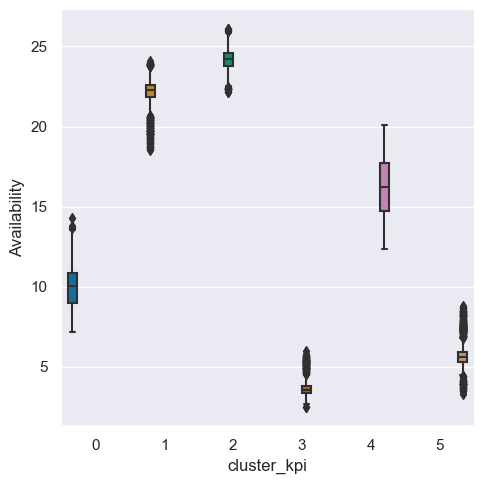

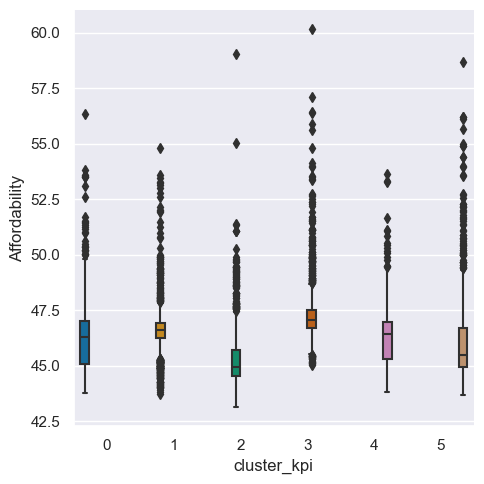

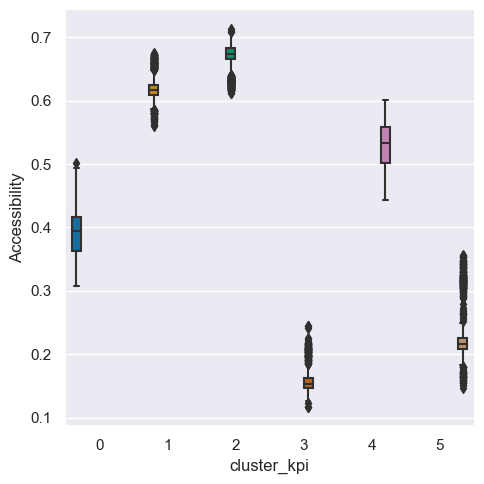

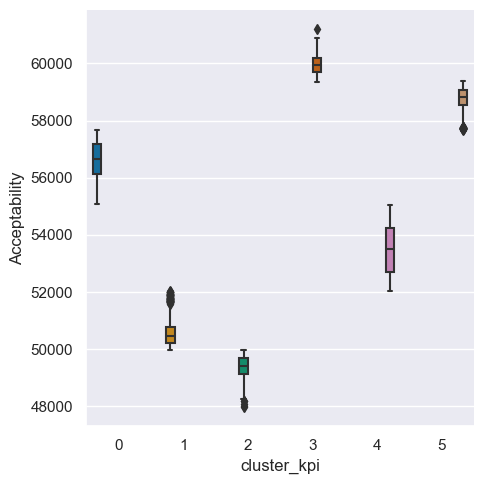

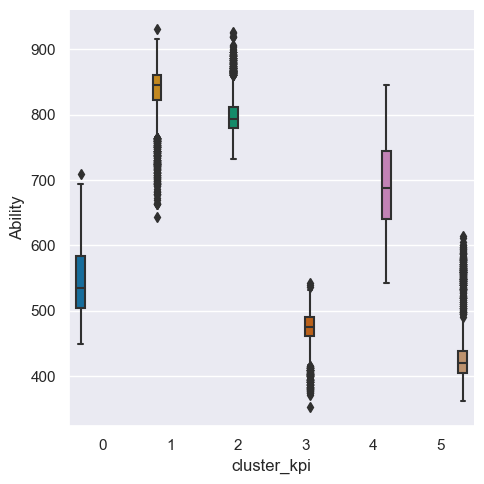

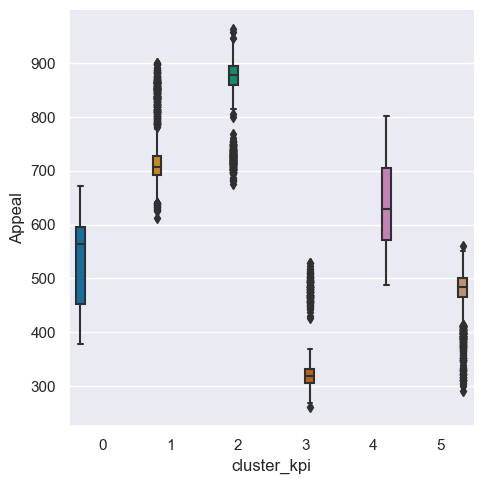

In [134]:
for i in kpi_list:
    sns.catplot(kind='box', data=df_520, y=i, x='cluster_kpi', hue='cluster_kpi', palette="colorblind", sharey=False)
    plt.tight_layout()
    plt.show()

Text(0.5, 0, 'avg-income')

Text(0, 0.5, 'avg-education')

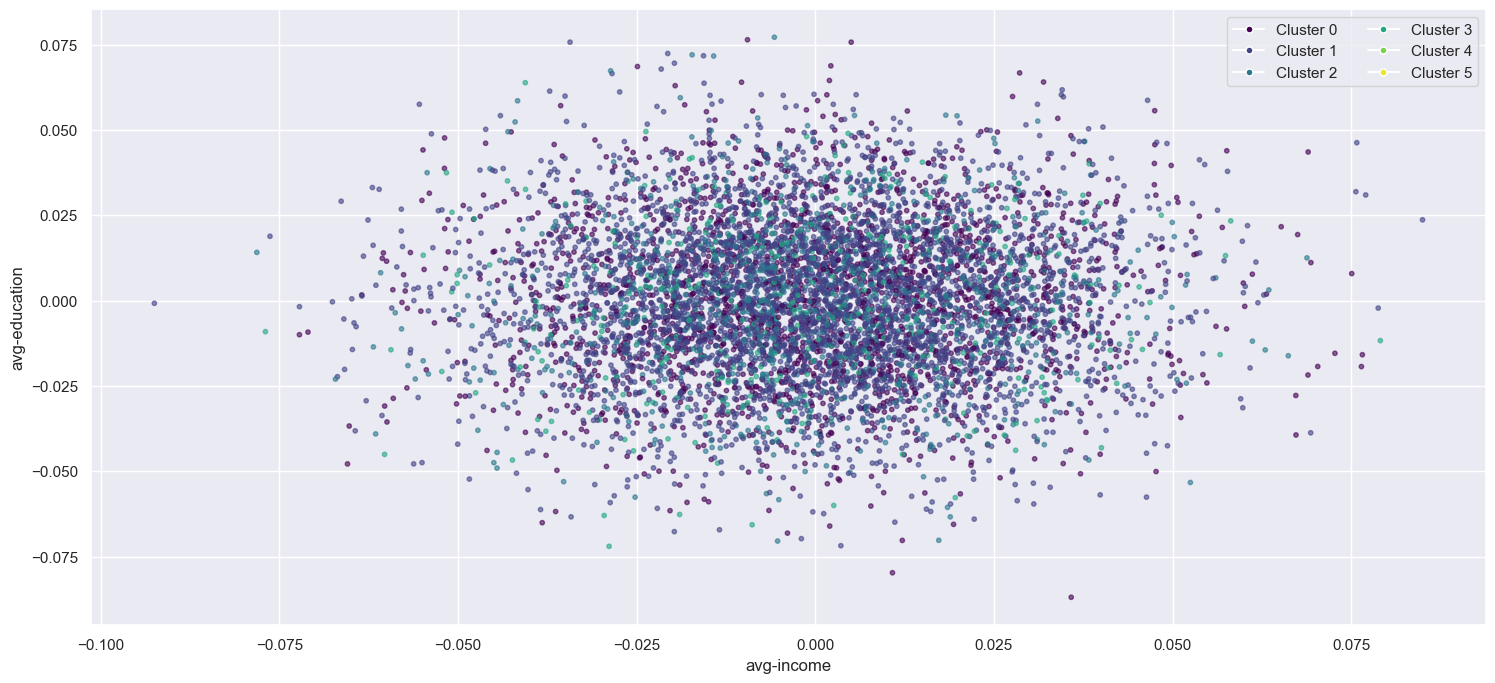

In [135]:
#make clusters based on kp performance
kmeans = KMeans(n_clusters=4, random_state=0)
df_520['cluster_kpi_1234'] = kmeans.fit_predict(df_520[['Availability', 'Affordability', 'Accessibility', 'Acceptability']])

colors_kpi_1234 = ['#440154FF', '#414487FF', '#2A788EFF', '#22A884FF','#7AD151FF','#EDE725FF']
df_520['c_kpi_1234'] = df_520['cluster_kpi_1234'].map({0:colors_kpi[0], 1:colors_kpi[1], 2:colors_kpi[2], 
                                             3:colors_kpi[3], 4:colors_kpi[4] , 5:colors_kpi[5]})

# get centroids
# centroids = kmeans.cluster_centers_
# cen_x = [i[0] for i in centroids] 
# cen_y = [i[1] for i in centroids]
# ## add to df
# df_520['cen_x'] = df_520['cluster'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
# df_520['cen_y'] = df_520['cluster'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(18,8))
# plot data


plt.scatter(df_520['avg-income'], df_520['avg-education'], c=df_520['c_kpi_1234'], alpha = 0.6, s=10)

# create a list of legend elements
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors_kpi_1234)]

#cent_leg = [Line2D([0], [0], marker='^', color='w', label=f'Centroid {i}', 
            #markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# plot legend
#legend_elements.extend(cent_leg)
ax.set_xlabel('avg-income')
ax.set_ylabel('avg-education')
plt.legend(handles=legend_elements, loc='upper right', ncol =2)



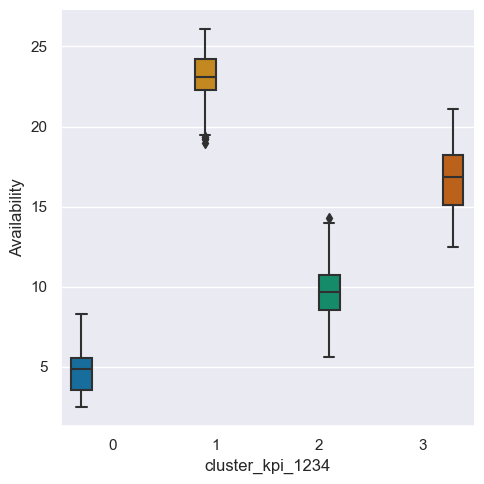

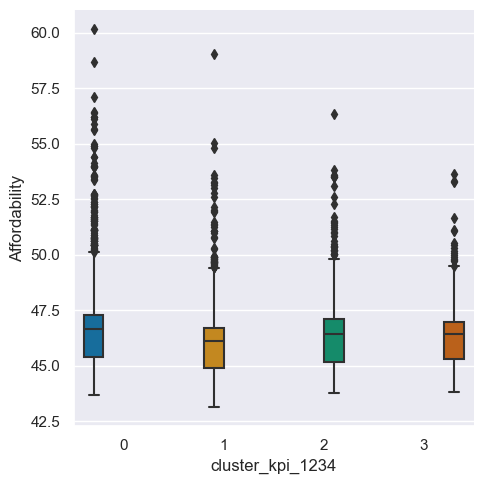

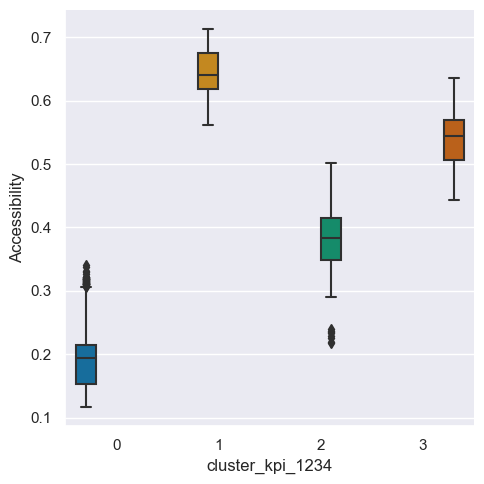

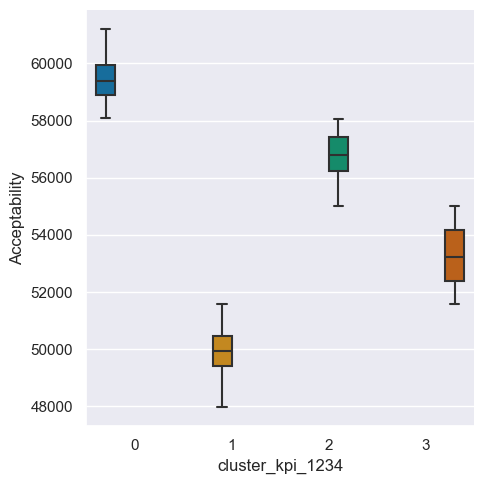

In [136]:
kpi_list_1234 = ['Availability','Affordability','Accessibility','Acceptability']
for i in kpi_list_1234:
    sns.catplot(kind='box', data=df_520, y=i, x='cluster_kpi_1234', hue='cluster_kpi_1234', palette="colorblind", sharey=False)
    plt.tight_layout()
    plt.show()

Text(0.5, 0, 'csp')

Text(0, 0.5, 'rpv')

Text(0.5, 1.0, 'Cluster of Availability')

Text(0.5, 0, 'csp')

Text(0, 0.5, 'rpv')

Text(0.5, 1.0, 'Cluster of Affordability')

Text(0.5, 0, 'csp')

Text(0, 0.5, 'rpv')

Text(0.5, 1.0, 'Cluster of Accessibility')

Text(0.5, 0, 'csp')

Text(0, 0.5, 'rpv')

Text(0.5, 1.0, 'Cluster of Acceptability')

Text(0.5, 0, 'csp')

Text(0, 0.5, 'rpv')

Text(0.5, 1.0, 'Cluster of Ability')

Text(0.5, 0, 'csp')

Text(0, 0.5, 'rpv')

Text(0.5, 1.0, 'Cluster of Appeal')

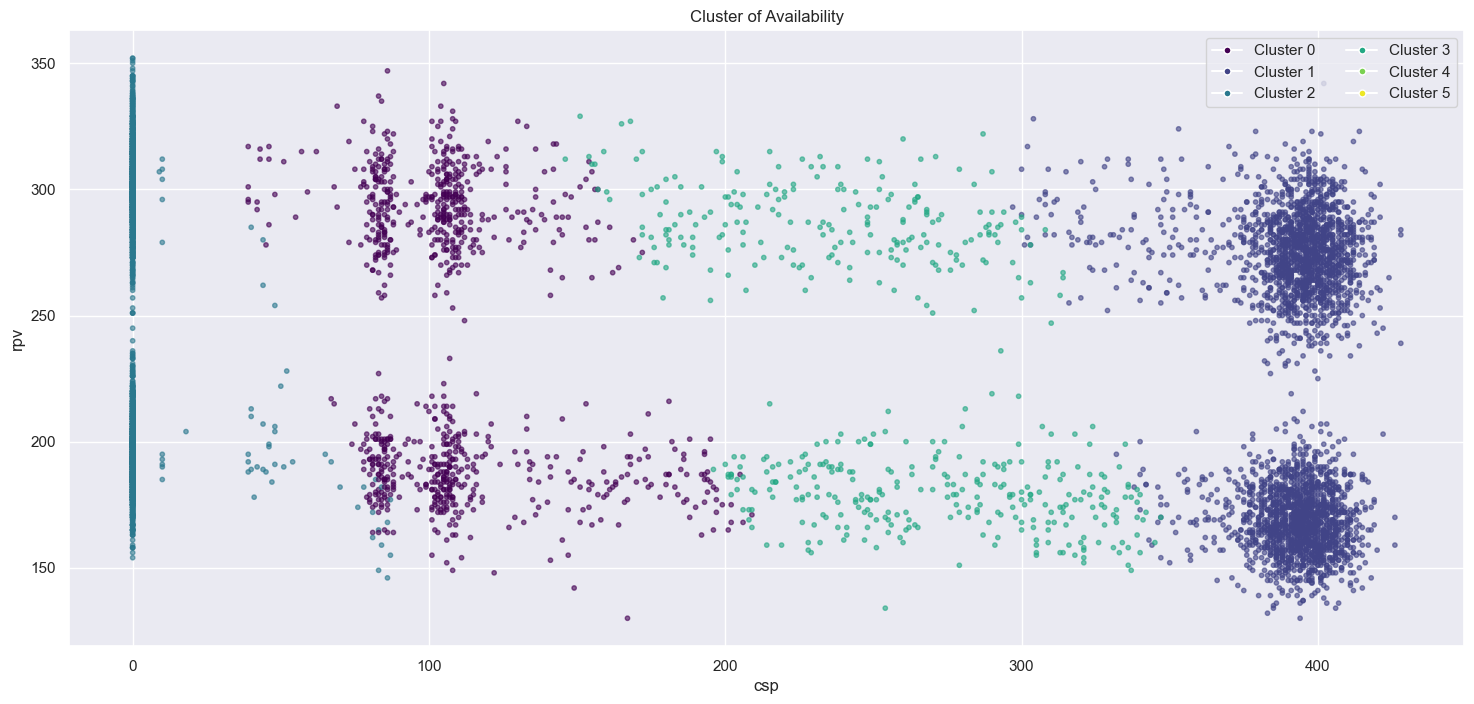

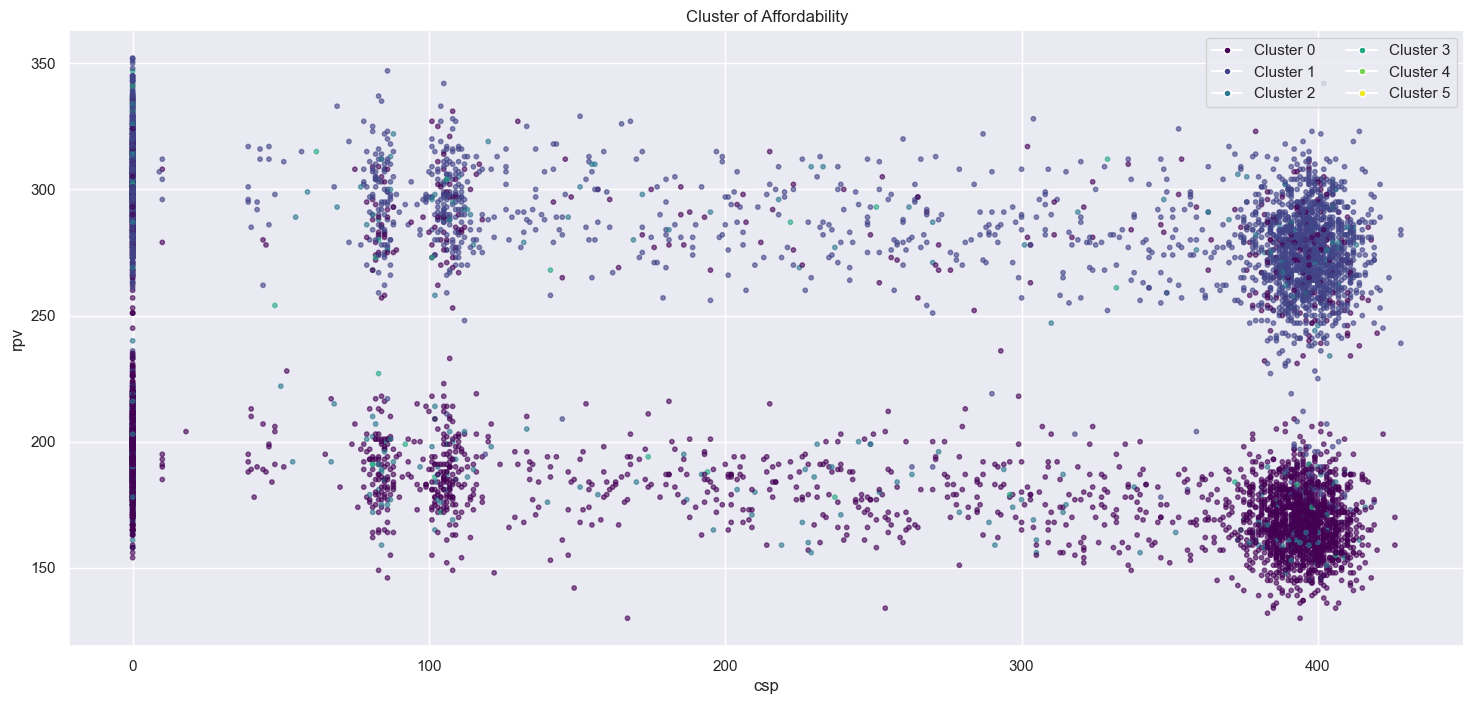

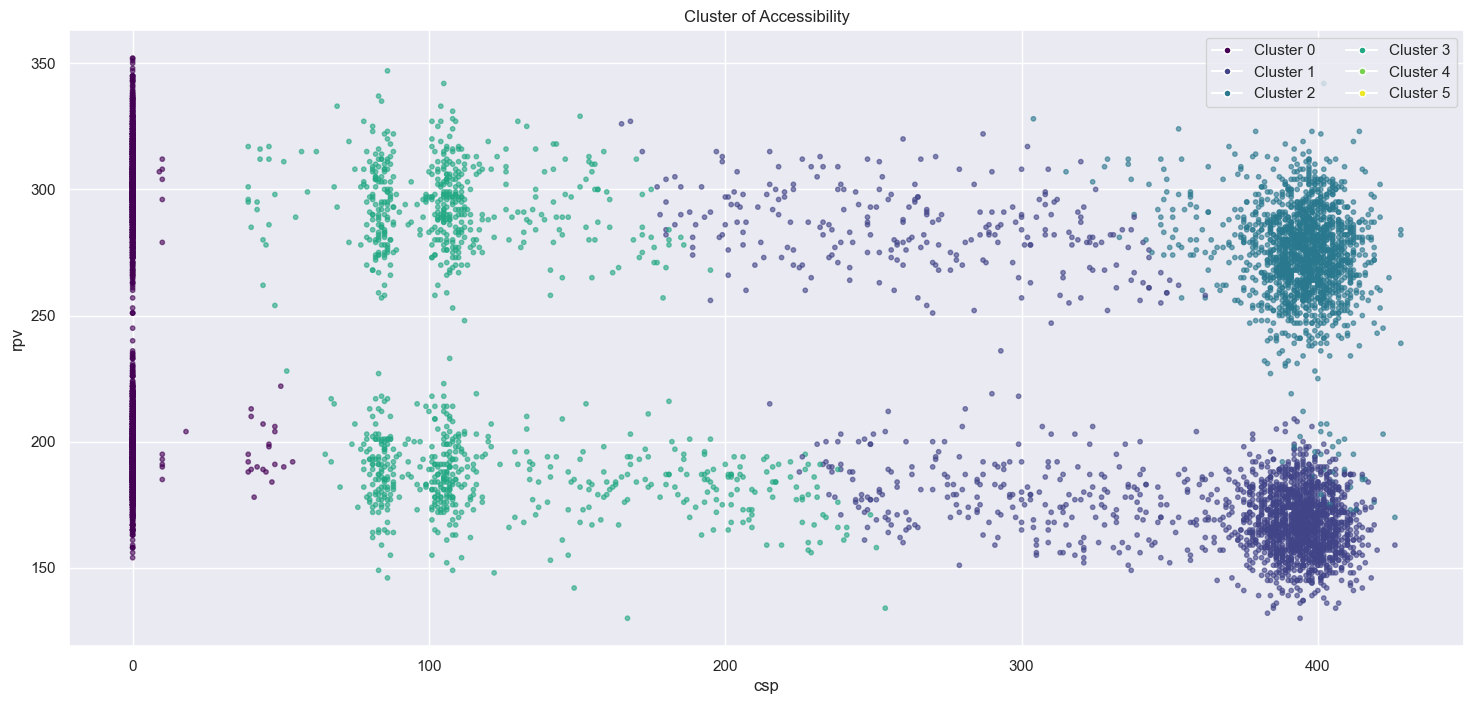

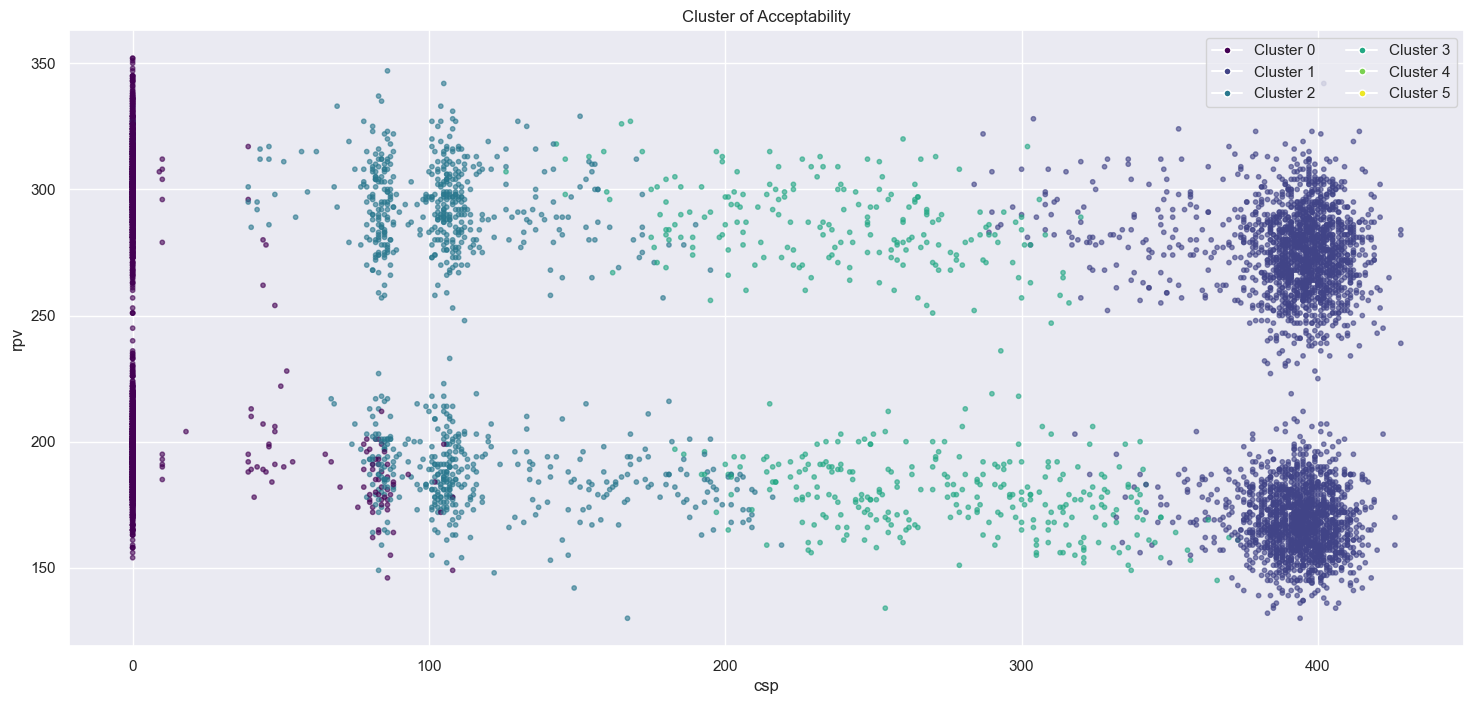

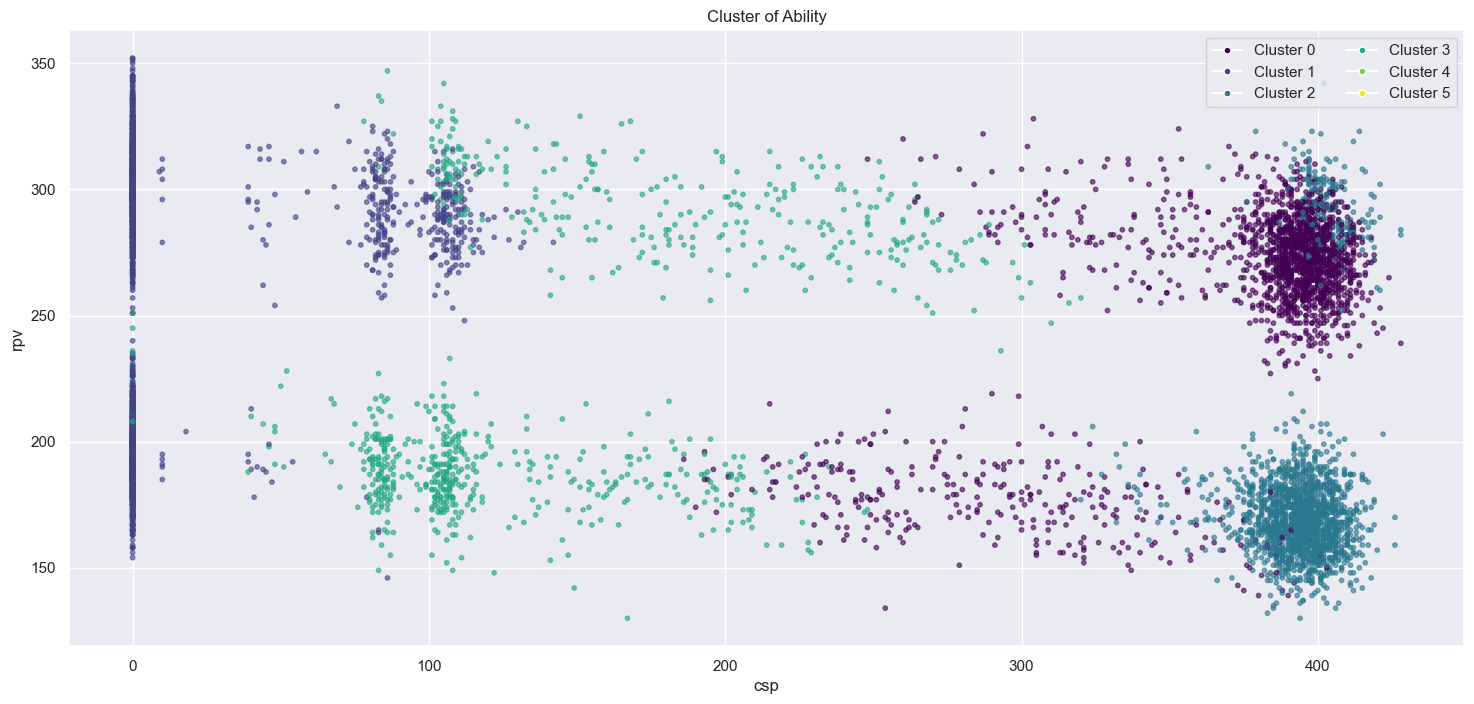

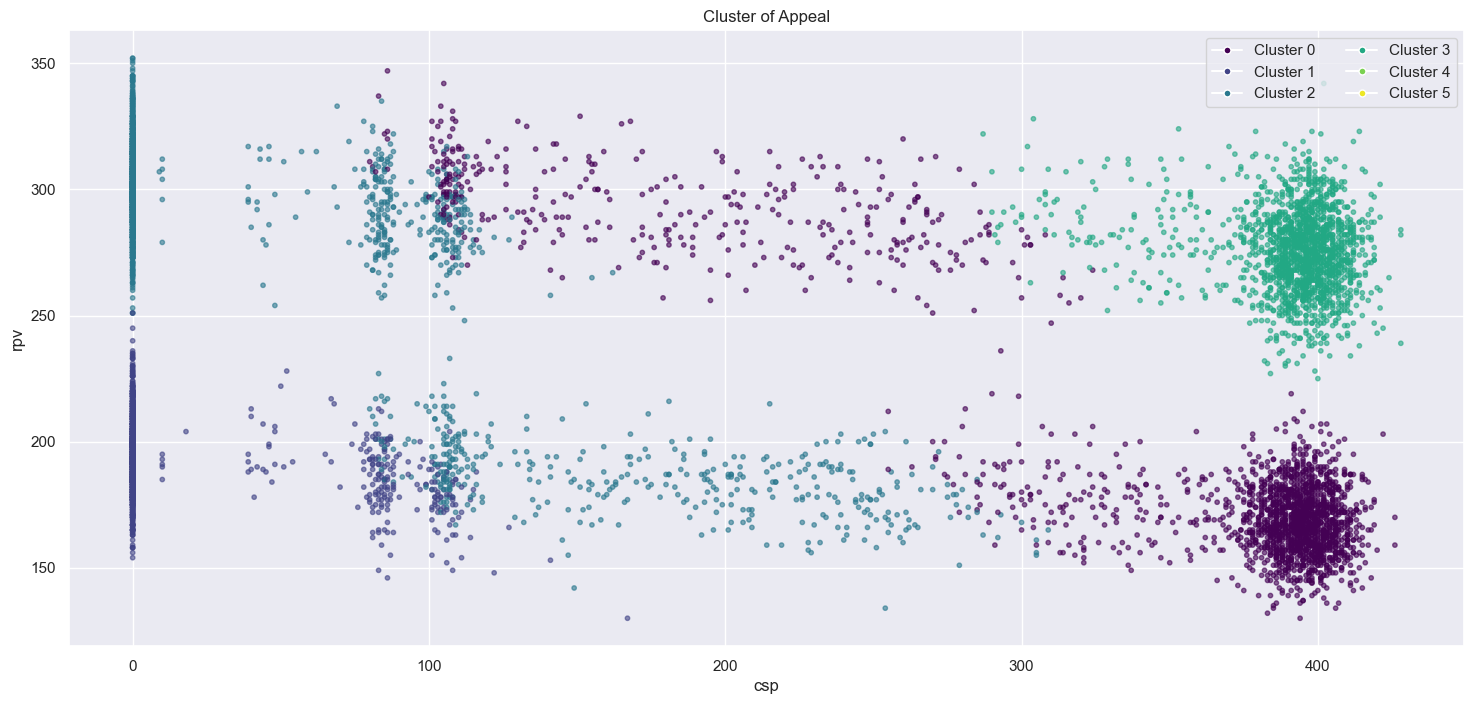

In [137]:
for i in kpi_list:
    #make clusters based on kp performance
    kmeans = KMeans(n_clusters=4, random_state=0)
    df_520[f'cluster_kpi_{i}'] = kmeans.fit_predict(df_520[[i]])

    colors_kpi_1234 = ['#440154FF', '#414487FF', '#2A788EFF', '#22A884FF','#7AD151FF','#EDE725FF']
    df_520[f'c_kpi_{i}'] = df_520[f'cluster_kpi_{i}'].map({0:colors_kpi[0], 1:colors_kpi[1], 2:colors_kpi[2], 
                                             3:colors_kpi[3], 4:colors_kpi[4] , 5:colors_kpi[5]})

    # get centroids
    # centroids = kmeans.cluster_centers_
    # cen_x = [i[0] for i in centroids] 
    # cen_y = [i[1] for i in centroids]
    # ## add to df
    # df_520['cen_x'] = df_520['cluster'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    # df_520['cen_y'] = df_520['cluster'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(1, figsize=(18,8))
    # plot data


    plt.scatter(df_520['#-hh-csp'], df_520['#-hh-rpv'], c=df_520[f'c_kpi_{i}'], alpha = 0.6, s=10)

    # create a list of legend elements
    ## markers / records
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors_kpi_1234)]

    #cent_leg = [Line2D([0], [0], marker='^', color='w', label=f'Centroid {i}', 
            #markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
    # plot legend
    #legend_elements.extend(cent_leg)
    ax.set_xlabel('csp')
    ax.set_ylabel('rpv')
    plt.title(f'Cluster of {i}')
    plt.legend(handles=legend_elements, loc='upper right', ncol =2)




In [138]:
df_520

index  [run number] region  #-developers  #-households  \
0        2992             6  ConEd             0          2000   
1        3011             1  ConEd             0          2000   
2        3054             4  ConEd             0          2000   
3        3136             3  ConEd             0          2000   
4        3200             2  ConEd             0          2000   
...       ...           ...    ...           ...           ...   
7195  1249650          2396  ConEd             0          2000   
7196  1249674          2397  ConEd             0          2000   
7197  1249678          2398  ConEd             0          2000   
7198  1250375          2399  ConEd             0          2000   
7199  1250399          2400  ConEd             0          2000   

      MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
0                      150                   120            True     False   
1                      150                   120            True     False   
2                      150                   120            True     False   
3                      150                   120            True     False   
4                      150                   120            True     False   
...                    ...                   ...             ...       ...   
7195                   150                   120           False      True   
7196                   150                   120           False      True   
7197                   150                   120           False      True   
7198                   150                   120           False      True   
7199                   150                   120           False      True   

      VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
0             0.6            0.33   520     90610.118050         0.000000   
1             0.6            0.33   520     90869.588390         0.000000   
2             0.6            0.33   520     90197.350955         0.000000   
3             0.6            0.33   520     91470.917104      1619.156858   
4             0.6            0.33   520     92085.682224         0.000000   
...           ...             ...   ...              ...              ...   
7195          0.9            1.00   520     92720.743805         0.000000   
7196          0.9            1.00   520     94063.557542         0.000000   
7197          0.9            1.00   520     93407.869624         0.000000   
7198          0.9            1.00   520     92115.393006         0.000000   
7199          0.9            1.00   520     93361.850505         0.000000   

        elect-usage       prod-hh      csp-prod  emissions-hh  #-hh-rpv  \
0     424425.896171  25860.576923      0.000000  1.179353e+08       324   
1     424353.047760  24261.923077      0.000000  1.178497e+08       293   
2     423075.665183  26500.038462      0.000000  1.175897e+08       314   
3     425864.291535  22738.500000      0.000000  1.182034e+08       282   
4     429130.227304  23415.576923      0.000000  1.191305e+08       291   
...             ...           ...           ...           ...       ...   
7195  421516.899248  15196.615385   8457.342358  1.171030e+08       188   
7196  407789.417586  13842.461538  28866.266802  1.142469e+08       168   
7197  411081.774640  14858.076923  23084.133608  1.149176e+08       189   
7198  347578.989517  14500.730769  86834.638126  1.004761e+08       185   
7199  350371.955110  12657.576923  87866.219201  1.012192e+08       170   

      #-hh-csp  able-to-cs  pos-npv  pos-savings   avg-age  avg-income  \
0            0           0      501          435  0.032913   -0.033577   
1            0           0      483          389 -0.022322   -0.040673   
2            0           0      503          425  0.047924   -0.036961   
3            0           0      457          387  0.031183   -0.003792   
4            0           0      482          410 -0.022520   -0.004873   
...     

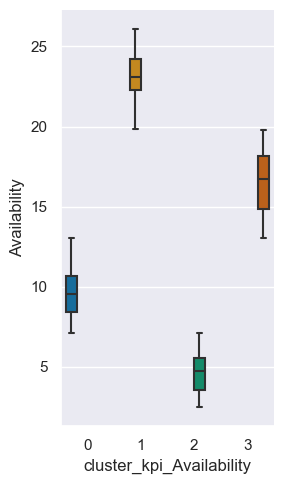

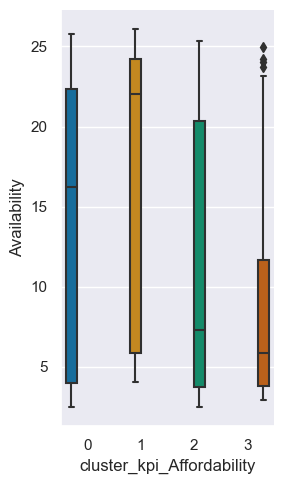

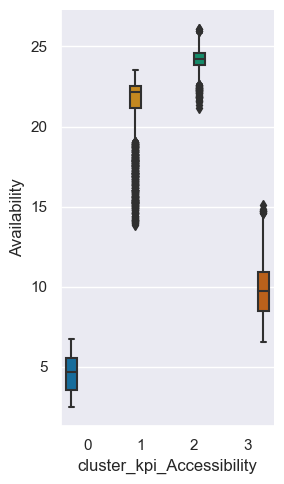

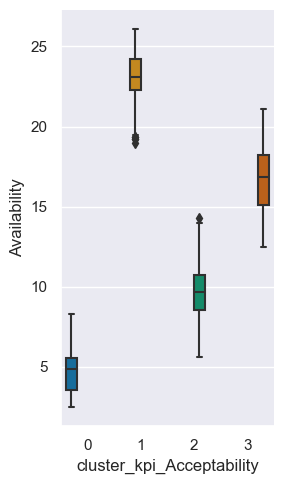

ValueError: Could not interpret input 'cluster_kpi_Affordability 2nd'

In [139]:
cluster_kpi_list = ['cluster_kpi_Availability','cluster_kpi_Affordability','cluster_kpi_Accessibility','cluster_kpi_Acceptability','cluster_kpi_Affordability 2nd','cluster_kpi_Acceptability 2nd']
for a in kpi_list:
    for i in cluster_kpi_list:
        sns.catplot(kind='box', data=df_520, y=a, x=i, hue=i, palette="colorblind", sharey=False, aspect = .6)
        plt.tight_layout()
        plt.show()

In [140]:
#https://datatofish.com/multiple-linear-regression-python/
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from PIL import Image, ImageDraw, ImageFont

for i in kpi_list:
    x = df[['intv1_True','intv2_True', 'intv3_True']]
    y = df[i]

    x = sm.add_constant(x) # adding a constant
 
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 
    plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 8}, fontproperties = 'monospace') # approach improved by OP -> monospace!
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'output{i}.png')
    plt.close()

Text(0.01, 0.05, '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:           Availability   R-squared:                       0.058\nModel:                            OLS   Adj. R-squared:                  0.058\nMethod:                 Least Squares   F-statistic:                 7.740e+04\nDate:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00\nTime:                        15:09:35   Log-Likelihood:            -1.2136e+07\nNo. Observations:             3751200   AIC:                         2.427e+07\nDf Residuals:                 3751196   BIC:                         2.427e+07\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef 

(0.0, 1.0, 0.0, 1.0)

Text(0.01, 0.05, '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:          Affordability   R-squared:                       0.001\nModel:                            OLS   Adj. R-squared:                  0.001\nMethod:                 Least Squares   F-statistic:                     1664.\nDate:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00\nTime:                        15:09:38   Log-Likelihood:            -1.0185e+07\nNo. Observations:             3751200   AIC:                         2.037e+07\nDf Residuals:                 3751196   BIC:                         2.037e+07\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef 

(0.0, 1.0, 0.0, 1.0)

Text(0.01, 0.05, '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:          Accessibility   R-squared:                       0.080\nModel:                            OLS   Adj. R-squared:                  0.080\nMethod:                 Least Squares   F-statistic:                 1.090e+05\nDate:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00\nTime:                        15:09:41   Log-Likelihood:             1.2893e+06\nNo. Observations:             3751200   AIC:                        -2.579e+06\nDf Residuals:                 3751196   BIC:                        -2.579e+06\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef 

(0.0, 1.0, 0.0, 1.0)

Text(0.01, 0.05, '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:          Acceptability   R-squared:                       0.057\nModel:                            OLS   Adj. R-squared:                  0.057\nMethod:                 Least Squares   F-statistic:                 7.564e+04\nDate:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00\nTime:                        15:09:45   Log-Likelihood:            -3.5552e+07\nNo. Observations:             3751200   AIC:                         7.110e+07\nDf Residuals:                 3751196   BIC:                         7.110e+07\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef 

(0.0, 1.0, 0.0, 1.0)

Text(0.01, 0.05, '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                Ability   R-squared:                       0.044\nModel:                            OLS   Adj. R-squared:                  0.044\nMethod:                 Least Squares   F-statistic:                 5.695e+04\nDate:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00\nTime:                        15:09:48   Log-Likelihood:            -2.4019e+07\nNo. Observations:             3751200   AIC:                         4.804e+07\nDf Residuals:                 3751196   BIC:                         4.804e+07\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef 

(0.0, 1.0, 0.0, 1.0)

Text(0.01, 0.05, '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                 Appeal   R-squared:                       0.038\nModel:                            OLS   Adj. R-squared:                  0.038\nMethod:                 Least Squares   F-statistic:                 5.004e+04\nDate:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00\nTime:                        15:09:52   Log-Likelihood:            -2.4389e+07\nNo. Observations:             3751200   AIC:                         4.878e+07\nDf Residuals:                 3751196   BIC:                         4.878e+07\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef 

(0.0, 1.0, 0.0, 1.0)

In [141]:
for i in kpi_list:
    x = ss3[['intv1_True','intv2_True', 'intv3_True']]
    y = ss3[i]

    x = sm.add_constant(x) # adding a constant
 
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 
 
    print_model = model.summary()
    print(print_model)

/Users/rvdpn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/rvdpn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:           Availability   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 02 Feb 2023   Prob (F-statistic):                nan
Time:                        15:09:53   Log-Likelihood:            -5.0473e+05
No. Observations:              156300   AIC:                         1.009e+06
Df Residuals:                  156299   BIC:                         1.009e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intv1_True          0          0        nan        n

/Users/rvdpn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/rvdpn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/rvdpn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            OLS Regression Results                            
Dep. Variable:          Accessibility   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 02 Feb 2023   Prob (F-statistic):                nan
Time:                        15:09:53   Log-Likelihood:                 65932.
No. Observations:              156300   AIC:                        -1.319e+05
Df Residuals:                  156299   BIC:                        -1.319e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intv1_True          0          0        nan        n

/Users/rvdpn/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [142]:
df_520_ss11 = df_520[(df_520['intv1_True'] == 0 ) & (df_520 ['intv2_True'] == 0)  & (df_520 ['intv3_True'] == 0) & (df_520 ['csp-true'] == False)]

#scenario 1

df_520_ss2 =  df_520[(df_520['intv1_True'] == 1 ) & (df_520 ['intv2_True'] == 0)  & (df_520 ['intv3_True'] == 0) & (df_520 ['csp-true'] == True)]
#scenario 2

df_520_ss3 =  df_520[(df_520['intv1_True'] == 0 ) & (df_520 ['intv2_True'] == 1)  & (df_520 ['intv3_True'] == 0) & (df_520 ['csp-true'] == True)]
#scenario 3 

df_520_ss4 =  df_520[(df_520['intv1_True'] == 0 ) & (df_520 ['intv2_True'] == 0)  & (df_520 ['intv3_True'] == 1) & (df_520 ['csp-true'] == True)]
#combined scenario

df_520_ss5 =  df_520[(df_520['intv1_True'] == 1 ) & (df_520 ['intv2_True'] == True)  & (df_520 ['intv3_True'] == 1) & (df_520 ['csp-true'] == True)]

df_520_list = [df_520_ss11, df_520_ss2, df_520_ss3, df_520_ss4, df_520_ss5]

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

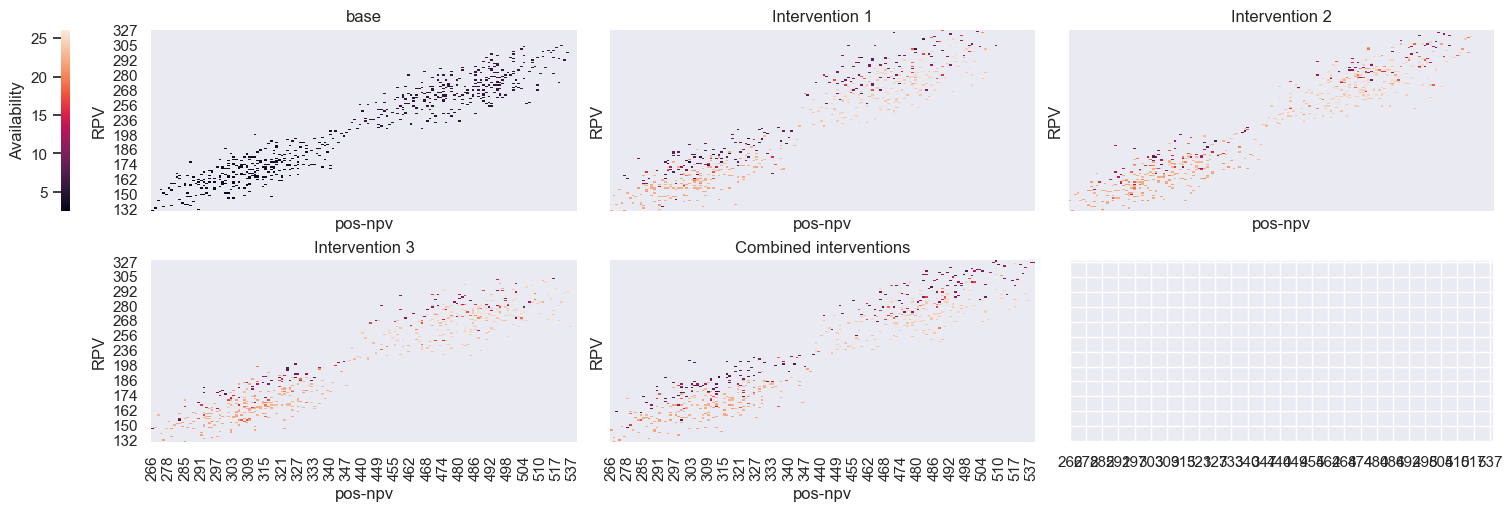

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

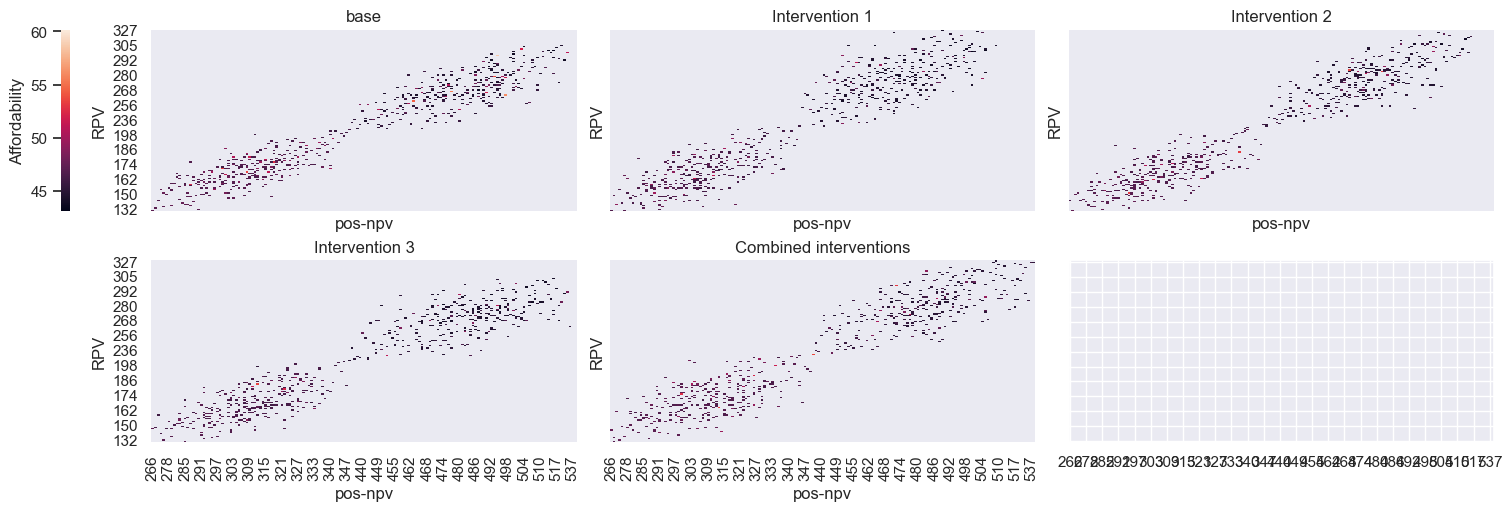

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

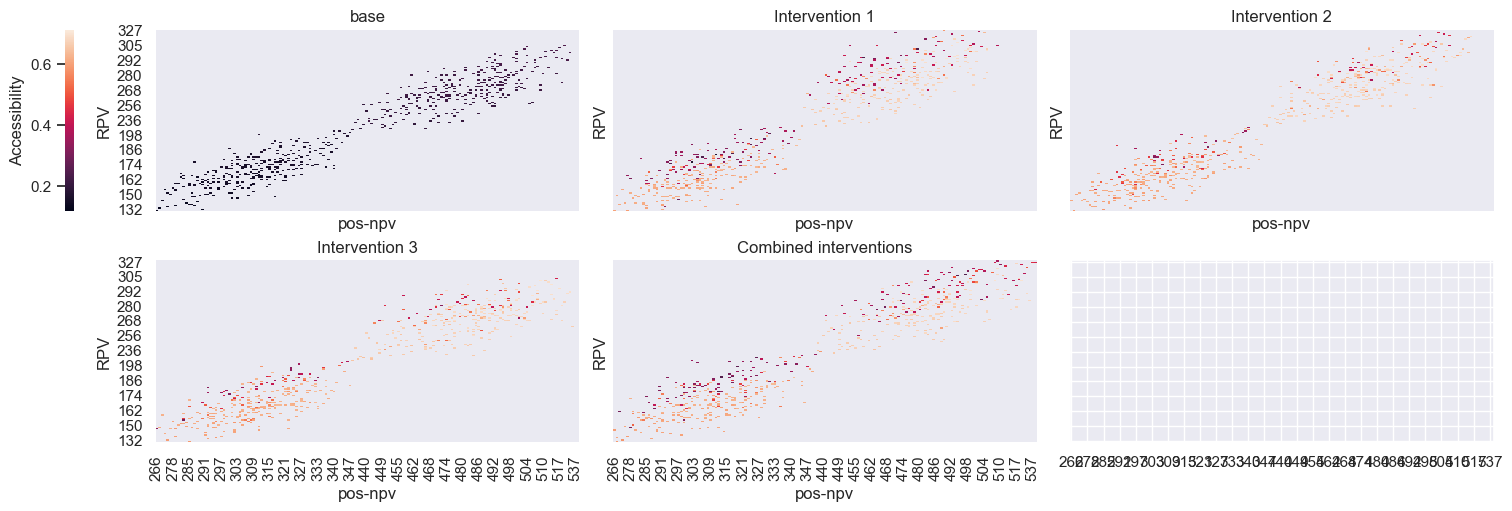

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

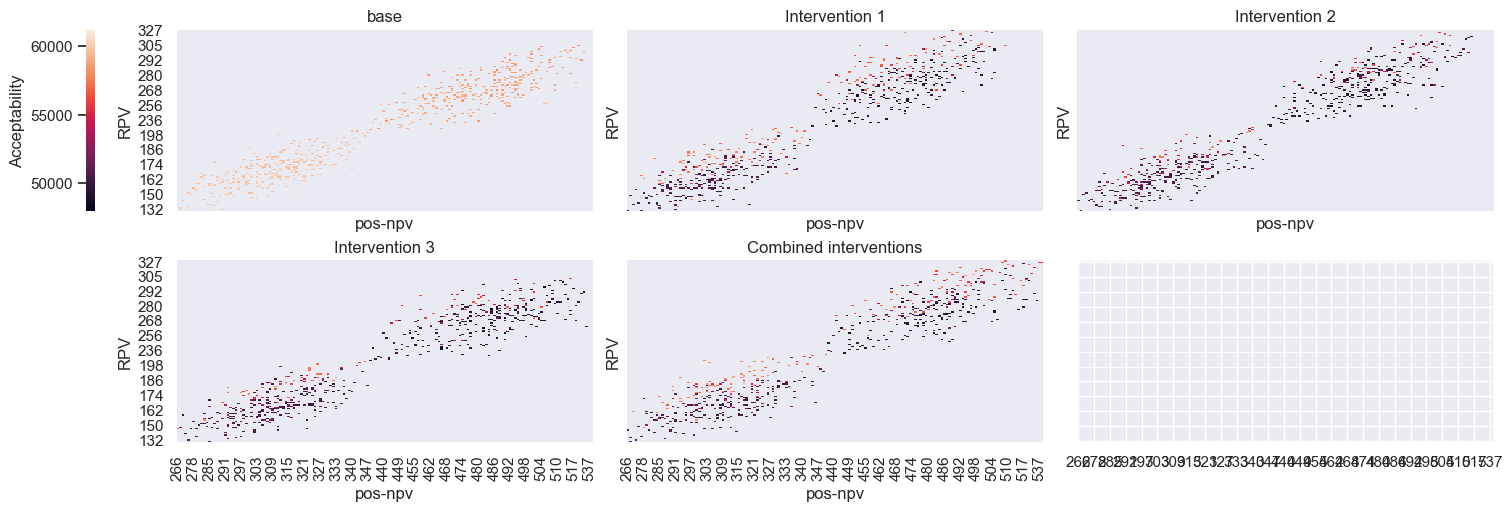

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

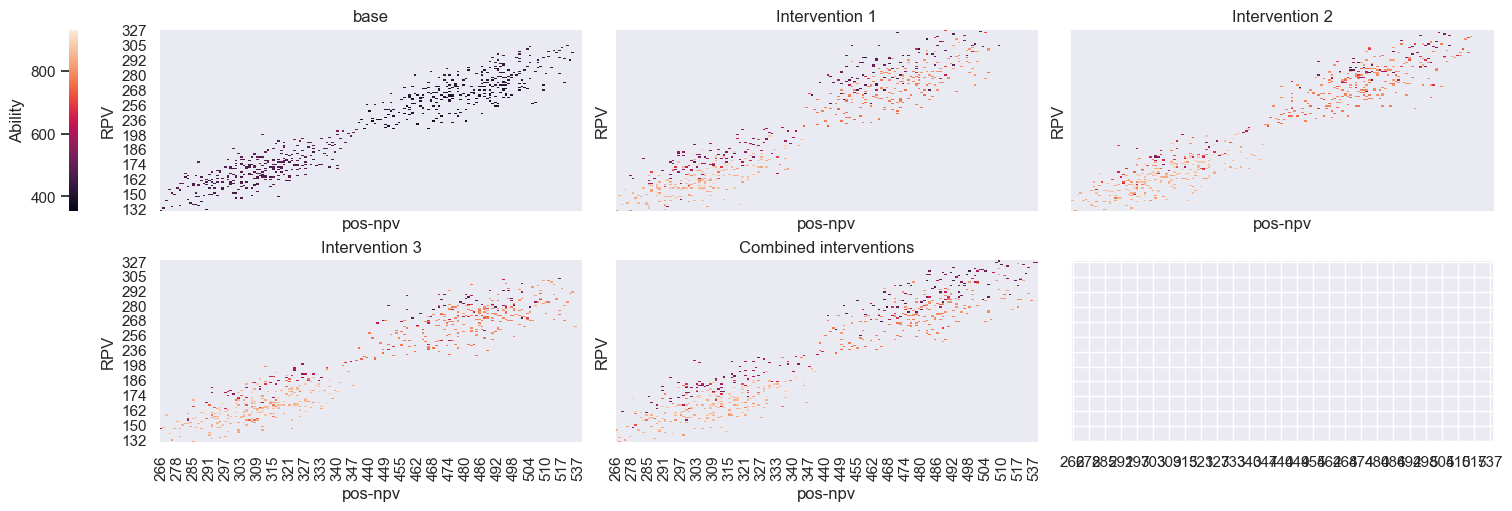

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'base')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 1')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 2')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Intervention 3')

<AxesSubplot:xlabel='pos-npv', ylabel='RPV'>

Text(0.5, 1.0, 'Combined interventions')

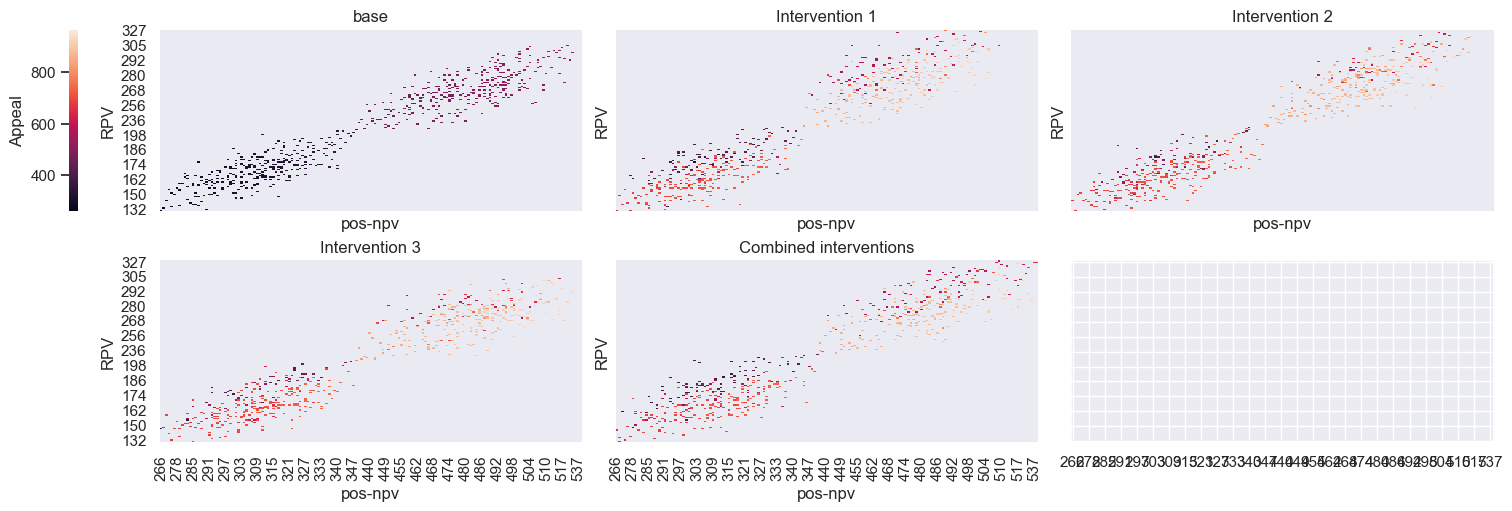

In [143]:
for i in kpi_list:
    data_520_ss11 = pd.DataFrame({'pos-npv' : df_520_ss11['pos-npv'], 'RPV' : df_520_ss11['#-hh-rpv'], 'Z' :  df_520_ss11[i]}) 
    ss11_wide = data_520_ss11.pivot_table(index = 'RPV', columns = 'pos-npv', values = 'Z')

    data_520_ss2 = pd.DataFrame({'pos-npv' : df_520_ss2['pos-npv'], 'RPV' : df_520_ss2['#-hh-rpv'], 'Z' :  df_520_ss2[i]}) 
    ss2_wide = data_520_ss2.pivot_table(index = 'RPV', columns = 'pos-npv', values = 'Z')

    data_520_ss3 = pd.DataFrame({'pos-npv' : df_520_ss3['pos-npv'], 'RPV' : df_520_ss3['#-hh-rpv'], 'Z' :  df_520_ss3[i]}) 
    ss3_wide = data_520_ss3.pivot_table(index = 'RPV', columns = 'pos-npv', values = 'Z')

    data_520_ss4 = pd.DataFrame({'pos-npv' : df_520_ss4['pos-npv'], 'RPV' : df_520_ss4['#-hh-rpv'], 'Z' :  df_520_ss4[i]}) 
    ss4_wide = data_520_ss4.pivot_table(index = 'RPV', columns = 'pos-npv', values = 'Z')

    data_520_ss5 = pd.DataFrame({'pos-npv' : df_520_ss5['pos-npv'], 'RPV' : df_520_ss5['#-hh-rpv'], 'Z' :  df_520_ss5[i]}) 
    ss5_wide = data_520_ss5.pivot_table(index = 'RPV', columns = 'pos-npv', values = 'Z')

    
    fig, axes =  plt.subplots(2, 3, figsize=(15, 5), sharey=True, sharex = True, layout= 'constrained')
    sns.heatmap(ss11_wide, ax = axes[0,0], vmin = min(df_520[i]), vmax = max(df_520[i]), 
                cbar_kws ={'label': f'{i}', 'location': 'left'})
    axes[0,0].set_title('base')
    sns.heatmap(ss2_wide, ax = axes[0,1], vmin = min(df_520[i]), vmax = max(df_520[i]), cbar=False)
    axes[0,1].set_title('Intervention 1')
    sns.heatmap(ss3_wide, ax = axes[0,2], vmin = min(df_520[i]), vmax = max(df_520[i]), cbar=False)
    axes[0,2].set_title('Intervention 2')
    sns.heatmap(ss4_wide, ax = axes[1,0], vmin = min(df_520[i]), vmax = max(df_520[i]), cbar=False)
    axes[1,0].set_title('Intervention 3')
    sns.heatmap(ss5_wide, ax = axes[1,1], vmin = min(df_520[i]), vmax = max(df_520[i]), cbar =False)
    axes[1,1].set_title('Combined interventions')

    axes[0,0].invert_yaxis()
    axes[0,1].invert_yaxis()
    axes[0,2].invert_yaxis()
    axes[1,0].invert_yaxis()
    axes[1,1].invert_yaxis()
    plt.show()

In [144]:
df_520_ss11

index  [run number] region  #-developers  #-households  \
1800   939690          1801  ConEd             0          2000   
1801   939782          1802  ConEd             0          2000   
1802   940121          1803  ConEd             0          2000   
1803   940796          1804  ConEd             0          2000   
1804   942463          1805  ConEd             0          2000   
...       ...           ...    ...           ...           ...   
2395  1249523          2396  ConEd             0          2000   
2396  1249897          2397  ConEd             0          2000   
2397  1250182          2398  ConEd             0          2000   
2398  1250208          2399  ConEd             0          2000   
2399  1250399          2400  ConEd             0          2000   

      MW-block-init-kW-res  MW-block-init-kW-com  e-price-effect  csp-true  \
1800                   150                   120            True     False   
1801                   150                   120            True     False   
1802                   150                   120            True     False   
1803                   150                   120            True     False   
1804                   150                   120            True     False   
...                    ...                   ...             ...       ...   
2395                   150                   120           False     False   
2396                   150                   120           False     False   
2397                   150                   120           False     False   
2398                   150                   120           False     False   
2399                   150                   120           False     False   

      VDER-effect  strategy-intv1  tick  total-elec-bill  total-proj-cost  \
1800          0.6            0.33   520     89997.446879     10405.120966   
1801          0.6            0.33   520     89480.706628     13706.218316   
1802          0.6            0.33   520     88654.752829         0.000000   
1803          0.6            0.33   520     89466.450674         0.000000   
1804          0.6            0.33   520     89240.250634         0.000000   
...           ...             ...   ...              ...              ...   
2395          0.9            1.00   520     94636.343407         0.000000   
2396          0.9            1.00   520     92022.045858      3273.120519   
2397          0.9            1.00   520     93664.144891      1619.156858   
2398          0.9            1.00   520     93573.875865      6003.657833   
2399          0.9            1.00   520     93240.413045         0.000000   

        elect-usage       prod-hh  csp-prod  emissions-hh  #-hh-rpv  #-hh-csp  \
1800  425039.431809  23265.115385       0.0  1.179978e+08       298         0   
1801  423578.901841  24111.461538       0.0  1.176303e+08       313         0   
1802  422505.877327  27214.730769       0.0  1.175194e+08       328         0   
1803  424399.220729  25333.961538       0.0  1.179460e+08       312         0   
1804  424781.168352  26838.576923       0.0  1.181261e+08       306         0   
...             ...           ...       ...           ...       ...       ...   
2395  437078.445155  14594.769231       0.0  1.209576e+08       184         0   
2396  429074.973955  18412.730769       0.0  1.189278e+08       222         0   
2397  432663.042440  14519.538462       0.0  1.197386e+08       191         0   
2398  433821.094176  16118.192308       0.0  1.201274e+08       203         0   
2399  432106.728568  15854.884615       0.0  1.196401e+08       182         0   

      able-to-cs  pos-npv  pos-savings   avg-age  avg-income  avg-education  \
1800           0      485          395  0.037771    0.015791       0.040260   
1801           0      507          416 -0.012612    0.020903       0.022455   
1802           0      510          446  0.007579   -0.003593       0.030456   
1803           0      501          419  0.014470    0.010279    

intv1effect on output kpiX